## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

Site #        S_m2    WGS84 N   WGS 84 E Origin Dominant_specias  \
0      1  500.343869  51.435741  30.107979      n            Birch   
1      2   99.932806  51.434093  30.108523      a             Pine   
2      3   99.932806  51.434163  30.109196      a             Pine   
3      4  500.343869  51.434217  30.110484      a             Pine   
4      5  249.965218  51.434056  30.111980      a             Pine   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ln_Sr_wood  ...  idm_g_Q25  \
0            920       6.824          10300       9.240  ...   0.042167   
1           3600       8.189          15100       9.622  ...   0.040919   
2           4360       8.380          14600       9.589  ...   0.042397   
3           3420       8.137          12700       9.449  ...   0.043719   
4           2200       7.696          12100       9.401  ...   0.040659   

   idm_g_Q50  idm_g_Q75  idm_b_MIN idm_b_MAX  idm_b_MEAN  idm_b_STD  \
0   0.050549   0.062270   0.017730  0.408966    0.059749   0.030217   
1   0.048889   0.060698   0.020078  0.258602    0.057223   0.025515   
2   0.050463   0.060603   0.020761  0.156265    0.056571   0.016629   
3   0.052974   0.066027   0.017239  0.327465    0.060880   0.023964   
4   0.049303   0.061803   0.014276  0.274420    0.057902   0.024283   

   idm_b_Q25  idm_b_Q50  idm_b_Q75  
0   0.043539   0.052312   0.064544  
1   0.043035   0.050941   0.062608  
2   0.045142   0.053495   0.064635  
3   0.046111   0.055601   0.069182  
4   0.043045   0.051566   0.065078  

[5 rows x 164 columns]

# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN'])
            
# Show the first five columns
select.head()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  ln_Tag_Sr  \
0       6.824       9.240           1912            784     -0.731      2.576   
1       8.189       9.622           2005            818      0.585      2.915   
2       8.380       9.589           2001            818      0.779      2.882   
3       8.137       9.449           2040            833      0.517      2.724   
4       7.696       9.401           1758            717      0.224      2.826   

   AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  corr_r_Q25  \
0       2.33    0.445070     13  35.145074   360.273487    0.488754   
1       2.47   12.465903     24  36.135511   323.958625    0.501683   
2       2.44   13.028298     18  35.938764   299.438354    0.540056   
3       2.55    2.128231     15  35.908361   319.773395    0.480991   
4       2.14   12.171553      8  38.062522   353.104284    0.505257   

   corr_r_MIN  
0    0.072792  
1    0.098347  
2    0.187811  
3    0.020686  
4    0.106549

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m   ln_Tag_Cs  \
count   103.00000  103.000000     103.000000     103.000000  103.000000   
mean      7.04933    8.656485    3014.359223    1136.436893   -0.252563   
std       1.64946    1.472424    4988.505540    2019.773384    1.104610   
min       3.52600    6.075000     423.000000      98.000000   -3.033000   
25%       6.31900    7.664000     635.500000     199.500000   -0.727500   
50%       6.95700    8.472000    1145.000000     362.000000   -0.025000   
75%       7.91350    9.421000    2423.500000     966.000000    0.516500   
max      11.36700   13.864000   25173.000000   10477.000000    1.652000   

        ln_Tag_Sr   AEDR_mean  mf_chm_MIN       r_MIN       b_STD  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     2.464709    3.570291    3.368496   11.378641   35.164575   
std      0.904675    6.089170    4.845054    9.139568    5.338700   
min      0.391000    0.480000   -0.018586    2.000000   20.570709   
25%      1.803000    0.710000    0.482279    5.000000   31.746440   
50%      2.603000    1.290000    0.642883    8.000000   36.135511   
75%      3.159000    2.960000    3.921804   15.000000   39.139044   
max      4.659000   36.590000   17.862923   56.000000   45.825416   

       contr_r_STD  corr_r_Q25  corr_r_MIN  
count   103.000000  103.000000  103.000000  
mean    327.115078    0.393571    0.073579  
std     167.617957    0.151801    0.056017  
min       0.091058    0.033797   -0.062450  
25%     283.887328    0.407228    0.027204  
50%     353.034542    0.449670    0.063714  
75%     448.017711    0.476635    0.110983  
max     652.546648    0.555648    0.241284

# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_Cs_wood"
indep_variables = ['contr_r_STD', 'corr_r_Q25', 'AEDR_mean']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  \
0         6.824       9.240           1912            784     -0.731   
1         8.189       9.622           2005            818      0.585   
2         8.380       9.589           2001            818      0.779   
3         8.137       9.449           2040            833      0.517   
4         7.696       9.401           1758            717      0.224   
..          ...         ...            ...            ...        ...   
98        8.071       8.434           2548           1012      0.228   
99        7.993      10.042           2267            908      0.266   
100       8.343      10.488           2441            975      0.543   
101       3.638       6.399            632            269     -2.811   
102       4.787       6.877            676            292     -1.728   

     ln_Tag_Sr  AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  \
0        2.576       2.33    0.445070     13  35.145074   360.2

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

contr_r_STD  corr_r_Q25  AEDR_mean
0   360.273487    0.488754       2.33
1   323.958625    0.501683       2.47
2   299.438354    0.540056       2.44
3   319.773395    0.480991       2.55
4   353.104284    0.505257       2.14

In [11]:
# Columns in "y" data collections
y.head()

ln_Cs_wood
0       6.824
1       8.189
2       8.380
3       8.137
4       7.696

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.2695461185752447, 0.6235901941445616, 0.5264226015768465]
    Mean: 0.473
    Std: 0.149

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.16937229 0.91191117 1.16845602]
    Mean: 1.083
    Std: 0.121

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9138592914581299, 0.7785130062664256, 0.8290936979406021]
    Mean: 0.840
    Std: 0.056

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.9212602280924751                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.2075762813132193                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.047829301314752076                # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 125           # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.5305811756183811                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.9212602280924751
Gamma: 0.2075762813132193
Learning_rate: 0.047829301314752076
Max_depth: 2
N_estimators: 125
Subsample: 0.5305811756183811


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:6.39110	validation_1-rmse:6.72688
[1]	validation_0-rmse:6.10892	validation_1-rmse:6.43475
[2]	validation_0-rmse:5.83195	validation_1-rmse:6.15437
[3]	validation_0-rmse:5.57187	validation_1-rmse:5.88357
[4]	validation_0-rmse:5.33724	validation_1-rmse:5.64581
[5]	validation_0-rmse:5.10020	validation_1-rmse:5.39951
[6]	validation_0-rmse:4.87856	validation_1-rmse:5.17123
[7]	validation_0-rmse:4.68105	validation_1-rmse:4.96326


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:4.47868	validation_1-rmse:4.75303
[9]	validation_0-rmse:4.28712	validation_1-rmse:4.55661
[10]	validation_0-rmse:4.10061	validation_1-rmse:4.36389
[11]	validation_0-rmse:3.93452	validation_1-rmse:4.18348
[12]	validation_0-rmse:3.77898	validation_1-rmse:4.02449
[13]	validation_0-rmse:3.62101	validation_1-rmse:3.86206
[14]	validation_0-rmse:3.47455	validation_1-rmse:3.71034
[15]	validation_0-rmse:3.34287	validation_1-rmse:3.57600
[16]	validation_0-rmse:3.20421	validation_1-rmse:3.42395
[17]	validation_0-rmse:3.07658	validation_1-rmse:3.28511
[18]	validation_0-rmse:2.95946	validation_1-rmse:3.16101
[19]	validation_0-rmse:2.84135	validation_1-rmse:3.03910
[20]	validation_0-rmse:2.72447	validation_1-rmse:2.91804
[21]	validation_0-rmse:2.60502	validation_1-rmse:2.79611
[22]	validation_0-rmse:2.50992	validation_1-rmse:2.69871
[23]	validation_0-rmse:2.42414	validation_1-rmse:2.60737
[24]	validation_0-rmse:2.33254	validation_1-rmse:2.50757
[25]	validation_0-rmse:2.23845	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44899	validation_1-rmse:6.46480
[1]	validation_0-rmse:6.16374	validation_1-rmse:6.18575
[2]	validation_0-rmse:5.89175	validation_1-rmse:5.90434
[3]	validation_0-rmse:5.62807	validation_1-rmse:5.64515
[4]	validation_0-rmse:5.38432	validation_1-rmse:5.40199


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.15144	validation_1-rmse:5.15531
[6]	validation_0-rmse:4.93039	validation_1-rmse:4.93789
[7]	validation_0-rmse:4.71162	validation_1-rmse:4.71146
[8]	validation_0-rmse:4.51242	validation_1-rmse:4.51135
[9]	validation_0-rmse:4.32223	validation_1-rmse:4.31684
[10]	validation_0-rmse:4.14072	validation_1-rmse:4.11124
[11]	validation_0-rmse:3.97210	validation_1-rmse:3.94327
[12]	validation_0-rmse:3.80888	validation_1-rmse:3.77774
[13]	validation_0-rmse:3.64818	validation_1-rmse:3.60679
[14]	validation_0-rmse:3.49677	validation_1-rmse:3.45975
[15]	validation_0-rmse:3.34998	validation_1-rmse:3.31396
[16]	validation_0-rmse:3.22009	validation_1-rmse:3.18596
[17]	validation_0-rmse:3.09379	validation_1-rmse:3.04481
[18]	validation_0-rmse:2.98068	validation_1-rmse:2.93174
[19]	validation_0-rmse:2.86517	validation_1-rmse:2.81450
[20]	validation_0-rmse:2.76168	validation_1-rmse:2.70575
[21]	validation_0-rmse:2.65232	validation_1-rmse:2.60301
[22]	validation_0-rmse:2.54695	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.56133	validation_1-rmse:5.97886
[1]	validation_0-rmse:6.27944	validation_1-rmse:5.70802
[2]	validation_0-rmse:5.99785	validation_1-rmse:5.44754
[3]	validation_0-rmse:5.75297	validation_1-rmse:5.19965
[4]	validation_0-rmse:5.50082	validation_1-rmse:4.94448
[5]	validation_0-rmse:5.25866	validation_1-rmse:4.72462
[6]	validation_0-rmse:5.02757	validation_1-rmse:4.51644


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.81069	validation_1-rmse:4.30458
[8]	validation_0-rmse:4.60727	validation_1-rmse:4.11750
[9]	validation_0-rmse:4.40181	validation_1-rmse:3.93102
[10]	validation_0-rmse:4.20853	validation_1-rmse:3.74854
[11]	validation_0-rmse:4.03170	validation_1-rmse:3.58972
[12]	validation_0-rmse:3.86530	validation_1-rmse:3.44574
[13]	validation_0-rmse:3.70497	validation_1-rmse:3.29369
[14]	validation_0-rmse:3.55223	validation_1-rmse:3.15619
[15]	validation_0-rmse:3.40347	validation_1-rmse:3.01693
[16]	validation_0-rmse:3.25790	validation_1-rmse:2.88601
[17]	validation_0-rmse:3.13149	validation_1-rmse:2.77116
[18]	validation_0-rmse:3.00798	validation_1-rmse:2.65541
[19]	validation_0-rmse:2.89360	validation_1-rmse:2.54135
[20]	validation_0-rmse:2.77253	validation_1-rmse:2.43356
[21]	validation_0-rmse:2.65055	validation_1-rmse:2.32791
[22]	validation_0-rmse:2.54697	validation_1-rmse:2.24520
[23]	validation_0-rmse:2.45074	validation_1-rmse:2.16744
[24]	validation_0-rmse:2.35587	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.56661	validation_1-rmse:5.94497
[1]	validation_0-rmse:6.27590	validation_1-rmse:5.65860
[2]	validation_0-rmse:6.00134	validation_1-rmse:5.38742
[3]	validation_0-rmse:5.73805	validation_1-rmse:5.13846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.49036	validation_1-rmse:4.90301
[5]	validation_0-rmse:5.25101	validation_1-rmse:4.70049
[6]	validation_0-rmse:5.02488	validation_1-rmse:4.48047
[7]	validation_0-rmse:4.79994	validation_1-rmse:4.26827
[8]	validation_0-rmse:4.59626	validation_1-rmse:4.06958
[9]	validation_0-rmse:4.39839	validation_1-rmse:3.90286
[10]	validation_0-rmse:4.20603	validation_1-rmse:3.71806
[11]	validation_0-rmse:4.02856	validation_1-rmse:3.55919
[12]	validation_0-rmse:3.85470	validation_1-rmse:3.41059
[13]	validation_0-rmse:3.68704	validation_1-rmse:3.25644
[14]	validation_0-rmse:3.54199	validation_1-rmse:3.13994
[15]	validation_0-rmse:3.39644	validation_1-rmse:3.00724
[16]	validation_0-rmse:3.25340	validation_1-rmse:2.90431
[17]	validation_0-rmse:3.12465	validation_1-rmse:2.80052
[18]	validation_0-rmse:2.99891	validation_1-rmse:2.68308
[19]	validation_0-rmse:2.88463	validation_1-rmse:2.59169
[20]	validation_0-rmse:2.76431	validation_1-rmse:2.50133
[21]	validation_0-rmse:2.65296	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.36864	validation_1-rmse:6.86248
[1]	validation_0-rmse:6.08819	validation_1-rmse:6.58028
[2]	validation_0-rmse:5.82058	validation_1-rmse:6.31214


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.57437	validation_1-rmse:6.07193
[4]	validation_0-rmse:5.32451	validation_1-rmse:5.83085
[5]	validation_0-rmse:5.09214	validation_1-rmse:5.59880
[6]	validation_0-rmse:4.87993	validation_1-rmse:5.38701
[7]	validation_0-rmse:4.67352	validation_1-rmse:5.19076
[8]	validation_0-rmse:4.47179	validation_1-rmse:4.98957
[9]	validation_0-rmse:4.29103	validation_1-rmse:4.80578
[10]	validation_0-rmse:4.10647	validation_1-rmse:4.62881
[11]	validation_0-rmse:3.93433	validation_1-rmse:4.46157
[12]	validation_0-rmse:3.76298	validation_1-rmse:4.30236
[13]	validation_0-rmse:3.60565	validation_1-rmse:4.14573
[14]	validation_0-rmse:3.45278	validation_1-rmse:3.99271
[15]	validation_0-rmse:3.31256	validation_1-rmse:3.86276
[16]	validation_0-rmse:3.18371	validation_1-rmse:3.74306
[17]	validation_0-rmse:3.05101	validation_1-rmse:3.60853
[18]	validation_0-rmse:2.92789	validation_1-rmse:3.48833
[19]	validation_0-rmse:2.81748	validation_1-rmse:3.38506
[20]	validation_0-rmse:2.70214	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.53669	validation_1-rmse:6.14995
[1]	validation_0-rmse:6.26168	validation_1-rmse:5.88938
[2]	validation_0-rmse:5.99236	validation_1-rmse:5.64999
[3]	validation_0-rmse:5.74276	validation_1-rmse:5.41228
[4]	validation_0-rmse:5.49771	validation_1-rmse:5.17165
[5]	validation_0-rmse:5.26963	validation_1-rmse:4.96507
[6]	validation_0-rmse:5.03608	validation_1-rmse:4.73705
[7]	validation_0-rmse:4.82877	validation_1-rmse:4.54258


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:4.61674	validation_1-rmse:4.33665
[9]	validation_0-rmse:4.43372	validation_1-rmse:4.15751
[10]	validation_0-rmse:4.24233	validation_1-rmse:3.98539
[11]	validation_0-rmse:4.05402	validation_1-rmse:3.80398
[12]	validation_0-rmse:3.88668	validation_1-rmse:3.64261
[13]	validation_0-rmse:3.73213	validation_1-rmse:3.48907
[14]	validation_0-rmse:3.57592	validation_1-rmse:3.35741
[15]	validation_0-rmse:3.43382	validation_1-rmse:3.22472
[16]	validation_0-rmse:3.29299	validation_1-rmse:3.09603
[17]	validation_0-rmse:3.15064	validation_1-rmse:2.95892
[18]	validation_0-rmse:3.03050	validation_1-rmse:2.85922
[19]	validation_0-rmse:2.91528	validation_1-rmse:2.75923
[20]	validation_0-rmse:2.79813	validation_1-rmse:2.65547
[21]	validation_0-rmse:2.69627	validation_1-rmse:2.56388
[22]	validation_0-rmse:2.59360	validation_1-rmse:2.47540
[23]	validation_0-rmse:2.49638	validation_1-rmse:2.39279
[24]	validation_0-rmse:2.40858	validation_1-rmse:2.32575
[25]	validation_0-rmse:2.32404	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.41458	validation_1-rmse:6.59709
[1]	validation_0-rmse:6.12292	validation_1-rmse:6.30806
[2]	validation_0-rmse:5.86381	validation_1-rmse:6.04790
[3]	validation_0-rmse:5.60238	validation_1-rmse:5.79817
[4]	validation_0-rmse:5.35524	validation_1-rmse:5.54976
[5]	validation_0-rmse:5.13389	validation_1-rmse:5.32998
[6]	validation_0-rmse:4.92414	validation_1-rmse:5.12640
[7]	validation_0-rmse:4.70735	validation_1-rmse:4.91299
[8]	validation_0-rmse:4.50315	validation_1-rmse:4.72373


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:4.31343	validation_1-rmse:4.53436
[10]	validation_0-rmse:4.13451	validation_1-rmse:4.36520
[11]	validation_0-rmse:3.96020	validation_1-rmse:4.19636
[12]	validation_0-rmse:3.78735	validation_1-rmse:4.02330
[13]	validation_0-rmse:3.61454	validation_1-rmse:3.85284
[14]	validation_0-rmse:3.46574	validation_1-rmse:3.71150
[15]	validation_0-rmse:3.33235	validation_1-rmse:3.58636
[16]	validation_0-rmse:3.19600	validation_1-rmse:3.45008
[17]	validation_0-rmse:3.06517	validation_1-rmse:3.30885
[18]	validation_0-rmse:2.94524	validation_1-rmse:3.18785
[19]	validation_0-rmse:2.83415	validation_1-rmse:3.07701
[20]	validation_0-rmse:2.72347	validation_1-rmse:2.96909
[21]	validation_0-rmse:2.62592	validation_1-rmse:2.87472
[22]	validation_0-rmse:2.53050	validation_1-rmse:2.77684
[23]	validation_0-rmse:2.43564	validation_1-rmse:2.69881
[24]	validation_0-rmse:2.33765	validation_1-rmse:2.60149
[25]	validation_0-rmse:2.25534	validation_1-rmse:2.51435
[26]	validation_0-rmse:2.17469	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.41714	validation_1-rmse:6.53899
[1]	validation_0-rmse:6.12932	validation_1-rmse:6.25055
[2]	validation_0-rmse:5.85688	validation_1-rmse:5.98859


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.59588	validation_1-rmse:5.71673
[4]	validation_0-rmse:5.35342	validation_1-rmse:5.47556
[5]	validation_0-rmse:5.13693	validation_1-rmse:5.25799
[6]	validation_0-rmse:4.91369	validation_1-rmse:5.03643
[7]	validation_0-rmse:4.70215	validation_1-rmse:4.83312
[8]	validation_0-rmse:4.49995	validation_1-rmse:4.63620
[9]	validation_0-rmse:4.30911	validation_1-rmse:4.45830
[10]	validation_0-rmse:4.14113	validation_1-rmse:4.27746
[11]	validation_0-rmse:3.97183	validation_1-rmse:4.09814
[12]	validation_0-rmse:3.81128	validation_1-rmse:3.93743
[13]	validation_0-rmse:3.66046	validation_1-rmse:3.78994
[14]	validation_0-rmse:3.50593	validation_1-rmse:3.63816
[15]	validation_0-rmse:3.36137	validation_1-rmse:3.49729
[16]	validation_0-rmse:3.23190	validation_1-rmse:3.37678
[17]	validation_0-rmse:3.10103	validation_1-rmse:3.24591
[18]	validation_0-rmse:2.97565	validation_1-rmse:3.12307
[19]	validation_0-rmse:2.85089	validation_1-rmse:2.99242
[20]	validation_0-rmse:2.73696	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.51304	validation_1-rmse:6.19630
[1]	validation_0-rmse:6.22957	validation_1-rmse:5.91485


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.95281	validation_1-rmse:5.64628
[3]	validation_0-rmse:5.69453	validation_1-rmse:5.39954
[4]	validation_0-rmse:5.43973	validation_1-rmse:5.14941
[5]	validation_0-rmse:5.20294	validation_1-rmse:4.92031
[6]	validation_0-rmse:4.97484	validation_1-rmse:4.71040
[7]	validation_0-rmse:4.76066	validation_1-rmse:4.49503
[8]	validation_0-rmse:4.55923	validation_1-rmse:4.30906
[9]	validation_0-rmse:4.37281	validation_1-rmse:4.12802
[10]	validation_0-rmse:4.19981	validation_1-rmse:3.95927
[11]	validation_0-rmse:4.02346	validation_1-rmse:3.78903
[12]	validation_0-rmse:3.85616	validation_1-rmse:3.62978
[13]	validation_0-rmse:3.70063	validation_1-rmse:3.47967
[14]	validation_0-rmse:3.55390	validation_1-rmse:3.34911
[15]	validation_0-rmse:3.41139	validation_1-rmse:3.21903
[16]	validation_0-rmse:3.27683	validation_1-rmse:3.09983
[17]	validation_0-rmse:3.13999	validation_1-rmse:2.96815
[18]	validation_0-rmse:3.00844	validation_1-rmse:2.85086
[19]	validation_0-rmse:2.88633	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.38322	validation_1-rmse:6.69499


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.10412	validation_1-rmse:6.40371
[2]	validation_0-rmse:5.83690	validation_1-rmse:6.13925
[3]	validation_0-rmse:5.58903	validation_1-rmse:5.89178
[4]	validation_0-rmse:5.35106	validation_1-rmse:5.64382
[5]	validation_0-rmse:5.12847	validation_1-rmse:5.42390
[6]	validation_0-rmse:4.91257	validation_1-rmse:5.19844
[7]	validation_0-rmse:4.69750	validation_1-rmse:4.97370
[8]	validation_0-rmse:4.49272	validation_1-rmse:4.77570
[9]	validation_0-rmse:4.30312	validation_1-rmse:4.57787
[10]	validation_0-rmse:4.12750	validation_1-rmse:4.38888
[11]	validation_0-rmse:3.96212	validation_1-rmse:4.22470
[12]	validation_0-rmse:3.79368	validation_1-rmse:4.06184
[13]	validation_0-rmse:3.63369	validation_1-rmse:3.89378
[14]	validation_0-rmse:3.49857	validation_1-rmse:3.75287
[15]	validation_0-rmse:3.35826	validation_1-rmse:3.61084
[16]	validation_0-rmse:3.22401	validation_1-rmse:3.48100
[17]	validation_0-rmse:3.10043	validation_1-rmse:3.34675
[18]	validation_0-rmse:2.97553	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52558	validation_1-rmse:6.23068


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.24363	validation_1-rmse:5.95146
[2]	validation_0-rmse:5.96649	validation_1-rmse:5.67460
[3]	validation_0-rmse:5.71674	validation_1-rmse:5.42705
[4]	validation_0-rmse:5.47213	validation_1-rmse:5.18288
[5]	validation_0-rmse:5.24480	validation_1-rmse:4.95634
[6]	validation_0-rmse:5.01017	validation_1-rmse:4.75215
[7]	validation_0-rmse:4.79243	validation_1-rmse:4.55645
[8]	validation_0-rmse:4.58332	validation_1-rmse:4.37279
[9]	validation_0-rmse:4.38650	validation_1-rmse:4.17888
[10]	validation_0-rmse:4.19808	validation_1-rmse:3.99921
[11]	validation_0-rmse:4.02567	validation_1-rmse:3.83335
[12]	validation_0-rmse:3.86235	validation_1-rmse:3.67874
[13]	validation_0-rmse:3.70691	validation_1-rmse:3.54382
[14]	validation_0-rmse:3.57015	validation_1-rmse:3.41623
[15]	validation_0-rmse:3.42498	validation_1-rmse:3.30638
[16]	validation_0-rmse:3.27695	validation_1-rmse:3.16453
[17]	validation_0-rmse:3.14264	validation_1-rmse:3.05019
[18]	validation_0-rmse:3.01501	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45196	validation_1-rmse:6.46311


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.16852	validation_1-rmse:6.18390
[2]	validation_0-rmse:5.88937	validation_1-rmse:5.90425
[3]	validation_0-rmse:5.63502	validation_1-rmse:5.65550
[4]	validation_0-rmse:5.39417	validation_1-rmse:5.40950
[5]	validation_0-rmse:5.15921	validation_1-rmse:5.16971
[6]	validation_0-rmse:4.93899	validation_1-rmse:4.95738
[7]	validation_0-rmse:4.72526	validation_1-rmse:4.74178
[8]	validation_0-rmse:4.52500	validation_1-rmse:4.54166
[9]	validation_0-rmse:4.35568	validation_1-rmse:4.36771
[10]	validation_0-rmse:4.18333	validation_1-rmse:4.18770
[11]	validation_0-rmse:4.00747	validation_1-rmse:4.01001
[12]	validation_0-rmse:3.83667	validation_1-rmse:3.84536
[13]	validation_0-rmse:3.68742	validation_1-rmse:3.70082
[14]	validation_0-rmse:3.53666	validation_1-rmse:3.55061
[15]	validation_0-rmse:3.38598	validation_1-rmse:3.39950
[16]	validation_0-rmse:3.25164	validation_1-rmse:3.25961
[17]	validation_0-rmse:3.11820	validation_1-rmse:3.12833
[18]	validation_0-rmse:2.98539	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.56060	validation_1-rmse:6.03083


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.27347	validation_1-rmse:5.74909
[2]	validation_0-rmse:5.99476	validation_1-rmse:5.46563
[3]	validation_0-rmse:5.73924	validation_1-rmse:5.21348
[4]	validation_0-rmse:5.48582	validation_1-rmse:4.95601
[5]	validation_0-rmse:5.25636	validation_1-rmse:4.73381
[6]	validation_0-rmse:5.02425	validation_1-rmse:4.50635
[7]	validation_0-rmse:4.81831	validation_1-rmse:4.32468
[8]	validation_0-rmse:4.61032	validation_1-rmse:4.11971
[9]	validation_0-rmse:4.41180	validation_1-rmse:3.94172
[10]	validation_0-rmse:4.21804	validation_1-rmse:3.74639
[11]	validation_0-rmse:4.04578	validation_1-rmse:3.60047
[12]	validation_0-rmse:3.88201	validation_1-rmse:3.42649
[13]	validation_0-rmse:3.71435	validation_1-rmse:3.25803
[14]	validation_0-rmse:3.55737	validation_1-rmse:3.10538
[15]	validation_0-rmse:3.41831	validation_1-rmse:2.95991
[16]	validation_0-rmse:3.27336	validation_1-rmse:2.83240
[17]	validation_0-rmse:3.13989	validation_1-rmse:2.72526
[18]	validation_0-rmse:3.01574	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50523	validation_1-rmse:6.23042


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.21204	validation_1-rmse:5.95292
[2]	validation_0-rmse:5.93688	validation_1-rmse:5.67875
[3]	validation_0-rmse:5.69041	validation_1-rmse:5.44175
[4]	validation_0-rmse:5.43695	validation_1-rmse:5.18629
[5]	validation_0-rmse:5.19766	validation_1-rmse:4.94808
[6]	validation_0-rmse:4.97453	validation_1-rmse:4.73184
[7]	validation_0-rmse:4.75261	validation_1-rmse:4.51648
[8]	validation_0-rmse:4.55151	validation_1-rmse:4.32348
[9]	validation_0-rmse:4.35253	validation_1-rmse:4.12154
[10]	validation_0-rmse:4.16938	validation_1-rmse:3.94477
[11]	validation_0-rmse:3.97950	validation_1-rmse:3.76415
[12]	validation_0-rmse:3.82097	validation_1-rmse:3.61050
[13]	validation_0-rmse:3.66364	validation_1-rmse:3.46669
[14]	validation_0-rmse:3.51363	validation_1-rmse:3.32959
[15]	validation_0-rmse:3.36240	validation_1-rmse:3.18888
[16]	validation_0-rmse:3.22957	validation_1-rmse:3.06387
[17]	validation_0-rmse:3.09506	validation_1-rmse:2.93102
[18]	validation_0-rmse:2.96534	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.40913	validation_1-rmse:6.67983
[1]	validation_0-rmse:6.12180	validation_1-rmse:6.40643
[2]	validation_0-rmse:5.86411	validation_1-rmse:6.15073
[3]	validation_0-rmse:5.61422	validation_1-rmse:5.90291
[4]	validation_0-rmse:5.36904	validation_1-rmse:5.65887
[5]	validation_0-rmse:5.13941	validation_1-rmse:5.43146
[6]	validation_0-rmse:4.91410	validation_1-rmse:5.19657
[7]	validation_0-rmse:4.70886	validation_1-rmse:4.97671
[8]	validation_0-rmse:4.50541	validation_1-rmse:4.76911
[9]	validation_0-rmse:4.31568	validation_1-rmse:4.59556
[10]	validation_0-rmse:4.12126	validation_1-rmse:4.39422
[11]	validation_0-rmse:3.95049	validation_1-rmse:4.22617
[12]	validation_0-rmse:3.78715	validation_1-rmse:4.06021
[13]	validation_0-rmse:3.62986	validation_1-rmse:3.90985
[14]	validation_0-rmse:3.48331	validation_1-rmse:3.75692
[15]	validation_0-rmse:3.34385	validation_1-rmse:3.61446
[16]	validation_0-rmse:3.20549	validation_1-rmse:3.47013
[17]	validation_0-rmse:3.07704	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.44349	validation_1-rmse:6.47940
[1]	validation_0-rmse:6.15111	validation_1-rmse:6.19167
[2]	validation_0-rmse:5.89083	validation_1-rmse:5.93599
[3]	validation_0-rmse:5.62322	validation_1-rmse:5.66520
[4]	validation_0-rmse:5.37345	validation_1-rmse:5.43001
[5]	validation_0-rmse:5.14021	validation_1-rmse:5.22155
[6]	validation_0-rmse:4.91762	validation_1-rmse:5.00176
[7]	validation_0-rmse:4.70617	validation_1-rmse:4.79899
[8]	validation_0-rmse:4.51233	validation_1-rmse:4.61384
[9]	validation_0-rmse:4.32070	validation_1-rmse:4.43596
[10]	validation_0-rmse:4.14104	validation_1-rmse:4.27039
[11]	validation_0-rmse:3.98437	validation_1-rmse:4.12352
[12]	validation_0-rmse:3.81715	validation_1-rmse:3.96268
[13]	validation_0-rmse:3.64479	validation_1-rmse:3.79992
[14]	validation_0-rmse:3.48419	validation_1-rmse:3.65608
[15]	validation_0-rmse:3.34821	validation_1-rmse:3.52787
[16]	validation_0-rmse:3.20436	validation_1-rmse:3.39123
[17]	validation_0-rmse:3.07185	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.52799	validation_1-rmse:6.16411
[1]	validation_0-rmse:6.26024	validation_1-rmse:5.89903
[2]	validation_0-rmse:5.97693	validation_1-rmse:5.62913
[3]	validation_0-rmse:5.72957	validation_1-rmse:5.38450
[4]	validation_0-rmse:5.47124	validation_1-rmse:5.13982
[5]	validation_0-rmse:5.24325	validation_1-rmse:4.91491
[6]	validation_0-rmse:5.01713	validation_1-rmse:4.70083
[7]	validation_0-rmse:4.81398	validation_1-rmse:4.51169
[8]	validation_0-rmse:4.60869	validation_1-rmse:4.31526
[9]	validation_0-rmse:4.40807	validation_1-rmse:4.12648
[10]	validation_0-rmse:4.21448	validation_1-rmse:3.94710
[11]	validation_0-rmse:4.03069	validation_1-rmse:3.77274
[12]	validation_0-rmse:3.85621	validation_1-rmse:3.61319
[13]	validation_0-rmse:3.69848	validation_1-rmse:3.47243
[14]	validation_0-rmse:3.54830	validation_1-rmse:3.32652
[15]	validation_0-rmse:3.40192	validation_1-rmse:3.19973
[16]	validation_0-rmse:3.26112	validation_1-rmse:3.07214
[17]	validation_0-rmse:3.12956	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.46186	validation_1-rmse:6.45686
[1]	validation_0-rmse:6.17607	validation_1-rmse:6.16387


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91391	validation_1-rmse:5.90221
[3]	validation_0-rmse:5.65875	validation_1-rmse:5.64132
[4]	validation_0-rmse:5.41785	validation_1-rmse:5.39252
[5]	validation_0-rmse:5.18352	validation_1-rmse:5.15647
[6]	validation_0-rmse:4.95732	validation_1-rmse:4.93032
[7]	validation_0-rmse:4.74786	validation_1-rmse:4.71687
[8]	validation_0-rmse:4.53764	validation_1-rmse:4.51446
[9]	validation_0-rmse:4.35883	validation_1-rmse:4.34219
[10]	validation_0-rmse:4.17717	validation_1-rmse:4.17262
[11]	validation_0-rmse:4.00034	validation_1-rmse:4.00060
[12]	validation_0-rmse:3.82552	validation_1-rmse:3.83128
[13]	validation_0-rmse:3.66384	validation_1-rmse:3.67960
[14]	validation_0-rmse:3.50994	validation_1-rmse:3.53622
[15]	validation_0-rmse:3.35876	validation_1-rmse:3.39388
[16]	validation_0-rmse:3.22026	validation_1-rmse:3.26206
[17]	validation_0-rmse:3.09593	validation_1-rmse:3.13449
[18]	validation_0-rmse:2.97046	validation_1-rmse:3.01832
[19]	validation_0-rmse:2.85113	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.44702	validation_1-rmse:6.47132
[1]	validation_0-rmse:6.16841	validation_1-rmse:6.19119
[2]	validation_0-rmse:5.89707	validation_1-rmse:5.92083
[3]	validation_0-rmse:5.63443	validation_1-rmse:5.64028


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.39656	validation_1-rmse:5.40140
[5]	validation_0-rmse:5.15898	validation_1-rmse:5.16668
[6]	validation_0-rmse:4.93288	validation_1-rmse:4.94276
[7]	validation_0-rmse:4.72666	validation_1-rmse:4.73590
[8]	validation_0-rmse:4.51850	validation_1-rmse:4.52920
[9]	validation_0-rmse:4.32787	validation_1-rmse:4.32808
[10]	validation_0-rmse:4.14443	validation_1-rmse:4.14294
[11]	validation_0-rmse:3.95827	validation_1-rmse:3.96110
[12]	validation_0-rmse:3.78991	validation_1-rmse:3.78327
[13]	validation_0-rmse:3.63669	validation_1-rmse:3.63866
[14]	validation_0-rmse:3.47929	validation_1-rmse:3.47810
[15]	validation_0-rmse:3.33454	validation_1-rmse:3.33276
[16]	validation_0-rmse:3.20022	validation_1-rmse:3.19944
[17]	validation_0-rmse:3.07075	validation_1-rmse:3.07302
[18]	validation_0-rmse:2.95306	validation_1-rmse:2.95764
[19]	validation_0-rmse:2.82645	validation_1-rmse:2.84067
[20]	validation_0-rmse:2.70614	validation_1-rmse:2.71917
[21]	validation_0-rmse:2.59325	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53388	validation_1-rmse:6.10004


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.24344	validation_1-rmse:5.82707
[2]	validation_0-rmse:5.96012	validation_1-rmse:5.55693
[3]	validation_0-rmse:5.70505	validation_1-rmse:5.30897
[4]	validation_0-rmse:5.45905	validation_1-rmse:5.06878
[5]	validation_0-rmse:5.22427	validation_1-rmse:4.84727
[6]	validation_0-rmse:5.00343	validation_1-rmse:4.62970
[7]	validation_0-rmse:4.80537	validation_1-rmse:4.42929
[8]	validation_0-rmse:4.60363	validation_1-rmse:4.23866
[9]	validation_0-rmse:4.41679	validation_1-rmse:4.05719
[10]	validation_0-rmse:4.23939	validation_1-rmse:3.88525
[11]	validation_0-rmse:4.06210	validation_1-rmse:3.71251
[12]	validation_0-rmse:3.89431	validation_1-rmse:3.55416
[13]	validation_0-rmse:3.72274	validation_1-rmse:3.39707
[14]	validation_0-rmse:3.56804	validation_1-rmse:3.25053
[15]	validation_0-rmse:3.41663	validation_1-rmse:3.11677
[16]	validation_0-rmse:3.26623	validation_1-rmse:2.97952
[17]	validation_0-rmse:3.13333	validation_1-rmse:2.86107
[18]	validation_0-rmse:3.00918	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.59224	validation_1-rmse:5.85082


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.29361	validation_1-rmse:5.57445
[2]	validation_0-rmse:6.02164	validation_1-rmse:5.33540
[3]	validation_0-rmse:5.75867	validation_1-rmse:5.10696
[4]	validation_0-rmse:5.50490	validation_1-rmse:4.86159
[5]	validation_0-rmse:5.27094	validation_1-rmse:4.65565
[6]	validation_0-rmse:5.04177	validation_1-rmse:4.44411
[7]	validation_0-rmse:4.82984	validation_1-rmse:4.26052
[8]	validation_0-rmse:4.62205	validation_1-rmse:4.08348
[9]	validation_0-rmse:4.42314	validation_1-rmse:3.90832
[10]	validation_0-rmse:4.22469	validation_1-rmse:3.72665
[11]	validation_0-rmse:4.04939	validation_1-rmse:3.57340
[12]	validation_0-rmse:3.87120	validation_1-rmse:3.41298
[13]	validation_0-rmse:3.70287	validation_1-rmse:3.26351
[14]	validation_0-rmse:3.54383	validation_1-rmse:3.11707
[15]	validation_0-rmse:3.39321	validation_1-rmse:2.98841
[16]	validation_0-rmse:3.26348	validation_1-rmse:2.87879
[17]	validation_0-rmse:3.12390	validation_1-rmse:2.75753
[18]	validation_0-rmse:3.00761	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.32334	validation_1-rmse:6.94175


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.04538	validation_1-rmse:6.65062
[2]	validation_0-rmse:5.77409	validation_1-rmse:6.36537
[3]	validation_0-rmse:5.51742	validation_1-rmse:6.11142
[4]	validation_0-rmse:5.27400	validation_1-rmse:5.85731
[5]	validation_0-rmse:5.03870	validation_1-rmse:5.61844
[6]	validation_0-rmse:4.81222	validation_1-rmse:5.37744
[7]	validation_0-rmse:4.59945	validation_1-rmse:5.15169
[8]	validation_0-rmse:4.40011	validation_1-rmse:4.94492
[9]	validation_0-rmse:4.21380	validation_1-rmse:4.74702
[10]	validation_0-rmse:4.03868	validation_1-rmse:4.56267
[11]	validation_0-rmse:3.86769	validation_1-rmse:4.39790
[12]	validation_0-rmse:3.71021	validation_1-rmse:4.22643
[13]	validation_0-rmse:3.55760	validation_1-rmse:4.06644
[14]	validation_0-rmse:3.40567	validation_1-rmse:3.90269
[15]	validation_0-rmse:3.26771	validation_1-rmse:3.75661
[16]	validation_0-rmse:3.13102	validation_1-rmse:3.62272
[17]	validation_0-rmse:3.00049	validation_1-rmse:3.48464
[18]	validation_0-rmse:2.87791	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44451	validation_1-rmse:6.49302


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.15029	validation_1-rmse:6.19889
[2]	validation_0-rmse:5.89072	validation_1-rmse:5.95500
[3]	validation_0-rmse:5.63877	validation_1-rmse:5.70905
[4]	validation_0-rmse:5.38721	validation_1-rmse:5.45342
[5]	validation_0-rmse:5.14457	validation_1-rmse:5.20642
[6]	validation_0-rmse:4.92803	validation_1-rmse:4.99768
[7]	validation_0-rmse:4.72281	validation_1-rmse:4.79973
[8]	validation_0-rmse:4.52119	validation_1-rmse:4.61554
[9]	validation_0-rmse:4.33868	validation_1-rmse:4.43839
[10]	validation_0-rmse:4.16418	validation_1-rmse:4.28057
[11]	validation_0-rmse:3.98727	validation_1-rmse:4.10995
[12]	validation_0-rmse:3.82717	validation_1-rmse:3.96007
[13]	validation_0-rmse:3.66548	validation_1-rmse:3.80837
[14]	validation_0-rmse:3.51810	validation_1-rmse:3.66791
[15]	validation_0-rmse:3.37389	validation_1-rmse:3.53084
[16]	validation_0-rmse:3.23022	validation_1-rmse:3.40609
[17]	validation_0-rmse:3.09806	validation_1-rmse:3.28154
[18]	validation_0-rmse:2.98161	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48439	validation_1-rmse:6.37262


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.20728	validation_1-rmse:6.06791
[2]	validation_0-rmse:5.93058	validation_1-rmse:5.77246
[3]	validation_0-rmse:5.67975	validation_1-rmse:5.52133
[4]	validation_0-rmse:5.44027	validation_1-rmse:5.27327
[5]	validation_0-rmse:5.20312	validation_1-rmse:5.03560
[6]	validation_0-rmse:4.97802	validation_1-rmse:4.81750
[7]	validation_0-rmse:4.76769	validation_1-rmse:4.60818
[8]	validation_0-rmse:4.55896	validation_1-rmse:4.40301
[9]	validation_0-rmse:4.36627	validation_1-rmse:4.21018
[10]	validation_0-rmse:4.18944	validation_1-rmse:4.03130
[11]	validation_0-rmse:4.02305	validation_1-rmse:3.86876
[12]	validation_0-rmse:3.85705	validation_1-rmse:3.69660
[13]	validation_0-rmse:3.69738	validation_1-rmse:3.53940
[14]	validation_0-rmse:3.54757	validation_1-rmse:3.37620
[15]	validation_0-rmse:3.40742	validation_1-rmse:3.21833
[16]	validation_0-rmse:3.26238	validation_1-rmse:3.07105
[17]	validation_0-rmse:3.13096	validation_1-rmse:2.94108
[18]	validation_0-rmse:3.00093	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.41181	validation_1-rmse:6.70441
[1]	validation_0-rmse:6.13135	validation_1-rmse:6.39783


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.86645	validation_1-rmse:6.12691
[3]	validation_0-rmse:5.61602	validation_1-rmse:5.86613
[4]	validation_0-rmse:5.36757	validation_1-rmse:5.60003
[5]	validation_0-rmse:5.13971	validation_1-rmse:5.36325
[6]	validation_0-rmse:4.93431	validation_1-rmse:5.15156
[7]	validation_0-rmse:4.72591	validation_1-rmse:4.91493
[8]	validation_0-rmse:4.51943	validation_1-rmse:4.71128
[9]	validation_0-rmse:4.33168	validation_1-rmse:4.50519
[10]	validation_0-rmse:4.14355	validation_1-rmse:4.31041
[11]	validation_0-rmse:3.98136	validation_1-rmse:4.14380
[12]	validation_0-rmse:3.81989	validation_1-rmse:3.97208
[13]	validation_0-rmse:3.66966	validation_1-rmse:3.82613
[14]	validation_0-rmse:3.52198	validation_1-rmse:3.66786
[15]	validation_0-rmse:3.37146	validation_1-rmse:3.50928
[16]	validation_0-rmse:3.24150	validation_1-rmse:3.37455
[17]	validation_0-rmse:3.10562	validation_1-rmse:3.21933
[18]	validation_0-rmse:2.98547	validation_1-rmse:3.08441
[19]	validation_0-rmse:2.87558	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47916	validation_1-rmse:6.31801


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.19308	validation_1-rmse:6.04891
[2]	validation_0-rmse:5.91838	validation_1-rmse:5.78045
[3]	validation_0-rmse:5.66560	validation_1-rmse:5.53473
[4]	validation_0-rmse:5.40936	validation_1-rmse:5.28687
[5]	validation_0-rmse:5.17930	validation_1-rmse:5.06510
[6]	validation_0-rmse:4.95345	validation_1-rmse:4.84828
[7]	validation_0-rmse:4.73650	validation_1-rmse:4.64074
[8]	validation_0-rmse:4.52790	validation_1-rmse:4.44142
[9]	validation_0-rmse:4.33298	validation_1-rmse:4.25612
[10]	validation_0-rmse:4.14329	validation_1-rmse:4.08211
[11]	validation_0-rmse:3.95502	validation_1-rmse:3.90616
[12]	validation_0-rmse:3.79502	validation_1-rmse:3.75024
[13]	validation_0-rmse:3.63970	validation_1-rmse:3.60452
[14]	validation_0-rmse:3.48219	validation_1-rmse:3.45511
[15]	validation_0-rmse:3.33936	validation_1-rmse:3.31879
[16]	validation_0-rmse:3.21024	validation_1-rmse:3.19756
[17]	validation_0-rmse:3.07298	validation_1-rmse:3.06823
[18]	validation_0-rmse:2.95083	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42372	validation_1-rmse:6.60047


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14599	validation_1-rmse:6.31554
[2]	validation_0-rmse:5.87219	validation_1-rmse:6.04885
[3]	validation_0-rmse:5.61511	validation_1-rmse:5.79041
[4]	validation_0-rmse:5.37264	validation_1-rmse:5.54915
[5]	validation_0-rmse:5.13743	validation_1-rmse:5.32067
[6]	validation_0-rmse:4.90146	validation_1-rmse:5.08743
[7]	validation_0-rmse:4.68826	validation_1-rmse:4.88311
[8]	validation_0-rmse:4.48587	validation_1-rmse:4.68601
[9]	validation_0-rmse:4.30746	validation_1-rmse:4.48902
[10]	validation_0-rmse:4.12251	validation_1-rmse:4.31107
[11]	validation_0-rmse:3.95113	validation_1-rmse:4.14058
[12]	validation_0-rmse:3.78791	validation_1-rmse:3.97459
[13]	validation_0-rmse:3.63224	validation_1-rmse:3.82819
[14]	validation_0-rmse:3.47460	validation_1-rmse:3.67862
[15]	validation_0-rmse:3.33183	validation_1-rmse:3.54051
[16]	validation_0-rmse:3.18952	validation_1-rmse:3.39511
[17]	validation_0-rmse:3.05876	validation_1-rmse:3.26115
[18]	validation_0-rmse:2.93375	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52335	validation_1-rmse:6.15369


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.24138	validation_1-rmse:5.89175
[2]	validation_0-rmse:5.96076	validation_1-rmse:5.61161
[3]	validation_0-rmse:5.69164	validation_1-rmse:5.34159
[4]	validation_0-rmse:5.44279	validation_1-rmse:5.09690
[5]	validation_0-rmse:5.20784	validation_1-rmse:4.85616
[6]	validation_0-rmse:4.98253	validation_1-rmse:4.63043
[7]	validation_0-rmse:4.77415	validation_1-rmse:4.42454
[8]	validation_0-rmse:4.57238	validation_1-rmse:4.22809
[9]	validation_0-rmse:4.37790	validation_1-rmse:4.04000
[10]	validation_0-rmse:4.19267	validation_1-rmse:3.86750
[11]	validation_0-rmse:4.01968	validation_1-rmse:3.69912
[12]	validation_0-rmse:3.84905	validation_1-rmse:3.53516
[13]	validation_0-rmse:3.69072	validation_1-rmse:3.39614
[14]	validation_0-rmse:3.54407	validation_1-rmse:3.26633
[15]	validation_0-rmse:3.40702	validation_1-rmse:3.13467
[16]	validation_0-rmse:3.26980	validation_1-rmse:3.00299
[17]	validation_0-rmse:3.14787	validation_1-rmse:2.88678
[18]	validation_0-rmse:3.01793	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42563	validation_1-rmse:6.59422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14551	validation_1-rmse:6.32369
[2]	validation_0-rmse:5.88036	validation_1-rmse:6.05365
[3]	validation_0-rmse:5.63294	validation_1-rmse:5.80834
[4]	validation_0-rmse:5.38048	validation_1-rmse:5.56787
[5]	validation_0-rmse:5.14804	validation_1-rmse:5.33532
[6]	validation_0-rmse:4.92732	validation_1-rmse:5.12484
[7]	validation_0-rmse:4.70200	validation_1-rmse:4.88960
[8]	validation_0-rmse:4.49620	validation_1-rmse:4.68504
[9]	validation_0-rmse:4.29696	validation_1-rmse:4.49313
[10]	validation_0-rmse:4.11950	validation_1-rmse:4.31817
[11]	validation_0-rmse:3.94617	validation_1-rmse:4.15468
[12]	validation_0-rmse:3.77826	validation_1-rmse:3.99451
[13]	validation_0-rmse:3.61836	validation_1-rmse:3.84003
[14]	validation_0-rmse:3.48122	validation_1-rmse:3.70141
[15]	validation_0-rmse:3.34733	validation_1-rmse:3.57380
[16]	validation_0-rmse:3.20611	validation_1-rmse:3.44655
[17]	validation_0-rmse:3.07733	validation_1-rmse:3.32016
[18]	validation_0-rmse:2.96165	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44216	validation_1-rmse:6.52097
[1]	validation_0-rmse:6.15200	validation_1-rmse:6.22415


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88119	validation_1-rmse:5.96538
[3]	validation_0-rmse:5.62895	validation_1-rmse:5.72136
[4]	validation_0-rmse:5.38073	validation_1-rmse:5.48208
[5]	validation_0-rmse:5.14735	validation_1-rmse:5.24099
[6]	validation_0-rmse:4.91883	validation_1-rmse:5.02063
[7]	validation_0-rmse:4.70877	validation_1-rmse:4.82949
[8]	validation_0-rmse:4.50978	validation_1-rmse:4.63318
[9]	validation_0-rmse:4.32700	validation_1-rmse:4.46519
[10]	validation_0-rmse:4.14522	validation_1-rmse:4.29414
[11]	validation_0-rmse:3.96918	validation_1-rmse:4.13432
[12]	validation_0-rmse:3.79866	validation_1-rmse:3.98273
[13]	validation_0-rmse:3.64402	validation_1-rmse:3.84511
[14]	validation_0-rmse:3.50010	validation_1-rmse:3.69639
[15]	validation_0-rmse:3.35024	validation_1-rmse:3.54557
[16]	validation_0-rmse:3.20368	validation_1-rmse:3.41935
[17]	validation_0-rmse:3.06988	validation_1-rmse:3.28584
[18]	validation_0-rmse:2.94665	validation_1-rmse:3.18030
[19]	validation_0-rmse:2.83337	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50883	validation_1-rmse:6.24781
[1]	validation_0-rmse:6.21959	validation_1-rmse:5.95595


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.94838	validation_1-rmse:5.68591
[3]	validation_0-rmse:5.69073	validation_1-rmse:5.43605
[4]	validation_0-rmse:5.44686	validation_1-rmse:5.19031
[5]	validation_0-rmse:5.21290	validation_1-rmse:4.95699
[6]	validation_0-rmse:4.99330	validation_1-rmse:4.74641
[7]	validation_0-rmse:4.78703	validation_1-rmse:4.54188
[8]	validation_0-rmse:4.57822	validation_1-rmse:4.33741
[9]	validation_0-rmse:4.38963	validation_1-rmse:4.15696
[10]	validation_0-rmse:4.19528	validation_1-rmse:3.97003
[11]	validation_0-rmse:4.00858	validation_1-rmse:3.80028
[12]	validation_0-rmse:3.85077	validation_1-rmse:3.64175
[13]	validation_0-rmse:3.69132	validation_1-rmse:3.48608
[14]	validation_0-rmse:3.53703	validation_1-rmse:3.34375
[15]	validation_0-rmse:3.38704	validation_1-rmse:3.19762
[16]	validation_0-rmse:3.25987	validation_1-rmse:3.07367
[17]	validation_0-rmse:3.12452	validation_1-rmse:2.94133
[18]	validation_0-rmse:3.01381	validation_1-rmse:2.83716
[19]	validation_0-rmse:2.88536	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.49782	validation_1-rmse:6.27980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.21269	validation_1-rmse:5.99798
[2]	validation_0-rmse:5.92704	validation_1-rmse:5.71485
[3]	validation_0-rmse:5.66891	validation_1-rmse:5.45726
[4]	validation_0-rmse:5.43356	validation_1-rmse:5.22794
[5]	validation_0-rmse:5.19606	validation_1-rmse:4.99322
[6]	validation_0-rmse:4.97242	validation_1-rmse:4.77027
[7]	validation_0-rmse:4.76499	validation_1-rmse:4.57102
[8]	validation_0-rmse:4.55460	validation_1-rmse:4.37847
[9]	validation_0-rmse:4.34916	validation_1-rmse:4.17799
[10]	validation_0-rmse:4.15981	validation_1-rmse:3.99304
[11]	validation_0-rmse:3.98833	validation_1-rmse:3.83679
[12]	validation_0-rmse:3.82080	validation_1-rmse:3.67272
[13]	validation_0-rmse:3.66636	validation_1-rmse:3.51905
[14]	validation_0-rmse:3.51633	validation_1-rmse:3.37122
[15]	validation_0-rmse:3.37046	validation_1-rmse:3.22742
[16]	validation_0-rmse:3.23407	validation_1-rmse:3.09588
[17]	validation_0-rmse:3.10386	validation_1-rmse:2.96949
[18]	validation_0-rmse:2.98580	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50748	validation_1-rmse:6.21251


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.21800	validation_1-rmse:5.94814
[2]	validation_0-rmse:5.93806	validation_1-rmse:5.68822
[3]	validation_0-rmse:5.67366	validation_1-rmse:5.44652
[4]	validation_0-rmse:5.42764	validation_1-rmse:5.21791
[5]	validation_0-rmse:5.19093	validation_1-rmse:4.99310
[6]	validation_0-rmse:4.96808	validation_1-rmse:4.78710
[7]	validation_0-rmse:4.75334	validation_1-rmse:4.59213
[8]	validation_0-rmse:4.55089	validation_1-rmse:4.40039
[9]	validation_0-rmse:4.36349	validation_1-rmse:4.22211
[10]	validation_0-rmse:4.17843	validation_1-rmse:4.05359
[11]	validation_0-rmse:3.99866	validation_1-rmse:3.89067
[12]	validation_0-rmse:3.83553	validation_1-rmse:3.74624
[13]	validation_0-rmse:3.67524	validation_1-rmse:3.59658
[14]	validation_0-rmse:3.53681	validation_1-rmse:3.45977
[15]	validation_0-rmse:3.39725	validation_1-rmse:3.33106
[16]	validation_0-rmse:3.24898	validation_1-rmse:3.17504
[17]	validation_0-rmse:3.12251	validation_1-rmse:3.07373
[18]	validation_0-rmse:2.99006	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48078	validation_1-rmse:6.29988


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.20161	validation_1-rmse:6.01769
[2]	validation_0-rmse:5.92277	validation_1-rmse:5.73424
[3]	validation_0-rmse:5.65869	validation_1-rmse:5.47810
[4]	validation_0-rmse:5.42449	validation_1-rmse:5.23949
[5]	validation_0-rmse:5.19851	validation_1-rmse:5.00958
[6]	validation_0-rmse:4.98006	validation_1-rmse:4.78694
[7]	validation_0-rmse:4.77065	validation_1-rmse:4.57807
[8]	validation_0-rmse:4.56564	validation_1-rmse:4.36760
[9]	validation_0-rmse:4.38345	validation_1-rmse:4.18601
[10]	validation_0-rmse:4.18675	validation_1-rmse:3.98645
[11]	validation_0-rmse:4.02281	validation_1-rmse:3.82287
[12]	validation_0-rmse:3.85670	validation_1-rmse:3.66064
[13]	validation_0-rmse:3.69597	validation_1-rmse:3.50493
[14]	validation_0-rmse:3.55584	validation_1-rmse:3.35915
[15]	validation_0-rmse:3.41168	validation_1-rmse:3.21078
[16]	validation_0-rmse:3.27163	validation_1-rmse:3.07079
[17]	validation_0-rmse:3.13987	validation_1-rmse:2.93848
[18]	validation_0-rmse:3.01910	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.49265	validation_1-rmse:6.31633


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.21048	validation_1-rmse:6.03963
[2]	validation_0-rmse:5.93639	validation_1-rmse:5.77794
[3]	validation_0-rmse:5.67547	validation_1-rmse:5.50788
[4]	validation_0-rmse:5.44008	validation_1-rmse:5.26630
[5]	validation_0-rmse:5.20956	validation_1-rmse:5.03840
[6]	validation_0-rmse:4.98525	validation_1-rmse:4.81513
[7]	validation_0-rmse:4.77397	validation_1-rmse:4.60936
[8]	validation_0-rmse:4.55559	validation_1-rmse:4.38694
[9]	validation_0-rmse:4.35884	validation_1-rmse:4.19339
[10]	validation_0-rmse:4.17658	validation_1-rmse:4.01233
[11]	validation_0-rmse:4.00607	validation_1-rmse:3.85300
[12]	validation_0-rmse:3.84330	validation_1-rmse:3.69630
[13]	validation_0-rmse:3.68367	validation_1-rmse:3.53984
[14]	validation_0-rmse:3.53118	validation_1-rmse:3.39129
[15]	validation_0-rmse:3.38723	validation_1-rmse:3.24687
[16]	validation_0-rmse:3.24836	validation_1-rmse:3.11976
[17]	validation_0-rmse:3.11165	validation_1-rmse:2.98590
[18]	validation_0-rmse:3.00060	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.41367	validation_1-rmse:6.60305


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.13039	validation_1-rmse:6.32115
[2]	validation_0-rmse:5.85618	validation_1-rmse:6.03477
[3]	validation_0-rmse:5.60905	validation_1-rmse:5.79056
[4]	validation_0-rmse:5.36612	validation_1-rmse:5.53600
[5]	validation_0-rmse:5.14561	validation_1-rmse:5.31424
[6]	validation_0-rmse:4.91667	validation_1-rmse:5.08902
[7]	validation_0-rmse:4.71113	validation_1-rmse:4.88711
[8]	validation_0-rmse:4.50275	validation_1-rmse:4.67110
[9]	validation_0-rmse:4.31035	validation_1-rmse:4.46926
[10]	validation_0-rmse:4.13328	validation_1-rmse:4.28455
[11]	validation_0-rmse:3.96303	validation_1-rmse:4.11371
[12]	validation_0-rmse:3.79822	validation_1-rmse:3.94561
[13]	validation_0-rmse:3.64585	validation_1-rmse:3.79717
[14]	validation_0-rmse:3.50354	validation_1-rmse:3.66242
[15]	validation_0-rmse:3.35957	validation_1-rmse:3.51839
[16]	validation_0-rmse:3.23349	validation_1-rmse:3.39790
[17]	validation_0-rmse:3.10410	validation_1-rmse:3.26300
[18]	validation_0-rmse:2.97484	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.40677	validation_1-rmse:6.62596
[1]	validation_0-rmse:6.12061	validation_1-rmse:6.31915


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85595	validation_1-rmse:6.04727
[3]	validation_0-rmse:5.59880	validation_1-rmse:5.79102
[4]	validation_0-rmse:5.36835	validation_1-rmse:5.55775
[5]	validation_0-rmse:5.14941	validation_1-rmse:5.31939
[6]	validation_0-rmse:4.93083	validation_1-rmse:5.09449
[7]	validation_0-rmse:4.72535	validation_1-rmse:4.88191
[8]	validation_0-rmse:4.51708	validation_1-rmse:4.65902
[9]	validation_0-rmse:4.34022	validation_1-rmse:4.46830
[10]	validation_0-rmse:4.17366	validation_1-rmse:4.29881
[11]	validation_0-rmse:4.00056	validation_1-rmse:4.12229
[12]	validation_0-rmse:3.83740	validation_1-rmse:3.96061
[13]	validation_0-rmse:3.68403	validation_1-rmse:3.79151
[14]	validation_0-rmse:3.54225	validation_1-rmse:3.63946
[15]	validation_0-rmse:3.39256	validation_1-rmse:3.47869
[16]	validation_0-rmse:3.25777	validation_1-rmse:3.34614
[17]	validation_0-rmse:3.12160	validation_1-rmse:3.20204
[18]	validation_0-rmse:3.00268	validation_1-rmse:3.07340
[19]	validation_0-rmse:2.89159	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.31705	validation_1-rmse:6.97346


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.02581	validation_1-rmse:6.68587
[2]	validation_0-rmse:5.76560	validation_1-rmse:6.42789
[3]	validation_0-rmse:5.52105	validation_1-rmse:6.18677
[4]	validation_0-rmse:5.28558	validation_1-rmse:5.95187
[5]	validation_0-rmse:5.05618	validation_1-rmse:5.71919
[6]	validation_0-rmse:4.83943	validation_1-rmse:5.50737
[7]	validation_0-rmse:4.62192	validation_1-rmse:5.30967
[8]	validation_0-rmse:4.42642	validation_1-rmse:5.12438
[9]	validation_0-rmse:4.24315	validation_1-rmse:4.94379
[10]	validation_0-rmse:4.05485	validation_1-rmse:4.75066
[11]	validation_0-rmse:3.87311	validation_1-rmse:4.57503
[12]	validation_0-rmse:3.71290	validation_1-rmse:4.41013
[13]	validation_0-rmse:3.56819	validation_1-rmse:4.26056
[14]	validation_0-rmse:3.43033	validation_1-rmse:4.11767
[15]	validation_0-rmse:3.28898	validation_1-rmse:3.97017
[16]	validation_0-rmse:3.15228	validation_1-rmse:3.83853
[17]	validation_0-rmse:3.02257	validation_1-rmse:3.70584
[18]	validation_0-rmse:2.90519	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37231	validation_1-rmse:6.76166


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.08321	validation_1-rmse:6.46685
[2]	validation_0-rmse:5.81755	validation_1-rmse:6.19156
[3]	validation_0-rmse:5.56971	validation_1-rmse:5.94310
[4]	validation_0-rmse:5.33174	validation_1-rmse:5.70023
[5]	validation_0-rmse:5.10498	validation_1-rmse:5.48008
[6]	validation_0-rmse:4.88069	validation_1-rmse:5.24142
[7]	validation_0-rmse:4.66356	validation_1-rmse:5.01857
[8]	validation_0-rmse:4.46344	validation_1-rmse:4.82341
[9]	validation_0-rmse:4.26698	validation_1-rmse:4.63042
[10]	validation_0-rmse:4.08389	validation_1-rmse:4.44204
[11]	validation_0-rmse:3.91346	validation_1-rmse:4.25995
[12]	validation_0-rmse:3.75580	validation_1-rmse:4.10068
[13]	validation_0-rmse:3.60007	validation_1-rmse:3.94243
[14]	validation_0-rmse:3.45338	validation_1-rmse:3.79033
[15]	validation_0-rmse:3.31998	validation_1-rmse:3.64551
[16]	validation_0-rmse:3.19326	validation_1-rmse:3.50930
[17]	validation_0-rmse:3.05477	validation_1-rmse:3.37216
[18]	validation_0-rmse:2.93780	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42632	validation_1-rmse:6.57479


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.13979	validation_1-rmse:6.29342
[2]	validation_0-rmse:5.87137	validation_1-rmse:6.02112
[3]	validation_0-rmse:5.62607	validation_1-rmse:5.77179
[4]	validation_0-rmse:5.38477	validation_1-rmse:5.51959
[5]	validation_0-rmse:5.15199	validation_1-rmse:5.28308
[6]	validation_0-rmse:4.93143	validation_1-rmse:5.05892
[7]	validation_0-rmse:4.72625	validation_1-rmse:4.85909
[8]	validation_0-rmse:4.51874	validation_1-rmse:4.65261
[9]	validation_0-rmse:4.34341	validation_1-rmse:4.47321
[10]	validation_0-rmse:4.16244	validation_1-rmse:4.29241
[11]	validation_0-rmse:3.99980	validation_1-rmse:4.12539
[12]	validation_0-rmse:3.82961	validation_1-rmse:3.94902
[13]	validation_0-rmse:3.67067	validation_1-rmse:3.79262
[14]	validation_0-rmse:3.52516	validation_1-rmse:3.64492
[15]	validation_0-rmse:3.37423	validation_1-rmse:3.50126
[16]	validation_0-rmse:3.23526	validation_1-rmse:3.36204
[17]	validation_0-rmse:3.10739	validation_1-rmse:3.23500
[18]	validation_0-rmse:2.98681	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43069	validation_1-rmse:6.49878


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14369	validation_1-rmse:6.21045
[2]	validation_0-rmse:5.86769	validation_1-rmse:5.92326
[3]	validation_0-rmse:5.61921	validation_1-rmse:5.69191
[4]	validation_0-rmse:5.37262	validation_1-rmse:5.43470
[5]	validation_0-rmse:5.13503	validation_1-rmse:5.19705
[6]	validation_0-rmse:4.92020	validation_1-rmse:4.98395
[7]	validation_0-rmse:4.71335	validation_1-rmse:4.76998
[8]	validation_0-rmse:4.50910	validation_1-rmse:4.55686
[9]	validation_0-rmse:4.31862	validation_1-rmse:4.35912
[10]	validation_0-rmse:4.12997	validation_1-rmse:4.17957
[11]	validation_0-rmse:3.95589	validation_1-rmse:4.01105
[12]	validation_0-rmse:3.78812	validation_1-rmse:3.85664
[13]	validation_0-rmse:3.63037	validation_1-rmse:3.69744
[14]	validation_0-rmse:3.48469	validation_1-rmse:3.54922
[15]	validation_0-rmse:3.34141	validation_1-rmse:3.41274
[16]	validation_0-rmse:3.20376	validation_1-rmse:3.28087
[17]	validation_0-rmse:3.07227	validation_1-rmse:3.14870
[18]	validation_0-rmse:2.95044	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37853	validation_1-rmse:6.74223
[1]	validation_0-rmse:6.09531	validation_1-rmse:6.45881


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.83240	validation_1-rmse:6.20600
[3]	validation_0-rmse:5.59072	validation_1-rmse:5.96657
[4]	validation_0-rmse:5.35626	validation_1-rmse:5.72574
[5]	validation_0-rmse:5.12610	validation_1-rmse:5.49570
[6]	validation_0-rmse:4.91349	validation_1-rmse:5.28702
[7]	validation_0-rmse:4.71352	validation_1-rmse:5.07680
[8]	validation_0-rmse:4.51976	validation_1-rmse:4.87949
[9]	validation_0-rmse:4.33084	validation_1-rmse:4.68949
[10]	validation_0-rmse:4.15172	validation_1-rmse:4.50252
[11]	validation_0-rmse:3.97838	validation_1-rmse:4.32003
[12]	validation_0-rmse:3.80542	validation_1-rmse:4.14780
[13]	validation_0-rmse:3.64536	validation_1-rmse:3.97695
[14]	validation_0-rmse:3.49309	validation_1-rmse:3.81961
[15]	validation_0-rmse:3.34136	validation_1-rmse:3.65811
[16]	validation_0-rmse:3.21235	validation_1-rmse:3.51338
[17]	validation_0-rmse:3.08158	validation_1-rmse:3.38272
[18]	validation_0-rmse:2.96385	validation_1-rmse:3.26592
[19]	validation_0-rmse:2.83901	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.38513	validation_1-rmse:6.69486


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.09701	validation_1-rmse:6.39979
[2]	validation_0-rmse:5.83619	validation_1-rmse:6.11900
[3]	validation_0-rmse:5.58110	validation_1-rmse:5.86525
[4]	validation_0-rmse:5.34462	validation_1-rmse:5.60610
[5]	validation_0-rmse:5.09802	validation_1-rmse:5.35780
[6]	validation_0-rmse:4.88606	validation_1-rmse:5.14075
[7]	validation_0-rmse:4.67050	validation_1-rmse:4.92063
[8]	validation_0-rmse:4.47673	validation_1-rmse:4.72260
[9]	validation_0-rmse:4.27939	validation_1-rmse:4.52100
[10]	validation_0-rmse:4.11536	validation_1-rmse:4.35666
[11]	validation_0-rmse:3.94065	validation_1-rmse:4.17607
[12]	validation_0-rmse:3.77104	validation_1-rmse:3.99930
[13]	validation_0-rmse:3.60600	validation_1-rmse:3.83165
[14]	validation_0-rmse:3.46443	validation_1-rmse:3.67468
[15]	validation_0-rmse:3.33592	validation_1-rmse:3.53098
[16]	validation_0-rmse:3.20265	validation_1-rmse:3.38813
[17]	validation_0-rmse:3.06977	validation_1-rmse:3.25051
[18]	validation_0-rmse:2.94709	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39442	validation_1-rmse:6.72021
[1]	validation_0-rmse:6.11208	validation_1-rmse:6.43855


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.84618	validation_1-rmse:6.17017
[3]	validation_0-rmse:5.58501	validation_1-rmse:5.90963
[4]	validation_0-rmse:5.33981	validation_1-rmse:5.65597
[5]	validation_0-rmse:5.10688	validation_1-rmse:5.41676
[6]	validation_0-rmse:4.89803	validation_1-rmse:5.19838
[7]	validation_0-rmse:4.68739	validation_1-rmse:4.97940
[8]	validation_0-rmse:4.48362	validation_1-rmse:4.77291
[9]	validation_0-rmse:4.29324	validation_1-rmse:4.58085
[10]	validation_0-rmse:4.10418	validation_1-rmse:4.38590
[11]	validation_0-rmse:3.93862	validation_1-rmse:4.21688
[12]	validation_0-rmse:3.77242	validation_1-rmse:4.04700
[13]	validation_0-rmse:3.61559	validation_1-rmse:3.87846
[14]	validation_0-rmse:3.46282	validation_1-rmse:3.72793
[15]	validation_0-rmse:3.31642	validation_1-rmse:3.57633
[16]	validation_0-rmse:3.18436	validation_1-rmse:3.43813
[17]	validation_0-rmse:3.05508	validation_1-rmse:3.30573
[18]	validation_0-rmse:2.93229	validation_1-rmse:3.17105
[19]	validation_0-rmse:2.81958	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.57073	validation_1-rmse:6.02656


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.27469	validation_1-rmse:5.73349
[2]	validation_0-rmse:5.99340	validation_1-rmse:5.45797
[3]	validation_0-rmse:5.73182	validation_1-rmse:5.18939
[4]	validation_0-rmse:5.47601	validation_1-rmse:4.92823
[5]	validation_0-rmse:5.23038	validation_1-rmse:4.68303
[6]	validation_0-rmse:5.00119	validation_1-rmse:4.46329
[7]	validation_0-rmse:4.78910	validation_1-rmse:4.25256
[8]	validation_0-rmse:4.58270	validation_1-rmse:4.04835
[9]	validation_0-rmse:4.38306	validation_1-rmse:3.85796
[10]	validation_0-rmse:4.18875	validation_1-rmse:3.66790
[11]	validation_0-rmse:4.02859	validation_1-rmse:3.51054
[12]	validation_0-rmse:3.85697	validation_1-rmse:3.34450
[13]	validation_0-rmse:3.69053	validation_1-rmse:3.17638
[14]	validation_0-rmse:3.54097	validation_1-rmse:3.03048
[15]	validation_0-rmse:3.39220	validation_1-rmse:2.88392
[16]	validation_0-rmse:3.24365	validation_1-rmse:2.73425
[17]	validation_0-rmse:3.11792	validation_1-rmse:2.60637
[18]	validation_0-rmse:2.98920	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.43782	validation_1-rmse:6.57009
[1]	validation_0-rmse:6.15806	validation_1-rmse:6.30154
[2]	validation_0-rmse:5.88685	validation_1-rmse:6.04603
[3]	validation_0-rmse:5.63441	validation_1-rmse:5.79284


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.38317	validation_1-rmse:5.55899
[5]	validation_0-rmse:5.14972	validation_1-rmse:5.32678
[6]	validation_0-rmse:4.92468	validation_1-rmse:5.11255
[7]	validation_0-rmse:4.71041	validation_1-rmse:4.90679
[8]	validation_0-rmse:4.51347	validation_1-rmse:4.71309
[9]	validation_0-rmse:4.32476	validation_1-rmse:4.54497
[10]	validation_0-rmse:4.13343	validation_1-rmse:4.36453
[11]	validation_0-rmse:3.96209	validation_1-rmse:4.21306
[12]	validation_0-rmse:3.79642	validation_1-rmse:4.05231
[13]	validation_0-rmse:3.62730	validation_1-rmse:3.89178
[14]	validation_0-rmse:3.48445	validation_1-rmse:3.75637
[15]	validation_0-rmse:3.33838	validation_1-rmse:3.61837
[16]	validation_0-rmse:3.20102	validation_1-rmse:3.50158
[17]	validation_0-rmse:3.07566	validation_1-rmse:3.38156
[18]	validation_0-rmse:2.96205	validation_1-rmse:3.27460
[19]	validation_0-rmse:2.84238	validation_1-rmse:3.16209
[20]	validation_0-rmse:2.72935	validation_1-rmse:3.06430
[21]	validation_0-rmse:2.62135	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.29630	validation_1-rmse:7.08036


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.02242	validation_1-rmse:6.79659
[2]	validation_0-rmse:5.74764	validation_1-rmse:6.50861
[3]	validation_0-rmse:5.49029	validation_1-rmse:6.24713
[4]	validation_0-rmse:5.25902	validation_1-rmse:6.00700
[5]	validation_0-rmse:5.03011	validation_1-rmse:5.76901
[6]	validation_0-rmse:4.80797	validation_1-rmse:5.53792
[7]	validation_0-rmse:4.60706	validation_1-rmse:5.30715
[8]	validation_0-rmse:4.40768	validation_1-rmse:5.08157
[9]	validation_0-rmse:4.21903	validation_1-rmse:4.88410
[10]	validation_0-rmse:4.04086	validation_1-rmse:4.70242
[11]	validation_0-rmse:3.87638	validation_1-rmse:4.53387
[12]	validation_0-rmse:3.71633	validation_1-rmse:4.34160
[13]	validation_0-rmse:3.56666	validation_1-rmse:4.16944
[14]	validation_0-rmse:3.43035	validation_1-rmse:4.03193
[15]	validation_0-rmse:3.28610	validation_1-rmse:3.87402
[16]	validation_0-rmse:3.15886	validation_1-rmse:3.72365
[17]	validation_0-rmse:3.03194	validation_1-rmse:3.58418
[18]	validation_0-rmse:2.91133	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.46634	validation_1-rmse:6.40756


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.17630	validation_1-rmse:6.12322
[2]	validation_0-rmse:5.91328	validation_1-rmse:5.85686
[3]	validation_0-rmse:5.66458	validation_1-rmse:5.60531
[4]	validation_0-rmse:5.42102	validation_1-rmse:5.37251
[5]	validation_0-rmse:5.17685	validation_1-rmse:5.12166
[6]	validation_0-rmse:4.95443	validation_1-rmse:4.89767
[7]	validation_0-rmse:4.74138	validation_1-rmse:4.68150
[8]	validation_0-rmse:4.52457	validation_1-rmse:4.47413
[9]	validation_0-rmse:4.32788	validation_1-rmse:4.29231
[10]	validation_0-rmse:4.15917	validation_1-rmse:4.13336
[11]	validation_0-rmse:3.98999	validation_1-rmse:3.96728
[12]	validation_0-rmse:3.82186	validation_1-rmse:3.80478
[13]	validation_0-rmse:3.65412	validation_1-rmse:3.64601
[14]	validation_0-rmse:3.49723	validation_1-rmse:3.49686
[15]	validation_0-rmse:3.35374	validation_1-rmse:3.35664
[16]	validation_0-rmse:3.21189	validation_1-rmse:3.21703
[17]	validation_0-rmse:3.07998	validation_1-rmse:3.09028
[18]	validation_0-rmse:2.95992	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.62912	validation_1-rmse:5.76196
[1]	validation_0-rmse:6.33570	validation_1-rmse:5.47590


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:6.05942	validation_1-rmse:5.20305
[3]	validation_0-rmse:5.78978	validation_1-rmse:4.95113
[4]	validation_0-rmse:5.53463	validation_1-rmse:4.71094
[5]	validation_0-rmse:5.29055	validation_1-rmse:4.48009
[6]	validation_0-rmse:5.06519	validation_1-rmse:4.25417
[7]	validation_0-rmse:4.84552	validation_1-rmse:4.05020
[8]	validation_0-rmse:4.63642	validation_1-rmse:3.85836
[9]	validation_0-rmse:4.44345	validation_1-rmse:3.67282
[10]	validation_0-rmse:4.26266	validation_1-rmse:3.50148
[11]	validation_0-rmse:4.09712	validation_1-rmse:3.35306
[12]	validation_0-rmse:3.91593	validation_1-rmse:3.19117
[13]	validation_0-rmse:3.74877	validation_1-rmse:3.03579
[14]	validation_0-rmse:3.58666	validation_1-rmse:2.89813
[15]	validation_0-rmse:3.43886	validation_1-rmse:2.75515
[16]	validation_0-rmse:3.30885	validation_1-rmse:2.62779
[17]	validation_0-rmse:3.16399	validation_1-rmse:2.49309
[18]	validation_0-rmse:3.03697	validation_1-rmse:2.37614
[19]	validation_0-rmse:2.91816	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37435	validation_1-rmse:6.76582
[1]	validation_0-rmse:6.08919	validation_1-rmse:6.47696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82294	validation_1-rmse:6.21077
[3]	validation_0-rmse:5.57807	validation_1-rmse:5.95551
[4]	validation_0-rmse:5.33758	validation_1-rmse:5.71390
[5]	validation_0-rmse:5.11276	validation_1-rmse:5.49221
[6]	validation_0-rmse:4.89117	validation_1-rmse:5.27245
[7]	validation_0-rmse:4.67147	validation_1-rmse:5.06034
[8]	validation_0-rmse:4.46275	validation_1-rmse:4.84562
[9]	validation_0-rmse:4.27998	validation_1-rmse:4.66876
[10]	validation_0-rmse:4.10530	validation_1-rmse:4.48765
[11]	validation_0-rmse:3.93223	validation_1-rmse:4.29902
[12]	validation_0-rmse:3.76773	validation_1-rmse:4.12878
[13]	validation_0-rmse:3.60665	validation_1-rmse:3.97272
[14]	validation_0-rmse:3.45519	validation_1-rmse:3.82560
[15]	validation_0-rmse:3.31991	validation_1-rmse:3.69261
[16]	validation_0-rmse:3.18680	validation_1-rmse:3.55303
[17]	validation_0-rmse:3.04935	validation_1-rmse:3.41568
[18]	validation_0-rmse:2.91971	validation_1-rmse:3.28949
[19]	validation_0-rmse:2.80367	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44683	validation_1-rmse:6.47509


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.16364	validation_1-rmse:6.19256
[2]	validation_0-rmse:5.89202	validation_1-rmse:5.92450
[3]	validation_0-rmse:5.63666	validation_1-rmse:5.67228
[4]	validation_0-rmse:5.38874	validation_1-rmse:5.42488
[5]	validation_0-rmse:5.15482	validation_1-rmse:5.18665
[6]	validation_0-rmse:4.93102	validation_1-rmse:4.95044
[7]	validation_0-rmse:4.72206	validation_1-rmse:4.73067
[8]	validation_0-rmse:4.53264	validation_1-rmse:4.54145
[9]	validation_0-rmse:4.35722	validation_1-rmse:4.36624
[10]	validation_0-rmse:4.16982	validation_1-rmse:4.16821
[11]	validation_0-rmse:3.98817	validation_1-rmse:3.99688
[12]	validation_0-rmse:3.82700	validation_1-rmse:3.84134
[13]	validation_0-rmse:3.67133	validation_1-rmse:3.70147
[14]	validation_0-rmse:3.52353	validation_1-rmse:3.54899
[15]	validation_0-rmse:3.37509	validation_1-rmse:3.40009
[16]	validation_0-rmse:3.23774	validation_1-rmse:3.26407
[17]	validation_0-rmse:3.10487	validation_1-rmse:3.13279
[18]	validation_0-rmse:2.98338	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42701	validation_1-rmse:6.52778


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14502	validation_1-rmse:6.22176
[2]	validation_0-rmse:5.87032	validation_1-rmse:5.94541
[3]	validation_0-rmse:5.60457	validation_1-rmse:5.67780
[4]	validation_0-rmse:5.35994	validation_1-rmse:5.42175
[5]	validation_0-rmse:5.12853	validation_1-rmse:5.18936
[6]	validation_0-rmse:4.90818	validation_1-rmse:4.95753
[7]	validation_0-rmse:4.69584	validation_1-rmse:4.73101
[8]	validation_0-rmse:4.49388	validation_1-rmse:4.52352
[9]	validation_0-rmse:4.30454	validation_1-rmse:4.33195
[10]	validation_0-rmse:4.12590	validation_1-rmse:4.13982
[11]	validation_0-rmse:3.95742	validation_1-rmse:3.95724
[12]	validation_0-rmse:3.79481	validation_1-rmse:3.78204
[13]	validation_0-rmse:3.63551	validation_1-rmse:3.61094
[14]	validation_0-rmse:3.48337	validation_1-rmse:3.45693
[15]	validation_0-rmse:3.33767	validation_1-rmse:3.29555
[16]	validation_0-rmse:3.20475	validation_1-rmse:3.14825
[17]	validation_0-rmse:3.08407	validation_1-rmse:3.02258
[18]	validation_0-rmse:2.96259	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43084	validation_1-rmse:6.55088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.15389	validation_1-rmse:6.28075
[2]	validation_0-rmse:5.88388	validation_1-rmse:6.01979
[3]	validation_0-rmse:5.63075	validation_1-rmse:5.77630
[4]	validation_0-rmse:5.37936	validation_1-rmse:5.53278
[5]	validation_0-rmse:5.15494	validation_1-rmse:5.31210
[6]	validation_0-rmse:4.93735	validation_1-rmse:5.10400
[7]	validation_0-rmse:4.72605	validation_1-rmse:4.89607
[8]	validation_0-rmse:4.52249	validation_1-rmse:4.70362
[9]	validation_0-rmse:4.33057	validation_1-rmse:4.51456
[10]	validation_0-rmse:4.14635	validation_1-rmse:4.33804
[11]	validation_0-rmse:3.96614	validation_1-rmse:4.16206
[12]	validation_0-rmse:3.78956	validation_1-rmse:3.99120
[13]	validation_0-rmse:3.62920	validation_1-rmse:3.83422
[14]	validation_0-rmse:3.47915	validation_1-rmse:3.69284
[15]	validation_0-rmse:3.33974	validation_1-rmse:3.55865
[16]	validation_0-rmse:3.20656	validation_1-rmse:3.42290
[17]	validation_0-rmse:3.07323	validation_1-rmse:3.30064
[18]	validation_0-rmse:2.94916	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.49478	validation_1-rmse:6.23653


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.21603	validation_1-rmse:5.96616
[2]	validation_0-rmse:5.94613	validation_1-rmse:5.69623
[3]	validation_0-rmse:5.67639	validation_1-rmse:5.42677
[4]	validation_0-rmse:5.43620	validation_1-rmse:5.18110
[5]	validation_0-rmse:5.21745	validation_1-rmse:4.97479
[6]	validation_0-rmse:4.98815	validation_1-rmse:4.75557
[7]	validation_0-rmse:4.77561	validation_1-rmse:4.55148
[8]	validation_0-rmse:4.56340	validation_1-rmse:4.33115
[9]	validation_0-rmse:4.35897	validation_1-rmse:4.14317
[10]	validation_0-rmse:4.17159	validation_1-rmse:3.95456
[11]	validation_0-rmse:4.00218	validation_1-rmse:3.78590
[12]	validation_0-rmse:3.83818	validation_1-rmse:3.62113
[13]	validation_0-rmse:3.67731	validation_1-rmse:3.45424
[14]	validation_0-rmse:3.54011	validation_1-rmse:3.31102
[15]	validation_0-rmse:3.39812	validation_1-rmse:3.16470
[16]	validation_0-rmse:3.26900	validation_1-rmse:3.03674
[17]	validation_0-rmse:3.14192	validation_1-rmse:2.92366
[18]	validation_0-rmse:3.01528	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.46481	validation_1-rmse:6.39681
[1]	validation_0-rmse:6.17986	validation_1-rmse:6.11488


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91079	validation_1-rmse:5.84558
[3]	validation_0-rmse:5.65816	validation_1-rmse:5.60112
[4]	validation_0-rmse:5.41412	validation_1-rmse:5.36821
[5]	validation_0-rmse:5.17821	validation_1-rmse:5.14386
[6]	validation_0-rmse:4.95354	validation_1-rmse:4.93038
[7]	validation_0-rmse:4.75024	validation_1-rmse:4.74426
[8]	validation_0-rmse:4.54345	validation_1-rmse:4.54191
[9]	validation_0-rmse:4.34763	validation_1-rmse:4.33701
[10]	validation_0-rmse:4.17385	validation_1-rmse:4.16750
[11]	validation_0-rmse:3.99615	validation_1-rmse:3.98924
[12]	validation_0-rmse:3.84252	validation_1-rmse:3.83508
[13]	validation_0-rmse:3.68670	validation_1-rmse:3.69543
[14]	validation_0-rmse:3.53933	validation_1-rmse:3.53691
[15]	validation_0-rmse:3.38838	validation_1-rmse:3.39791
[16]	validation_0-rmse:3.24905	validation_1-rmse:3.26036
[17]	validation_0-rmse:3.11921	validation_1-rmse:3.12200
[18]	validation_0-rmse:3.00182	validation_1-rmse:3.00096
[19]	validation_0-rmse:2.87800	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39616	validation_1-rmse:6.68022
[1]	validation_0-rmse:6.11870	validation_1-rmse:6.39148


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85099	validation_1-rmse:6.10703
[3]	validation_0-rmse:5.60030	validation_1-rmse:5.85533
[4]	validation_0-rmse:5.35987	validation_1-rmse:5.62662
[5]	validation_0-rmse:5.13283	validation_1-rmse:5.40054
[6]	validation_0-rmse:4.90803	validation_1-rmse:5.16401
[7]	validation_0-rmse:4.69876	validation_1-rmse:4.96935
[8]	validation_0-rmse:4.49325	validation_1-rmse:4.75533
[9]	validation_0-rmse:4.30485	validation_1-rmse:4.55280
[10]	validation_0-rmse:4.12602	validation_1-rmse:4.36787
[11]	validation_0-rmse:3.94900	validation_1-rmse:4.18929
[12]	validation_0-rmse:3.78428	validation_1-rmse:4.02638
[13]	validation_0-rmse:3.62312	validation_1-rmse:3.86348
[14]	validation_0-rmse:3.47210	validation_1-rmse:3.70610
[15]	validation_0-rmse:3.32001	validation_1-rmse:3.55565
[16]	validation_0-rmse:3.17952	validation_1-rmse:3.41294
[17]	validation_0-rmse:3.05252	validation_1-rmse:3.29287
[18]	validation_0-rmse:2.93441	validation_1-rmse:3.16926
[19]	validation_0-rmse:2.82141	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.62842	validation_1-rmse:5.72805


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.33518	validation_1-rmse:5.46070
[2]	validation_0-rmse:6.06129	validation_1-rmse:5.21676
[3]	validation_0-rmse:5.79647	validation_1-rmse:4.95902
[4]	validation_0-rmse:5.54842	validation_1-rmse:4.74121
[5]	validation_0-rmse:5.31350	validation_1-rmse:4.53162
[6]	validation_0-rmse:5.08829	validation_1-rmse:4.31692
[7]	validation_0-rmse:4.87116	validation_1-rmse:4.12978
[8]	validation_0-rmse:4.66295	validation_1-rmse:3.93567
[9]	validation_0-rmse:4.47226	validation_1-rmse:3.75412
[10]	validation_0-rmse:4.28671	validation_1-rmse:3.58514
[11]	validation_0-rmse:4.09913	validation_1-rmse:3.41552
[12]	validation_0-rmse:3.91714	validation_1-rmse:3.25519
[13]	validation_0-rmse:3.74529	validation_1-rmse:3.10877
[14]	validation_0-rmse:3.58912	validation_1-rmse:2.97779
[15]	validation_0-rmse:3.43680	validation_1-rmse:2.84803
[16]	validation_0-rmse:3.29692	validation_1-rmse:2.72658
[17]	validation_0-rmse:3.16679	validation_1-rmse:2.62129
[18]	validation_0-rmse:3.03943	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42593	validation_1-rmse:6.53956


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14503	validation_1-rmse:6.25575
[2]	validation_0-rmse:5.87868	validation_1-rmse:5.98616
[3]	validation_0-rmse:5.61978	validation_1-rmse:5.72425
[4]	validation_0-rmse:5.38372	validation_1-rmse:5.47673
[5]	validation_0-rmse:5.14713	validation_1-rmse:5.22980
[6]	validation_0-rmse:4.93025	validation_1-rmse:4.99909
[7]	validation_0-rmse:4.72104	validation_1-rmse:4.77864
[8]	validation_0-rmse:4.52284	validation_1-rmse:4.58559
[9]	validation_0-rmse:4.33894	validation_1-rmse:4.39907
[10]	validation_0-rmse:4.14891	validation_1-rmse:4.20275
[11]	validation_0-rmse:3.97213	validation_1-rmse:4.02475
[12]	validation_0-rmse:3.80559	validation_1-rmse:3.85825
[13]	validation_0-rmse:3.63865	validation_1-rmse:3.68186
[14]	validation_0-rmse:3.48516	validation_1-rmse:3.52564
[15]	validation_0-rmse:3.33911	validation_1-rmse:3.38002
[16]	validation_0-rmse:3.20990	validation_1-rmse:3.24647
[17]	validation_0-rmse:3.08398	validation_1-rmse:3.11324
[18]	validation_0-rmse:2.97444	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43452	validation_1-rmse:6.56224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.15977	validation_1-rmse:6.29284
[2]	validation_0-rmse:5.88543	validation_1-rmse:6.01706
[3]	validation_0-rmse:5.63073	validation_1-rmse:5.76451
[4]	validation_0-rmse:5.38925	validation_1-rmse:5.53340
[5]	validation_0-rmse:5.15534	validation_1-rmse:5.30569
[6]	validation_0-rmse:4.93438	validation_1-rmse:5.07859
[7]	validation_0-rmse:4.72374	validation_1-rmse:4.87636
[8]	validation_0-rmse:4.51200	validation_1-rmse:4.66439
[9]	validation_0-rmse:4.30958	validation_1-rmse:4.46100
[10]	validation_0-rmse:4.13531	validation_1-rmse:4.28886
[11]	validation_0-rmse:3.96167	validation_1-rmse:4.11646
[12]	validation_0-rmse:3.79474	validation_1-rmse:3.95470
[13]	validation_0-rmse:3.63366	validation_1-rmse:3.79685
[14]	validation_0-rmse:3.48515	validation_1-rmse:3.64586
[15]	validation_0-rmse:3.34503	validation_1-rmse:3.50918
[16]	validation_0-rmse:3.21350	validation_1-rmse:3.38511
[17]	validation_0-rmse:3.08155	validation_1-rmse:3.24780
[18]	validation_0-rmse:2.95241	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.35079	validation_1-rmse:6.84553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.06466	validation_1-rmse:6.56501
[2]	validation_0-rmse:5.79747	validation_1-rmse:6.29905
[3]	validation_0-rmse:5.53881	validation_1-rmse:6.05597
[4]	validation_0-rmse:5.29607	validation_1-rmse:5.81521
[5]	validation_0-rmse:5.07362	validation_1-rmse:5.58338
[6]	validation_0-rmse:4.86559	validation_1-rmse:5.36866
[7]	validation_0-rmse:4.65460	validation_1-rmse:5.15488
[8]	validation_0-rmse:4.45406	validation_1-rmse:4.95174
[9]	validation_0-rmse:4.25764	validation_1-rmse:4.75646
[10]	validation_0-rmse:4.07187	validation_1-rmse:4.57550
[11]	validation_0-rmse:3.89794	validation_1-rmse:4.39756
[12]	validation_0-rmse:3.74046	validation_1-rmse:4.23893
[13]	validation_0-rmse:3.58961	validation_1-rmse:4.09671
[14]	validation_0-rmse:3.43640	validation_1-rmse:3.94439
[15]	validation_0-rmse:3.28820	validation_1-rmse:3.79828
[16]	validation_0-rmse:3.15762	validation_1-rmse:3.66743
[17]	validation_0-rmse:3.02035	validation_1-rmse:3.53031
[18]	validation_0-rmse:2.90486	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47305	validation_1-rmse:6.42901


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.18340	validation_1-rmse:6.13374
[2]	validation_0-rmse:5.91518	validation_1-rmse:5.86898
[3]	validation_0-rmse:5.65011	validation_1-rmse:5.59676
[4]	validation_0-rmse:5.41032	validation_1-rmse:5.36171
[5]	validation_0-rmse:5.17550	validation_1-rmse:5.13086
[6]	validation_0-rmse:4.95765	validation_1-rmse:4.91834
[7]	validation_0-rmse:4.74409	validation_1-rmse:4.70432
[8]	validation_0-rmse:4.52627	validation_1-rmse:4.49360
[9]	validation_0-rmse:4.35627	validation_1-rmse:4.32967
[10]	validation_0-rmse:4.18808	validation_1-rmse:4.17050
[11]	validation_0-rmse:4.02742	validation_1-rmse:4.01648
[12]	validation_0-rmse:3.86238	validation_1-rmse:3.84476
[13]	validation_0-rmse:3.70419	validation_1-rmse:3.68097
[14]	validation_0-rmse:3.54770	validation_1-rmse:3.52232
[15]	validation_0-rmse:3.39858	validation_1-rmse:3.37206
[16]	validation_0-rmse:3.26015	validation_1-rmse:3.23022
[17]	validation_0-rmse:3.12115	validation_1-rmse:3.08941
[18]	validation_0-rmse:2.99792	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.60131	validation_1-rmse:5.79679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.31176	validation_1-rmse:5.49963
[2]	validation_0-rmse:6.02789	validation_1-rmse:5.25164
[3]	validation_0-rmse:5.76372	validation_1-rmse:5.00084
[4]	validation_0-rmse:5.50905	validation_1-rmse:4.74100
[5]	validation_0-rmse:5.26698	validation_1-rmse:4.51593
[6]	validation_0-rmse:5.03211	validation_1-rmse:4.27591
[7]	validation_0-rmse:4.81082	validation_1-rmse:4.07137
[8]	validation_0-rmse:4.60326	validation_1-rmse:3.89598
[9]	validation_0-rmse:4.39641	validation_1-rmse:3.69783
[10]	validation_0-rmse:4.21440	validation_1-rmse:3.53566
[11]	validation_0-rmse:4.02673	validation_1-rmse:3.35805
[12]	validation_0-rmse:3.85636	validation_1-rmse:3.19102
[13]	validation_0-rmse:3.70076	validation_1-rmse:3.03801
[14]	validation_0-rmse:3.54807	validation_1-rmse:2.89808
[15]	validation_0-rmse:3.41010	validation_1-rmse:2.77712
[16]	validation_0-rmse:3.27023	validation_1-rmse:2.64506
[17]	validation_0-rmse:3.12761	validation_1-rmse:2.51076
[18]	validation_0-rmse:3.00557	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42423	validation_1-rmse:6.58426
[1]	validation_0-rmse:6.14060	validation_1-rmse:6.31123


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87600	validation_1-rmse:6.04882
[3]	validation_0-rmse:5.62095	validation_1-rmse:5.78633
[4]	validation_0-rmse:5.38269	validation_1-rmse:5.55253
[5]	validation_0-rmse:5.14027	validation_1-rmse:5.31689
[6]	validation_0-rmse:4.91203	validation_1-rmse:5.08962
[7]	validation_0-rmse:4.69577	validation_1-rmse:4.87350
[8]	validation_0-rmse:4.48997	validation_1-rmse:4.66957
[9]	validation_0-rmse:4.29923	validation_1-rmse:4.48262
[10]	validation_0-rmse:4.11114	validation_1-rmse:4.29911
[11]	validation_0-rmse:3.94196	validation_1-rmse:4.12955
[12]	validation_0-rmse:3.77921	validation_1-rmse:3.95975
[13]	validation_0-rmse:3.62524	validation_1-rmse:3.81483
[14]	validation_0-rmse:3.47953	validation_1-rmse:3.67018
[15]	validation_0-rmse:3.33626	validation_1-rmse:3.53227
[16]	validation_0-rmse:3.21842	validation_1-rmse:3.41236
[17]	validation_0-rmse:3.08507	validation_1-rmse:3.28525
[18]	validation_0-rmse:2.96835	validation_1-rmse:3.17647
[19]	validation_0-rmse:2.85314	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42120	validation_1-rmse:6.57471


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14183	validation_1-rmse:6.29158
[2]	validation_0-rmse:5.87679	validation_1-rmse:6.03316
[3]	validation_0-rmse:5.62665	validation_1-rmse:5.77085
[4]	validation_0-rmse:5.37868	validation_1-rmse:5.52415
[5]	validation_0-rmse:5.14623	validation_1-rmse:5.28773
[6]	validation_0-rmse:4.91824	validation_1-rmse:5.05014
[7]	validation_0-rmse:4.71679	validation_1-rmse:4.83677
[8]	validation_0-rmse:4.51115	validation_1-rmse:4.62324
[9]	validation_0-rmse:4.31572	validation_1-rmse:4.41656
[10]	validation_0-rmse:4.12683	validation_1-rmse:4.22422
[11]	validation_0-rmse:3.97383	validation_1-rmse:4.07336
[12]	validation_0-rmse:3.79874	validation_1-rmse:3.89729
[13]	validation_0-rmse:3.64647	validation_1-rmse:3.73289
[14]	validation_0-rmse:3.49855	validation_1-rmse:3.57826
[15]	validation_0-rmse:3.36340	validation_1-rmse:3.43657
[16]	validation_0-rmse:3.22302	validation_1-rmse:3.29480
[17]	validation_0-rmse:3.09114	validation_1-rmse:3.15499
[18]	validation_0-rmse:2.97120	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50340	validation_1-rmse:6.28552


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.20875	validation_1-rmse:5.99988
[2]	validation_0-rmse:5.93974	validation_1-rmse:5.72831
[3]	validation_0-rmse:5.68363	validation_1-rmse:5.47751
[4]	validation_0-rmse:5.44886	validation_1-rmse:5.24129
[5]	validation_0-rmse:5.22581	validation_1-rmse:5.01927
[6]	validation_0-rmse:5.00968	validation_1-rmse:4.80773
[7]	validation_0-rmse:4.78742	validation_1-rmse:4.58682
[8]	validation_0-rmse:4.58374	validation_1-rmse:4.38852
[9]	validation_0-rmse:4.40079	validation_1-rmse:4.20685
[10]	validation_0-rmse:4.20616	validation_1-rmse:4.02697
[11]	validation_0-rmse:4.02590	validation_1-rmse:3.85151
[12]	validation_0-rmse:3.85401	validation_1-rmse:3.69722
[13]	validation_0-rmse:3.69078	validation_1-rmse:3.54884
[14]	validation_0-rmse:3.54037	validation_1-rmse:3.40966
[15]	validation_0-rmse:3.39330	validation_1-rmse:3.27115
[16]	validation_0-rmse:3.25668	validation_1-rmse:3.13862
[17]	validation_0-rmse:3.12361	validation_1-rmse:3.01111
[18]	validation_0-rmse:3.00681	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.36913	validation_1-rmse:6.78159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.08769	validation_1-rmse:6.49713
[2]	validation_0-rmse:5.82277	validation_1-rmse:6.20801
[3]	validation_0-rmse:5.56964	validation_1-rmse:5.93212
[4]	validation_0-rmse:5.33262	validation_1-rmse:5.67499
[5]	validation_0-rmse:5.11437	validation_1-rmse:5.43844
[6]	validation_0-rmse:4.89742	validation_1-rmse:5.20213
[7]	validation_0-rmse:4.68881	validation_1-rmse:4.99060
[8]	validation_0-rmse:4.48321	validation_1-rmse:4.76611
[9]	validation_0-rmse:4.29931	validation_1-rmse:4.56863
[10]	validation_0-rmse:4.11853	validation_1-rmse:4.37831
[11]	validation_0-rmse:3.94665	validation_1-rmse:4.19755
[12]	validation_0-rmse:3.77644	validation_1-rmse:4.01358
[13]	validation_0-rmse:3.61588	validation_1-rmse:3.85029
[14]	validation_0-rmse:3.46878	validation_1-rmse:3.68956
[15]	validation_0-rmse:3.33071	validation_1-rmse:3.53283
[16]	validation_0-rmse:3.19778	validation_1-rmse:3.39509
[17]	validation_0-rmse:3.06730	validation_1-rmse:3.25949
[18]	validation_0-rmse:2.94361	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48384	validation_1-rmse:6.32007


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.19555	validation_1-rmse:6.02352
[2]	validation_0-rmse:5.92696	validation_1-rmse:5.75284
[3]	validation_0-rmse:5.67231	validation_1-rmse:5.49754
[4]	validation_0-rmse:5.42179	validation_1-rmse:5.24317
[5]	validation_0-rmse:5.19345	validation_1-rmse:5.01351
[6]	validation_0-rmse:4.96109	validation_1-rmse:4.77155
[7]	validation_0-rmse:4.73952	validation_1-rmse:4.54632
[8]	validation_0-rmse:4.52867	validation_1-rmse:4.33376
[9]	validation_0-rmse:4.33535	validation_1-rmse:4.13921
[10]	validation_0-rmse:4.15303	validation_1-rmse:3.95235
[11]	validation_0-rmse:3.99335	validation_1-rmse:3.78495
[12]	validation_0-rmse:3.82593	validation_1-rmse:3.61442
[13]	validation_0-rmse:3.67129	validation_1-rmse:3.45436
[14]	validation_0-rmse:3.51428	validation_1-rmse:3.29597
[15]	validation_0-rmse:3.36939	validation_1-rmse:3.14643
[16]	validation_0-rmse:3.24450	validation_1-rmse:3.01569
[17]	validation_0-rmse:3.11019	validation_1-rmse:2.88062
[18]	validation_0-rmse:2.98586	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39543	validation_1-rmse:6.74349


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.12102	validation_1-rmse:6.46050
[2]	validation_0-rmse:5.84706	validation_1-rmse:6.18555
[3]	validation_0-rmse:5.59185	validation_1-rmse:5.92668
[4]	validation_0-rmse:5.35690	validation_1-rmse:5.67705
[5]	validation_0-rmse:5.11904	validation_1-rmse:5.44008
[6]	validation_0-rmse:4.90272	validation_1-rmse:5.21875
[7]	validation_0-rmse:4.68053	validation_1-rmse:4.98551
[8]	validation_0-rmse:4.48134	validation_1-rmse:4.77661
[9]	validation_0-rmse:4.29497	validation_1-rmse:4.58557
[10]	validation_0-rmse:4.10862	validation_1-rmse:4.38670
[11]	validation_0-rmse:3.93818	validation_1-rmse:4.20842
[12]	validation_0-rmse:3.77804	validation_1-rmse:4.04528
[13]	validation_0-rmse:3.62387	validation_1-rmse:3.88766
[14]	validation_0-rmse:3.47521	validation_1-rmse:3.73015
[15]	validation_0-rmse:3.32748	validation_1-rmse:3.58587
[16]	validation_0-rmse:3.19192	validation_1-rmse:3.44670
[17]	validation_0-rmse:3.05301	validation_1-rmse:3.29827
[18]	validation_0-rmse:2.92676	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48200	validation_1-rmse:6.33856


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.19117	validation_1-rmse:6.04469
[2]	validation_0-rmse:5.91691	validation_1-rmse:5.77581
[3]	validation_0-rmse:5.66481	validation_1-rmse:5.52584
[4]	validation_0-rmse:5.41316	validation_1-rmse:5.26240
[5]	validation_0-rmse:5.18480	validation_1-rmse:5.02880
[6]	validation_0-rmse:4.95487	validation_1-rmse:4.78862
[7]	validation_0-rmse:4.75141	validation_1-rmse:4.59027
[8]	validation_0-rmse:4.54706	validation_1-rmse:4.38327
[9]	validation_0-rmse:4.35830	validation_1-rmse:4.19315
[10]	validation_0-rmse:4.18254	validation_1-rmse:4.01843
[11]	validation_0-rmse:4.01279	validation_1-rmse:3.85225
[12]	validation_0-rmse:3.84031	validation_1-rmse:3.68094
[13]	validation_0-rmse:3.67817	validation_1-rmse:3.51685
[14]	validation_0-rmse:3.52557	validation_1-rmse:3.37163
[15]	validation_0-rmse:3.36962	validation_1-rmse:3.22379
[16]	validation_0-rmse:3.22643	validation_1-rmse:3.08328
[17]	validation_0-rmse:3.10103	validation_1-rmse:2.95704
[18]	validation_0-rmse:2.97472	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53163	validation_1-rmse:6.20484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.24132	validation_1-rmse:5.90352
[2]	validation_0-rmse:5.96248	validation_1-rmse:5.63197
[3]	validation_0-rmse:5.71053	validation_1-rmse:5.37852
[4]	validation_0-rmse:5.45822	validation_1-rmse:5.12879
[5]	validation_0-rmse:5.21747	validation_1-rmse:4.88667
[6]	validation_0-rmse:4.98386	validation_1-rmse:4.64794
[7]	validation_0-rmse:4.77187	validation_1-rmse:4.44187
[8]	validation_0-rmse:4.56854	validation_1-rmse:4.24317
[9]	validation_0-rmse:4.36824	validation_1-rmse:4.05055
[10]	validation_0-rmse:4.17989	validation_1-rmse:3.86894
[11]	validation_0-rmse:4.01455	validation_1-rmse:3.72183
[12]	validation_0-rmse:3.85048	validation_1-rmse:3.56003
[13]	validation_0-rmse:3.69091	validation_1-rmse:3.40233
[14]	validation_0-rmse:3.53872	validation_1-rmse:3.24650
[15]	validation_0-rmse:3.39002	validation_1-rmse:3.09780
[16]	validation_0-rmse:3.24827	validation_1-rmse:2.95895
[17]	validation_0-rmse:3.11940	validation_1-rmse:2.82964
[18]	validation_0-rmse:2.99546	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53338	validation_1-rmse:6.15687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.22650	validation_1-rmse:5.85924
[2]	validation_0-rmse:5.95788	validation_1-rmse:5.61145
[3]	validation_0-rmse:5.69140	validation_1-rmse:5.34835
[4]	validation_0-rmse:5.44089	validation_1-rmse:5.10431
[5]	validation_0-rmse:5.20337	validation_1-rmse:4.87448
[6]	validation_0-rmse:4.97860	validation_1-rmse:4.65591
[7]	validation_0-rmse:4.75942	validation_1-rmse:4.43892
[8]	validation_0-rmse:4.55448	validation_1-rmse:4.23966
[9]	validation_0-rmse:4.34626	validation_1-rmse:4.04127
[10]	validation_0-rmse:4.16338	validation_1-rmse:3.87201
[11]	validation_0-rmse:3.98235	validation_1-rmse:3.70897
[12]	validation_0-rmse:3.81925	validation_1-rmse:3.55507
[13]	validation_0-rmse:3.65340	validation_1-rmse:3.39449
[14]	validation_0-rmse:3.49586	validation_1-rmse:3.23842
[15]	validation_0-rmse:3.35710	validation_1-rmse:3.10510
[16]	validation_0-rmse:3.21679	validation_1-rmse:2.97403
[17]	validation_0-rmse:3.07747	validation_1-rmse:2.84476
[18]	validation_0-rmse:2.95387	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.54911	validation_1-rmse:6.08692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.26480	validation_1-rmse:5.80665
[2]	validation_0-rmse:5.98766	validation_1-rmse:5.53879
[3]	validation_0-rmse:5.72958	validation_1-rmse:5.28826
[4]	validation_0-rmse:5.48289	validation_1-rmse:5.05251
[5]	validation_0-rmse:5.24839	validation_1-rmse:4.84434
[6]	validation_0-rmse:5.02098	validation_1-rmse:4.64025
[7]	validation_0-rmse:4.79746	validation_1-rmse:4.42359
[8]	validation_0-rmse:4.58527	validation_1-rmse:4.22345
[9]	validation_0-rmse:4.38425	validation_1-rmse:4.03168
[10]	validation_0-rmse:4.21128	validation_1-rmse:3.87619
[11]	validation_0-rmse:4.04235	validation_1-rmse:3.70759
[12]	validation_0-rmse:3.87261	validation_1-rmse:3.55392
[13]	validation_0-rmse:3.71523	validation_1-rmse:3.41548
[14]	validation_0-rmse:3.56748	validation_1-rmse:3.29253
[15]	validation_0-rmse:3.41899	validation_1-rmse:3.15631
[16]	validation_0-rmse:3.27901	validation_1-rmse:3.01337
[17]	validation_0-rmse:3.14191	validation_1-rmse:2.89137
[18]	validation_0-rmse:3.01134	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.57481	validation_1-rmse:5.95292


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.29548	validation_1-rmse:5.68396
[2]	validation_0-rmse:6.01580	validation_1-rmse:5.40819
[3]	validation_0-rmse:5.75510	validation_1-rmse:5.15469
[4]	validation_0-rmse:5.50281	validation_1-rmse:4.90373
[5]	validation_0-rmse:5.25707	validation_1-rmse:4.68578
[6]	validation_0-rmse:5.02804	validation_1-rmse:4.48838
[7]	validation_0-rmse:4.81525	validation_1-rmse:4.30847
[8]	validation_0-rmse:4.60273	validation_1-rmse:4.12152
[9]	validation_0-rmse:4.39729	validation_1-rmse:3.94100
[10]	validation_0-rmse:4.20999	validation_1-rmse:3.74743
[11]	validation_0-rmse:4.02678	validation_1-rmse:3.58577
[12]	validation_0-rmse:3.86406	validation_1-rmse:3.47465
[13]	validation_0-rmse:3.69724	validation_1-rmse:3.33109
[14]	validation_0-rmse:3.53820	validation_1-rmse:3.17407
[15]	validation_0-rmse:3.39359	validation_1-rmse:3.05006
[16]	validation_0-rmse:3.25828	validation_1-rmse:2.94648
[17]	validation_0-rmse:3.12399	validation_1-rmse:2.83515
[18]	validation_0-rmse:2.99749	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50817	validation_1-rmse:6.25035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.22791	validation_1-rmse:5.97182
[2]	validation_0-rmse:5.94592	validation_1-rmse:5.70951
[3]	validation_0-rmse:5.67706	validation_1-rmse:5.45429
[4]	validation_0-rmse:5.42890	validation_1-rmse:5.20549
[5]	validation_0-rmse:5.19059	validation_1-rmse:4.96679
[6]	validation_0-rmse:4.96437	validation_1-rmse:4.75876
[7]	validation_0-rmse:4.75407	validation_1-rmse:4.55571
[8]	validation_0-rmse:4.54551	validation_1-rmse:4.35765
[9]	validation_0-rmse:4.35163	validation_1-rmse:4.17066
[10]	validation_0-rmse:4.16835	validation_1-rmse:4.00460
[11]	validation_0-rmse:3.97658	validation_1-rmse:3.81548
[12]	validation_0-rmse:3.80523	validation_1-rmse:3.65642
[13]	validation_0-rmse:3.65490	validation_1-rmse:3.50772
[14]	validation_0-rmse:3.50317	validation_1-rmse:3.36376
[15]	validation_0-rmse:3.35934	validation_1-rmse:3.23375
[16]	validation_0-rmse:3.22406	validation_1-rmse:3.09885
[17]	validation_0-rmse:3.09368	validation_1-rmse:2.97677
[18]	validation_0-rmse:2.97001	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.52311	validation_1-rmse:6.18294
[1]	validation_0-rmse:6.24358	validation_1-rmse:5.91132
[2]	validation_0-rmse:5.97653	validation_1-rmse:5.65831
[3]	validation_0-rmse:5.71277	validation_1-rmse:5.40929
[4]	validation_0-rmse:5.47480	validation_1-rmse:5.17057
[5]	validation_0-rmse:5.23958	validation_1-rmse:4.94393
[6]	validation_0-rmse:5.02864	validation_1-rmse:4.74762
[7]	validation_0-rmse:4.81713	validation_1-rmse:4.57437
[8]	validation_0-rmse:4.61533	validation_1-rmse:4.39434
[9]	validation_0-rmse:4.42643	validation_1-rmse:4.21680
[10]	validation_0-rmse:4.23277	validation_1-rmse:4.02656
[11]	validation_0-rmse:4.05352	validation_1-rmse:3.87243
[12]	validation_0-rmse:3.88454	validation_1-rmse:3.74195
[13]	validation_0-rmse:3.71658	validation_1-rmse:3.58838
[14]	validation_0-rmse:3.56530	validation_1-rmse:3.44106
[15]	validation_0-rmse:3.42078	validation_1-rmse:3.31174
[16]	validation_0-rmse:3.28034	validation_1-rmse:3.19070
[17]	validation_0-rmse:3.14572	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52414	validation_1-rmse:6.16059


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.23186	validation_1-rmse:5.86257
[2]	validation_0-rmse:5.96515	validation_1-rmse:5.59712
[3]	validation_0-rmse:5.70680	validation_1-rmse:5.34170
[4]	validation_0-rmse:5.46550	validation_1-rmse:5.11085
[5]	validation_0-rmse:5.22455	validation_1-rmse:4.86828
[6]	validation_0-rmse:4.99415	validation_1-rmse:4.64136
[7]	validation_0-rmse:4.77313	validation_1-rmse:4.43179
[8]	validation_0-rmse:4.58058	validation_1-rmse:4.23830
[9]	validation_0-rmse:4.39092	validation_1-rmse:4.06133
[10]	validation_0-rmse:4.20721	validation_1-rmse:3.87761
[11]	validation_0-rmse:4.03906	validation_1-rmse:3.71531
[12]	validation_0-rmse:3.87188	validation_1-rmse:3.55397
[13]	validation_0-rmse:3.71091	validation_1-rmse:3.40421
[14]	validation_0-rmse:3.55473	validation_1-rmse:3.24559
[15]	validation_0-rmse:3.41007	validation_1-rmse:3.10227
[16]	validation_0-rmse:3.27727	validation_1-rmse:2.97669
[17]	validation_0-rmse:3.14668	validation_1-rmse:2.85038
[18]	validation_0-rmse:3.02597	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47427	validation_1-rmse:6.37242
[1]	validation_0-rmse:6.19023	validation_1-rmse:6.08307


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91294	validation_1-rmse:5.79503
[3]	validation_0-rmse:5.66112	validation_1-rmse:5.54021
[4]	validation_0-rmse:5.41826	validation_1-rmse:5.30126
[5]	validation_0-rmse:5.19160	validation_1-rmse:5.07067
[6]	validation_0-rmse:4.96641	validation_1-rmse:4.84269
[7]	validation_0-rmse:4.74853	validation_1-rmse:4.62187
[8]	validation_0-rmse:4.55233	validation_1-rmse:4.41706
[9]	validation_0-rmse:4.36072	validation_1-rmse:4.21955
[10]	validation_0-rmse:4.17979	validation_1-rmse:4.03264
[11]	validation_0-rmse:4.01000	validation_1-rmse:3.86056
[12]	validation_0-rmse:3.83541	validation_1-rmse:3.68432
[13]	validation_0-rmse:3.66931	validation_1-rmse:3.51464
[14]	validation_0-rmse:3.51647	validation_1-rmse:3.36134
[15]	validation_0-rmse:3.37380	validation_1-rmse:3.21440
[16]	validation_0-rmse:3.24050	validation_1-rmse:3.07122
[17]	validation_0-rmse:3.10473	validation_1-rmse:2.92810
[18]	validation_0-rmse:2.98194	validation_1-rmse:2.80453
[19]	validation_0-rmse:2.86832	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.23784	validation_1-rmse:7.25346
[1]	validation_0-rmse:5.97227	validation_1-rmse:6.94915


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.71361	validation_1-rmse:6.66222
[3]	validation_0-rmse:5.46823	validation_1-rmse:6.41307
[4]	validation_0-rmse:5.23940	validation_1-rmse:6.15708
[5]	validation_0-rmse:5.00465	validation_1-rmse:5.90078
[6]	validation_0-rmse:4.78107	validation_1-rmse:5.65381
[7]	validation_0-rmse:4.57172	validation_1-rmse:5.42474
[8]	validation_0-rmse:4.37203	validation_1-rmse:5.19608
[9]	validation_0-rmse:4.18760	validation_1-rmse:4.99149
[10]	validation_0-rmse:4.01978	validation_1-rmse:4.80565
[11]	validation_0-rmse:3.84613	validation_1-rmse:4.62425
[12]	validation_0-rmse:3.68165	validation_1-rmse:4.43551
[13]	validation_0-rmse:3.53818	validation_1-rmse:4.26747
[14]	validation_0-rmse:3.38887	validation_1-rmse:4.10134
[15]	validation_0-rmse:3.24370	validation_1-rmse:3.93790
[16]	validation_0-rmse:3.11179	validation_1-rmse:3.79292
[17]	validation_0-rmse:2.98256	validation_1-rmse:3.64681
[18]	validation_0-rmse:2.86835	validation_1-rmse:3.50213
[19]	validation_0-rmse:2.74549	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.58073	validation_1-rmse:5.97781
[1]	validation_0-rmse:6.28981	validation_1-rmse:5.70484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:6.01690	validation_1-rmse:5.44764
[3]	validation_0-rmse:5.74835	validation_1-rmse:5.19855
[4]	validation_0-rmse:5.48853	validation_1-rmse:4.96299
[5]	validation_0-rmse:5.24736	validation_1-rmse:4.73719
[6]	validation_0-rmse:5.02579	validation_1-rmse:4.55010
[7]	validation_0-rmse:4.80775	validation_1-rmse:4.35101
[8]	validation_0-rmse:4.59937	validation_1-rmse:4.15961
[9]	validation_0-rmse:4.40488	validation_1-rmse:3.99675
[10]	validation_0-rmse:4.22021	validation_1-rmse:3.86099
[11]	validation_0-rmse:4.05475	validation_1-rmse:3.69632
[12]	validation_0-rmse:3.88170	validation_1-rmse:3.52295
[13]	validation_0-rmse:3.73212	validation_1-rmse:3.39175
[14]	validation_0-rmse:3.57837	validation_1-rmse:3.26904
[15]	validation_0-rmse:3.43578	validation_1-rmse:3.14882
[16]	validation_0-rmse:3.30596	validation_1-rmse:3.02969
[17]	validation_0-rmse:3.16401	validation_1-rmse:2.90695
[18]	validation_0-rmse:3.03013	validation_1-rmse:2.78581
[19]	validation_0-rmse:2.90294	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42388	validation_1-rmse:6.57045
[1]	validation_0-rmse:6.14958	validation_1-rmse:6.28821


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.88806	validation_1-rmse:6.01959
[3]	validation_0-rmse:5.62790	validation_1-rmse:5.75132
[4]	validation_0-rmse:5.36891	validation_1-rmse:5.49961
[5]	validation_0-rmse:5.13362	validation_1-rmse:5.26833
[6]	validation_0-rmse:4.90293	validation_1-rmse:5.04412
[7]	validation_0-rmse:4.69937	validation_1-rmse:4.83002
[8]	validation_0-rmse:4.50432	validation_1-rmse:4.63640
[9]	validation_0-rmse:4.30248	validation_1-rmse:4.43994
[10]	validation_0-rmse:4.12229	validation_1-rmse:4.26396
[11]	validation_0-rmse:3.94397	validation_1-rmse:4.08461
[12]	validation_0-rmse:3.78126	validation_1-rmse:3.92238
[13]	validation_0-rmse:3.62116	validation_1-rmse:3.75675
[14]	validation_0-rmse:3.47803	validation_1-rmse:3.61142
[15]	validation_0-rmse:3.35115	validation_1-rmse:3.48319
[16]	validation_0-rmse:3.22065	validation_1-rmse:3.35100
[17]	validation_0-rmse:3.08838	validation_1-rmse:3.22325
[18]	validation_0-rmse:2.95707	validation_1-rmse:3.10196
[19]	validation_0-rmse:2.84300	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37555	validation_1-rmse:6.68540


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.09893	validation_1-rmse:6.40202
[2]	validation_0-rmse:5.84277	validation_1-rmse:6.15417
[3]	validation_0-rmse:5.59398	validation_1-rmse:5.91812
[4]	validation_0-rmse:5.34943	validation_1-rmse:5.65495
[5]	validation_0-rmse:5.12304	validation_1-rmse:5.41422
[6]	validation_0-rmse:4.90059	validation_1-rmse:5.19148
[7]	validation_0-rmse:4.68198	validation_1-rmse:4.96334
[8]	validation_0-rmse:4.47983	validation_1-rmse:4.75300
[9]	validation_0-rmse:4.28823	validation_1-rmse:4.54955
[10]	validation_0-rmse:4.11835	validation_1-rmse:4.36560
[11]	validation_0-rmse:3.93744	validation_1-rmse:4.18465
[12]	validation_0-rmse:3.77072	validation_1-rmse:4.02162
[13]	validation_0-rmse:3.61046	validation_1-rmse:3.89064
[14]	validation_0-rmse:3.45638	validation_1-rmse:3.73057
[15]	validation_0-rmse:3.32011	validation_1-rmse:3.60232
[16]	validation_0-rmse:3.18977	validation_1-rmse:3.48818
[17]	validation_0-rmse:3.05536	validation_1-rmse:3.34639
[18]	validation_0-rmse:2.93641	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.46425	validation_1-rmse:6.48747


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.18524	validation_1-rmse:6.20862
[2]	validation_0-rmse:5.90757	validation_1-rmse:5.93629
[3]	validation_0-rmse:5.64570	validation_1-rmse:5.68606
[4]	validation_0-rmse:5.40773	validation_1-rmse:5.45495
[5]	validation_0-rmse:5.17210	validation_1-rmse:5.22364
[6]	validation_0-rmse:4.95532	validation_1-rmse:5.01416
[7]	validation_0-rmse:4.74644	validation_1-rmse:4.80983
[8]	validation_0-rmse:4.53685	validation_1-rmse:4.60090
[9]	validation_0-rmse:4.35291	validation_1-rmse:4.42153
[10]	validation_0-rmse:4.16473	validation_1-rmse:4.22823
[11]	validation_0-rmse:3.99981	validation_1-rmse:4.07372
[12]	validation_0-rmse:3.83082	validation_1-rmse:3.91045
[13]	validation_0-rmse:3.67622	validation_1-rmse:3.76238
[14]	validation_0-rmse:3.51720	validation_1-rmse:3.61537
[15]	validation_0-rmse:3.37531	validation_1-rmse:3.48742
[16]	validation_0-rmse:3.23463	validation_1-rmse:3.34450
[17]	validation_0-rmse:3.10352	validation_1-rmse:3.21372
[18]	validation_0-rmse:2.97794	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47008	validation_1-rmse:6.38696
[1]	validation_0-rmse:6.18898	validation_1-rmse:6.10440


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92647	validation_1-rmse:5.82938
[3]	validation_0-rmse:5.66835	validation_1-rmse:5.56406
[4]	validation_0-rmse:5.41365	validation_1-rmse:5.30034
[5]	validation_0-rmse:5.19284	validation_1-rmse:5.06608
[6]	validation_0-rmse:4.98440	validation_1-rmse:4.85081
[7]	validation_0-rmse:4.77448	validation_1-rmse:4.64147
[8]	validation_0-rmse:4.56616	validation_1-rmse:4.43175
[9]	validation_0-rmse:4.37412	validation_1-rmse:4.23833
[10]	validation_0-rmse:4.18848	validation_1-rmse:4.04386
[11]	validation_0-rmse:4.01544	validation_1-rmse:3.86474
[12]	validation_0-rmse:3.85554	validation_1-rmse:3.69570
[13]	validation_0-rmse:3.69166	validation_1-rmse:3.52379
[14]	validation_0-rmse:3.53950	validation_1-rmse:3.36703
[15]	validation_0-rmse:3.40350	validation_1-rmse:3.23117
[16]	validation_0-rmse:3.27120	validation_1-rmse:3.09548
[17]	validation_0-rmse:3.12966	validation_1-rmse:2.95111
[18]	validation_0-rmse:2.99925	validation_1-rmse:2.81689
[19]	validation_0-rmse:2.88524	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.36560	validation_1-rmse:6.81962
[1]	validation_0-rmse:6.09330	validation_1-rmse:6.54231


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.82628	validation_1-rmse:6.27373
[3]	validation_0-rmse:5.57871	validation_1-rmse:6.01744
[4]	validation_0-rmse:5.34261	validation_1-rmse:5.75590
[5]	validation_0-rmse:5.11079	validation_1-rmse:5.51479
[6]	validation_0-rmse:4.88282	validation_1-rmse:5.28289
[7]	validation_0-rmse:4.68019	validation_1-rmse:5.07579
[8]	validation_0-rmse:4.48620	validation_1-rmse:4.86104
[9]	validation_0-rmse:4.30583	validation_1-rmse:4.67470
[10]	validation_0-rmse:4.12667	validation_1-rmse:4.49067
[11]	validation_0-rmse:3.93720	validation_1-rmse:4.29282
[12]	validation_0-rmse:3.77604	validation_1-rmse:4.11894
[13]	validation_0-rmse:3.62232	validation_1-rmse:3.96239
[14]	validation_0-rmse:3.47372	validation_1-rmse:3.80531
[15]	validation_0-rmse:3.33904	validation_1-rmse:3.66405
[16]	validation_0-rmse:3.20186	validation_1-rmse:3.50456
[17]	validation_0-rmse:3.07243	validation_1-rmse:3.37077
[18]	validation_0-rmse:2.95067	validation_1-rmse:3.24520
[19]	validation_0-rmse:2.83375	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.38832	validation_1-rmse:6.73232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.10942	validation_1-rmse:6.44903
[2]	validation_0-rmse:5.84186	validation_1-rmse:6.17918
[3]	validation_0-rmse:5.58597	validation_1-rmse:5.91355
[4]	validation_0-rmse:5.33072	validation_1-rmse:5.65914
[5]	validation_0-rmse:5.10559	validation_1-rmse:5.43189
[6]	validation_0-rmse:4.88995	validation_1-rmse:5.21560
[7]	validation_0-rmse:4.67616	validation_1-rmse:4.98678
[8]	validation_0-rmse:4.46886	validation_1-rmse:4.77436
[9]	validation_0-rmse:4.26580	validation_1-rmse:4.55819
[10]	validation_0-rmse:4.08627	validation_1-rmse:4.38230
[11]	validation_0-rmse:3.92474	validation_1-rmse:4.21845
[12]	validation_0-rmse:3.76032	validation_1-rmse:4.04583
[13]	validation_0-rmse:3.60704	validation_1-rmse:3.88945
[14]	validation_0-rmse:3.45445	validation_1-rmse:3.72893
[15]	validation_0-rmse:3.31126	validation_1-rmse:3.57976
[16]	validation_0-rmse:3.18958	validation_1-rmse:3.45880
[17]	validation_0-rmse:3.04977	validation_1-rmse:3.31120
[18]	validation_0-rmse:2.92641	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.38480	validation_1-rmse:6.69307


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.09763	validation_1-rmse:6.39550
[2]	validation_0-rmse:5.83754	validation_1-rmse:6.12497
[3]	validation_0-rmse:5.57744	validation_1-rmse:5.86115
[4]	validation_0-rmse:5.33898	validation_1-rmse:5.61261
[5]	validation_0-rmse:5.10371	validation_1-rmse:5.38192
[6]	validation_0-rmse:4.88359	validation_1-rmse:5.15739
[7]	validation_0-rmse:4.66923	validation_1-rmse:4.93243
[8]	validation_0-rmse:4.46996	validation_1-rmse:4.72650
[9]	validation_0-rmse:4.28057	validation_1-rmse:4.53453
[10]	validation_0-rmse:4.10551	validation_1-rmse:4.35357
[11]	validation_0-rmse:3.93864	validation_1-rmse:4.17985
[12]	validation_0-rmse:3.76930	validation_1-rmse:4.01147
[13]	validation_0-rmse:3.60940	validation_1-rmse:3.85759
[14]	validation_0-rmse:3.45703	validation_1-rmse:3.69966
[15]	validation_0-rmse:3.31324	validation_1-rmse:3.55322
[16]	validation_0-rmse:3.17875	validation_1-rmse:3.41992
[17]	validation_0-rmse:3.04516	validation_1-rmse:3.28946
[18]	validation_0-rmse:2.91800	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.46466	validation_1-rmse:6.32465
[1]	validation_0-rmse:6.17159	validation_1-rmse:6.03934


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.90223	validation_1-rmse:5.78023
[3]	validation_0-rmse:5.64338	validation_1-rmse:5.53374
[4]	validation_0-rmse:5.39748	validation_1-rmse:5.28966
[5]	validation_0-rmse:5.15353	validation_1-rmse:5.05535
[6]	validation_0-rmse:4.93905	validation_1-rmse:4.83831
[7]	validation_0-rmse:4.72613	validation_1-rmse:4.63204
[8]	validation_0-rmse:4.52559	validation_1-rmse:4.43784
[9]	validation_0-rmse:4.33990	validation_1-rmse:4.25188
[10]	validation_0-rmse:4.15601	validation_1-rmse:4.06838
[11]	validation_0-rmse:3.97335	validation_1-rmse:3.88642
[12]	validation_0-rmse:3.81488	validation_1-rmse:3.73669
[13]	validation_0-rmse:3.66265	validation_1-rmse:3.59184
[14]	validation_0-rmse:3.51225	validation_1-rmse:3.45525
[15]	validation_0-rmse:3.38069	validation_1-rmse:3.33445
[16]	validation_0-rmse:3.24628	validation_1-rmse:3.21285
[17]	validation_0-rmse:3.10648	validation_1-rmse:3.08181
[18]	validation_0-rmse:2.98402	validation_1-rmse:2.96028
[19]	validation_0-rmse:2.86895	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42689	validation_1-rmse:6.56016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.14798	validation_1-rmse:6.25750
[2]	validation_0-rmse:5.88144	validation_1-rmse:5.98535
[3]	validation_0-rmse:5.63122	validation_1-rmse:5.72516
[4]	validation_0-rmse:5.38506	validation_1-rmse:5.47715
[5]	validation_0-rmse:5.15132	validation_1-rmse:5.24162
[6]	validation_0-rmse:4.91436	validation_1-rmse:4.99705
[7]	validation_0-rmse:4.71716	validation_1-rmse:4.79825
[8]	validation_0-rmse:4.51092	validation_1-rmse:4.59313
[9]	validation_0-rmse:4.33224	validation_1-rmse:4.41271
[10]	validation_0-rmse:4.14666	validation_1-rmse:4.23074
[11]	validation_0-rmse:3.97472	validation_1-rmse:4.07051
[12]	validation_0-rmse:3.80517	validation_1-rmse:3.91198
[13]	validation_0-rmse:3.64547	validation_1-rmse:3.75360
[14]	validation_0-rmse:3.48623	validation_1-rmse:3.59447
[15]	validation_0-rmse:3.34506	validation_1-rmse:3.45217
[16]	validation_0-rmse:3.21381	validation_1-rmse:3.31613
[17]	validation_0-rmse:3.08587	validation_1-rmse:3.19638
[18]	validation_0-rmse:2.96489	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47606	validation_1-rmse:6.40362
[1]	validation_0-rmse:6.19310	validation_1-rmse:6.12460


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.92060	validation_1-rmse:5.85631
[3]	validation_0-rmse:5.66835	validation_1-rmse:5.60806
[4]	validation_0-rmse:5.41583	validation_1-rmse:5.35329
[5]	validation_0-rmse:5.17823	validation_1-rmse:5.12209
[6]	validation_0-rmse:4.96483	validation_1-rmse:4.92188
[7]	validation_0-rmse:4.74616	validation_1-rmse:4.70424
[8]	validation_0-rmse:4.53953	validation_1-rmse:4.49871
[9]	validation_0-rmse:4.34839	validation_1-rmse:4.31238
[10]	validation_0-rmse:4.15280	validation_1-rmse:4.12676
[11]	validation_0-rmse:3.98486	validation_1-rmse:3.95255
[12]	validation_0-rmse:3.81659	validation_1-rmse:3.78662
[13]	validation_0-rmse:3.65212	validation_1-rmse:3.62311
[14]	validation_0-rmse:3.50176	validation_1-rmse:3.46863
[15]	validation_0-rmse:3.35429	validation_1-rmse:3.32748
[16]	validation_0-rmse:3.22621	validation_1-rmse:3.19715
[17]	validation_0-rmse:3.09764	validation_1-rmse:3.06472
[18]	validation_0-rmse:2.98027	validation_1-rmse:2.95322
[19]	validation_0-rmse:2.86737	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45546	validation_1-rmse:6.47752
[1]	validation_0-rmse:6.18149	validation_1-rmse:6.17932


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.91054	validation_1-rmse:5.88354
[3]	validation_0-rmse:5.65582	validation_1-rmse:5.64415
[4]	validation_0-rmse:5.40769	validation_1-rmse:5.36728
[5]	validation_0-rmse:5.17438	validation_1-rmse:5.11271
[6]	validation_0-rmse:4.95375	validation_1-rmse:4.87459
[7]	validation_0-rmse:4.75197	validation_1-rmse:4.65638
[8]	validation_0-rmse:4.54869	validation_1-rmse:4.44962
[9]	validation_0-rmse:4.35586	validation_1-rmse:4.24152
[10]	validation_0-rmse:4.17558	validation_1-rmse:4.04819
[11]	validation_0-rmse:4.01068	validation_1-rmse:3.88099
[12]	validation_0-rmse:3.83873	validation_1-rmse:3.70428
[13]	validation_0-rmse:3.66785	validation_1-rmse:3.54146
[14]	validation_0-rmse:3.51348	validation_1-rmse:3.39501
[15]	validation_0-rmse:3.37223	validation_1-rmse:3.25082
[16]	validation_0-rmse:3.23307	validation_1-rmse:3.12951
[17]	validation_0-rmse:3.10750	validation_1-rmse:2.99525
[18]	validation_0-rmse:2.98514	validation_1-rmse:2.86742
[19]	validation_0-rmse:2.87153	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.28364	validation_1-rmse:7.09823
[1]	validation_0-rmse:6.01557	validation_1-rmse:6.82018


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.75129	validation_1-rmse:6.54401
[3]	validation_0-rmse:5.49913	validation_1-rmse:6.28387
[4]	validation_0-rmse:5.25663	validation_1-rmse:6.03036
[5]	validation_0-rmse:5.03322	validation_1-rmse:5.79665
[6]	validation_0-rmse:4.80688	validation_1-rmse:5.55717
[7]	validation_0-rmse:4.60250	validation_1-rmse:5.35178
[8]	validation_0-rmse:4.41354	validation_1-rmse:5.16366
[9]	validation_0-rmse:4.23597	validation_1-rmse:4.97307
[10]	validation_0-rmse:4.06463	validation_1-rmse:4.79555
[11]	validation_0-rmse:3.88978	validation_1-rmse:4.61643
[12]	validation_0-rmse:3.72120	validation_1-rmse:4.44545
[13]	validation_0-rmse:3.56705	validation_1-rmse:4.28155
[14]	validation_0-rmse:3.41890	validation_1-rmse:4.12380
[15]	validation_0-rmse:3.28094	validation_1-rmse:3.99084
[16]	validation_0-rmse:3.16726	validation_1-rmse:3.87054
[17]	validation_0-rmse:3.04096	validation_1-rmse:3.73242
[18]	validation_0-rmse:2.91801	validation_1-rmse:3.59704
[19]	validation_0-rmse:2.79429	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.57056	validation_1-rmse:6.02295
[1]	validation_0-rmse:6.27633	validation_1-rmse:5.71749


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.99552	validation_1-rmse:5.45013
[3]	validation_0-rmse:5.74295	validation_1-rmse:5.19893
[4]	validation_0-rmse:5.49610	validation_1-rmse:4.95562
[5]	validation_0-rmse:5.25890	validation_1-rmse:4.71505
[6]	validation_0-rmse:5.04021	validation_1-rmse:4.49001
[7]	validation_0-rmse:4.83042	validation_1-rmse:4.29891
[8]	validation_0-rmse:4.61751	validation_1-rmse:4.09997
[9]	validation_0-rmse:4.42457	validation_1-rmse:3.91088
[10]	validation_0-rmse:4.24292	validation_1-rmse:3.71852
[11]	validation_0-rmse:4.06566	validation_1-rmse:3.55858
[12]	validation_0-rmse:3.89678	validation_1-rmse:3.40715
[13]	validation_0-rmse:3.73152	validation_1-rmse:3.24687
[14]	validation_0-rmse:3.57536	validation_1-rmse:3.09569
[15]	validation_0-rmse:3.42519	validation_1-rmse:2.95162
[16]	validation_0-rmse:3.28963	validation_1-rmse:2.82788
[17]	validation_0-rmse:3.15349	validation_1-rmse:2.70163
[18]	validation_0-rmse:3.03945	validation_1-rmse:2.58071
[19]	validation_0-rmse:2.91989	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.40489	validation_1-rmse:6.62232
[1]	validation_0-rmse:6.11562	validation_1-rmse:6.31153


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.86383	validation_1-rmse:6.05132
[3]	validation_0-rmse:5.61101	validation_1-rmse:5.79358
[4]	validation_0-rmse:5.37237	validation_1-rmse:5.55506
[5]	validation_0-rmse:5.13884	validation_1-rmse:5.30038
[6]	validation_0-rmse:4.91395	validation_1-rmse:5.06016
[7]	validation_0-rmse:4.70262	validation_1-rmse:4.83734
[8]	validation_0-rmse:4.50199	validation_1-rmse:4.61766
[9]	validation_0-rmse:4.31835	validation_1-rmse:4.43114
[10]	validation_0-rmse:4.14301	validation_1-rmse:4.24565
[11]	validation_0-rmse:3.97197	validation_1-rmse:4.05939
[12]	validation_0-rmse:3.80655	validation_1-rmse:3.87954
[13]	validation_0-rmse:3.64310	validation_1-rmse:3.70134
[14]	validation_0-rmse:3.49078	validation_1-rmse:3.55052
[15]	validation_0-rmse:3.35288	validation_1-rmse:3.40761
[16]	validation_0-rmse:3.22106	validation_1-rmse:3.25976
[17]	validation_0-rmse:3.09396	validation_1-rmse:3.15135
[18]	validation_0-rmse:2.97638	validation_1-rmse:3.03041
[19]	validation_0-rmse:2.85246	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.59739	validation_1-rmse:5.84449


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.30375	validation_1-rmse:5.55635
[2]	validation_0-rmse:6.02569	validation_1-rmse:5.29487
[3]	validation_0-rmse:5.76760	validation_1-rmse:5.05953
[4]	validation_0-rmse:5.51075	validation_1-rmse:4.81197
[5]	validation_0-rmse:5.26679	validation_1-rmse:4.59375
[6]	validation_0-rmse:5.04868	validation_1-rmse:4.36857
[7]	validation_0-rmse:4.83225	validation_1-rmse:4.14945
[8]	validation_0-rmse:4.62284	validation_1-rmse:3.94639
[9]	validation_0-rmse:4.43782	validation_1-rmse:3.76527
[10]	validation_0-rmse:4.24837	validation_1-rmse:3.58979
[11]	validation_0-rmse:4.07378	validation_1-rmse:3.42033
[12]	validation_0-rmse:3.90678	validation_1-rmse:3.27202
[13]	validation_0-rmse:3.74542	validation_1-rmse:3.10695
[14]	validation_0-rmse:3.58637	validation_1-rmse:2.96631
[15]	validation_0-rmse:3.42930	validation_1-rmse:2.83940
[16]	validation_0-rmse:3.29088	validation_1-rmse:2.72197
[17]	validation_0-rmse:3.15619	validation_1-rmse:2.60654
[18]	validation_0-rmse:3.02653	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.41596	validation_1-rmse:6.61141
[1]	validation_0-rmse:6.13223	validation_1-rmse:6.33435
[2]	validation_0-rmse:5.85646	validation_1-rmse:6.05763
[3]	validation_0-rmse:5.60243	validation_1-rmse:5.81342
[4]	validation_0-rmse:5.34456	validation_1-rmse:5.55287
[5]	validation_0-rmse:5.10887	validation_1-rmse:5.32585
[6]	validation_0-rmse:4.88457	validation_1-rmse:5.10641
[7]	validation_0-rmse:4.67314	validation_1-rmse:4.90444
[8]	validation_0-rmse:4.47203	validation_1-rmse:4.70467
[9]	validation_0-rmse:4.27859	validation_1-rmse:4.50035
[10]	validation_0-rmse:4.09096	validation_1-rmse:4.32014
[11]	validation_0-rmse:3.91979	validation_1-rmse:4.15078
[12]	validation_0-rmse:3.75127	validation_1-rmse:3.98617
[13]	validation_0-rmse:3.59398	validation_1-rmse:3.83265
[14]	validation_0-rmse:3.43862	validation_1-rmse:3.67405
[15]	validation_0-rmse:3.30060	validation_1-rmse:3.54797
[16]	validation_0-rmse:3.17076	validation_1-rmse:3.42836
[17]	validation_0-rmse:3.03801	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45851	validation_1-rmse:6.42767


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.17036	validation_1-rmse:6.13441
[2]	validation_0-rmse:5.90326	validation_1-rmse:5.86564
[3]	validation_0-rmse:5.64102	validation_1-rmse:5.59771
[4]	validation_0-rmse:5.39238	validation_1-rmse:5.35657
[5]	validation_0-rmse:5.15439	validation_1-rmse:5.11832
[6]	validation_0-rmse:4.93419	validation_1-rmse:4.89992
[7]	validation_0-rmse:4.71476	validation_1-rmse:4.67760
[8]	validation_0-rmse:4.50900	validation_1-rmse:4.47386
[9]	validation_0-rmse:4.31355	validation_1-rmse:4.28086
[10]	validation_0-rmse:4.13458	validation_1-rmse:4.09561
[11]	validation_0-rmse:3.95933	validation_1-rmse:3.92221
[12]	validation_0-rmse:3.79519	validation_1-rmse:3.75574
[13]	validation_0-rmse:3.63923	validation_1-rmse:3.60019
[14]	validation_0-rmse:3.48879	validation_1-rmse:3.45054
[15]	validation_0-rmse:3.34810	validation_1-rmse:3.31906
[16]	validation_0-rmse:3.20719	validation_1-rmse:3.17973
[17]	validation_0-rmse:3.07106	validation_1-rmse:3.04696
[18]	validation_0-rmse:2.94058	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43700	validation_1-rmse:6.50683
[1]	validation_0-rmse:6.16613	validation_1-rmse:6.23097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.89927	validation_1-rmse:5.95661
[3]	validation_0-rmse:5.63907	validation_1-rmse:5.71430
[4]	validation_0-rmse:5.40359	validation_1-rmse:5.47266
[5]	validation_0-rmse:5.17445	validation_1-rmse:5.22865
[6]	validation_0-rmse:4.97063	validation_1-rmse:5.00859
[7]	validation_0-rmse:4.75048	validation_1-rmse:4.78361
[8]	validation_0-rmse:4.55082	validation_1-rmse:4.57142
[9]	validation_0-rmse:4.36778	validation_1-rmse:4.38528
[10]	validation_0-rmse:4.18481	validation_1-rmse:4.20510
[11]	validation_0-rmse:4.00893	validation_1-rmse:4.02535
[12]	validation_0-rmse:3.84170	validation_1-rmse:3.86023
[13]	validation_0-rmse:3.68019	validation_1-rmse:3.69494
[14]	validation_0-rmse:3.52218	validation_1-rmse:3.52841
[15]	validation_0-rmse:3.37374	validation_1-rmse:3.37584
[16]	validation_0-rmse:3.24134	validation_1-rmse:3.24484
[17]	validation_0-rmse:3.10867	validation_1-rmse:3.10223
[18]	validation_0-rmse:2.99118	validation_1-rmse:2.98436
[19]	validation_0-rmse:2.87052	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51706	validation_1-rmse:6.24524


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.23073	validation_1-rmse:5.96599
[2]	validation_0-rmse:5.95283	validation_1-rmse:5.71188
[3]	validation_0-rmse:5.68780	validation_1-rmse:5.45804
[4]	validation_0-rmse:5.44357	validation_1-rmse:5.21743
[5]	validation_0-rmse:5.21402	validation_1-rmse:5.00805
[6]	validation_0-rmse:4.98626	validation_1-rmse:4.79618
[7]	validation_0-rmse:4.76397	validation_1-rmse:4.57978
[8]	validation_0-rmse:4.55477	validation_1-rmse:4.37292
[9]	validation_0-rmse:4.36564	validation_1-rmse:4.19682
[10]	validation_0-rmse:4.19011	validation_1-rmse:4.03253
[11]	validation_0-rmse:4.01872	validation_1-rmse:3.88069
[12]	validation_0-rmse:3.84965	validation_1-rmse:3.71846
[13]	validation_0-rmse:3.69269	validation_1-rmse:3.56822
[14]	validation_0-rmse:3.54869	validation_1-rmse:3.42363
[15]	validation_0-rmse:3.39599	validation_1-rmse:3.28087
[16]	validation_0-rmse:3.25750	validation_1-rmse:3.14184
[17]	validation_0-rmse:3.12146	validation_1-rmse:3.02326
[18]	validation_0-rmse:2.99305	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51489	validation_1-rmse:6.26441
[1]	validation_0-rmse:6.22771	validation_1-rmse:5.98730


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.96518	validation_1-rmse:5.73946
[3]	validation_0-rmse:5.71548	validation_1-rmse:5.49903
[4]	validation_0-rmse:5.46427	validation_1-rmse:5.25850
[5]	validation_0-rmse:5.23527	validation_1-rmse:5.03704
[6]	validation_0-rmse:5.01304	validation_1-rmse:4.81109
[7]	validation_0-rmse:4.79715	validation_1-rmse:4.61028
[8]	validation_0-rmse:4.58875	validation_1-rmse:4.40728
[9]	validation_0-rmse:4.39883	validation_1-rmse:4.22321
[10]	validation_0-rmse:4.20896	validation_1-rmse:4.03589
[11]	validation_0-rmse:4.03638	validation_1-rmse:3.86264
[12]	validation_0-rmse:3.86966	validation_1-rmse:3.70581
[13]	validation_0-rmse:3.70556	validation_1-rmse:3.54973
[14]	validation_0-rmse:3.55011	validation_1-rmse:3.40530
[15]	validation_0-rmse:3.40344	validation_1-rmse:3.26829
[16]	validation_0-rmse:3.25682	validation_1-rmse:3.12238
[17]	validation_0-rmse:3.11888	validation_1-rmse:2.99427
[18]	validation_0-rmse:2.98334	validation_1-rmse:2.86670
[19]	validation_0-rmse:2.86561	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.52681	validation_1-rmse:6.10408
[1]	validation_0-rmse:6.24338	validation_1-rmse:5.82630
[2]	validation_0-rmse:5.96995	validation_1-rmse:5.56660
[3]	validation_0-rmse:5.70822	validation_1-rmse:5.31040
[4]	validation_0-rmse:5.45931	validation_1-rmse:5.06655
[5]	validation_0-rmse:5.21591	validation_1-rmse:4.83369
[6]	validation_0-rmse:4.98602	validation_1-rmse:4.60579
[7]	validation_0-rmse:4.76590	validation_1-rmse:4.39255
[8]	validation_0-rmse:4.55491	validation_1-rmse:4.18720
[9]	validation_0-rmse:4.36744	validation_1-rmse:4.00524
[10]	validation_0-rmse:4.18622	validation_1-rmse:3.83246
[11]	validation_0-rmse:4.01132	validation_1-rmse:3.65958
[12]	validation_0-rmse:3.83772	validation_1-rmse:3.49582
[13]	validation_0-rmse:3.67294	validation_1-rmse:3.33748
[14]	validation_0-rmse:3.52664	validation_1-rmse:3.18934
[15]	validation_0-rmse:3.38005	validation_1-rmse:3.04993
[16]	validation_0-rmse:3.24014	validation_1-rmse:2.91757
[17]	validation_0-rmse:3.11307	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.40649	validation_1-rmse:6.66960
[1]	validation_0-rmse:6.12921	validation_1-rmse:6.38030


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.84786	validation_1-rmse:6.09790
[3]	validation_0-rmse:5.59353	validation_1-rmse:5.84667
[4]	validation_0-rmse:5.35086	validation_1-rmse:5.60722
[5]	validation_0-rmse:5.11928	validation_1-rmse:5.37034
[6]	validation_0-rmse:4.90555	validation_1-rmse:5.15071
[7]	validation_0-rmse:4.69356	validation_1-rmse:4.92928
[8]	validation_0-rmse:4.49172	validation_1-rmse:4.71529
[9]	validation_0-rmse:4.30044	validation_1-rmse:4.51115
[10]	validation_0-rmse:4.11644	validation_1-rmse:4.32749
[11]	validation_0-rmse:3.94613	validation_1-rmse:4.15973
[12]	validation_0-rmse:3.77626	validation_1-rmse:3.99221
[13]	validation_0-rmse:3.61375	validation_1-rmse:3.82241
[14]	validation_0-rmse:3.46776	validation_1-rmse:3.67262
[15]	validation_0-rmse:3.32679	validation_1-rmse:3.53335
[16]	validation_0-rmse:3.19637	validation_1-rmse:3.40564
[17]	validation_0-rmse:3.06684	validation_1-rmse:3.26442
[18]	validation_0-rmse:2.94166	validation_1-rmse:3.12834
[19]	validation_0-rmse:2.83103	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51319	validation_1-rmse:6.18841


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.22310	validation_1-rmse:5.88638
[2]	validation_0-rmse:5.94952	validation_1-rmse:5.61634
[3]	validation_0-rmse:5.68057	validation_1-rmse:5.35133
[4]	validation_0-rmse:5.43385	validation_1-rmse:5.11799
[5]	validation_0-rmse:5.19402	validation_1-rmse:4.88193
[6]	validation_0-rmse:4.97150	validation_1-rmse:4.66640
[7]	validation_0-rmse:4.75690	validation_1-rmse:4.46909
[8]	validation_0-rmse:4.55087	validation_1-rmse:4.26699
[9]	validation_0-rmse:4.35731	validation_1-rmse:4.08201
[10]	validation_0-rmse:4.18550	validation_1-rmse:3.90398
[11]	validation_0-rmse:4.01515	validation_1-rmse:3.74337
[12]	validation_0-rmse:3.84539	validation_1-rmse:3.59106
[13]	validation_0-rmse:3.68899	validation_1-rmse:3.45016
[14]	validation_0-rmse:3.54085	validation_1-rmse:3.31419
[15]	validation_0-rmse:3.39163	validation_1-rmse:3.17939
[16]	validation_0-rmse:3.25432	validation_1-rmse:3.05426
[17]	validation_0-rmse:3.11819	validation_1-rmse:2.92626
[18]	validation_0-rmse:2.98776	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47468	validation_1-rmse:6.38832


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.17519	validation_1-rmse:6.10937
[2]	validation_0-rmse:5.90324	validation_1-rmse:5.85184
[3]	validation_0-rmse:5.65649	validation_1-rmse:5.60685
[4]	validation_0-rmse:5.41098	validation_1-rmse:5.35801
[5]	validation_0-rmse:5.16978	validation_1-rmse:5.11481
[6]	validation_0-rmse:4.93870	validation_1-rmse:4.88052
[7]	validation_0-rmse:4.72500	validation_1-rmse:4.66988
[8]	validation_0-rmse:4.53125	validation_1-rmse:4.47191
[9]	validation_0-rmse:4.34013	validation_1-rmse:4.29541
[10]	validation_0-rmse:4.16109	validation_1-rmse:4.12665
[11]	validation_0-rmse:3.98363	validation_1-rmse:3.96731
[12]	validation_0-rmse:3.82107	validation_1-rmse:3.83226
[13]	validation_0-rmse:3.66106	validation_1-rmse:3.68697
[14]	validation_0-rmse:3.51165	validation_1-rmse:3.56793
[15]	validation_0-rmse:3.36766	validation_1-rmse:3.43026
[16]	validation_0-rmse:3.22253	validation_1-rmse:3.28206
[17]	validation_0-rmse:3.08790	validation_1-rmse:3.16716
[18]	validation_0-rmse:2.96075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44946	validation_1-rmse:6.46063


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.17132	validation_1-rmse:6.18058
[2]	validation_0-rmse:5.89598	validation_1-rmse:5.90474
[3]	validation_0-rmse:5.63887	validation_1-rmse:5.65283
[4]	validation_0-rmse:5.39585	validation_1-rmse:5.39961
[5]	validation_0-rmse:5.16834	validation_1-rmse:5.17070
[6]	validation_0-rmse:4.95297	validation_1-rmse:4.95389
[7]	validation_0-rmse:4.74998	validation_1-rmse:4.75361
[8]	validation_0-rmse:4.54359	validation_1-rmse:4.54873
[9]	validation_0-rmse:4.34445	validation_1-rmse:4.35226
[10]	validation_0-rmse:4.15714	validation_1-rmse:4.16346
[11]	validation_0-rmse:3.99581	validation_1-rmse:4.00233
[12]	validation_0-rmse:3.83383	validation_1-rmse:3.84235
[13]	validation_0-rmse:3.68297	validation_1-rmse:3.68509
[14]	validation_0-rmse:3.52633	validation_1-rmse:3.53302
[15]	validation_0-rmse:3.39182	validation_1-rmse:3.39025
[16]	validation_0-rmse:3.24645	validation_1-rmse:3.23362
[17]	validation_0-rmse:3.11421	validation_1-rmse:3.10590
[18]	validation_0-rmse:2.98949	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43571	validation_1-rmse:6.54019
[1]	validation_0-rmse:6.14732	validation_1-rmse:6.24698


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87971	validation_1-rmse:5.98857
[3]	validation_0-rmse:5.61169	validation_1-rmse:5.71958
[4]	validation_0-rmse:5.37505	validation_1-rmse:5.48743
[5]	validation_0-rmse:5.14030	validation_1-rmse:5.25831
[6]	validation_0-rmse:4.91770	validation_1-rmse:5.03588
[7]	validation_0-rmse:4.70347	validation_1-rmse:4.82327
[8]	validation_0-rmse:4.49633	validation_1-rmse:4.61272
[9]	validation_0-rmse:4.30053	validation_1-rmse:4.41911
[10]	validation_0-rmse:4.11664	validation_1-rmse:4.24187
[11]	validation_0-rmse:3.95169	validation_1-rmse:4.07266
[12]	validation_0-rmse:3.79130	validation_1-rmse:3.91174
[13]	validation_0-rmse:3.62952	validation_1-rmse:3.75155
[14]	validation_0-rmse:3.49260	validation_1-rmse:3.61699
[15]	validation_0-rmse:3.35814	validation_1-rmse:3.48128
[16]	validation_0-rmse:3.21460	validation_1-rmse:3.33807
[17]	validation_0-rmse:3.08033	validation_1-rmse:3.20283
[18]	validation_0-rmse:2.96122	validation_1-rmse:3.07933
[19]	validation_0-rmse:2.84341	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.36816	validation_1-rmse:6.76976


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.08647	validation_1-rmse:6.48092
[2]	validation_0-rmse:5.82308	validation_1-rmse:6.21449
[3]	validation_0-rmse:5.57650	validation_1-rmse:5.96263
[4]	validation_0-rmse:5.34035	validation_1-rmse:5.72414
[5]	validation_0-rmse:5.13259	validation_1-rmse:5.50861
[6]	validation_0-rmse:4.91314	validation_1-rmse:5.27363
[7]	validation_0-rmse:4.70577	validation_1-rmse:5.06153
[8]	validation_0-rmse:4.49860	validation_1-rmse:4.83408
[9]	validation_0-rmse:4.30729	validation_1-rmse:4.63155
[10]	validation_0-rmse:4.12743	validation_1-rmse:4.43832
[11]	validation_0-rmse:3.95792	validation_1-rmse:4.25770
[12]	validation_0-rmse:3.79136	validation_1-rmse:4.08345
[13]	validation_0-rmse:3.64728	validation_1-rmse:3.94469
[14]	validation_0-rmse:3.49772	validation_1-rmse:3.79065
[15]	validation_0-rmse:3.36291	validation_1-rmse:3.63497
[16]	validation_0-rmse:3.22438	validation_1-rmse:3.48743
[17]	validation_0-rmse:3.09370	validation_1-rmse:3.35461
[18]	validation_0-rmse:2.97065	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39594	validation_1-rmse:6.71436
[1]	validation_0-rmse:6.12360	validation_1-rmse:6.42248


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.85413	validation_1-rmse:6.14189
[3]	validation_0-rmse:5.59760	validation_1-rmse:5.89560
[4]	validation_0-rmse:5.34579	validation_1-rmse:5.62405
[5]	validation_0-rmse:5.12644	validation_1-rmse:5.39085
[6]	validation_0-rmse:4.89895	validation_1-rmse:5.14508
[7]	validation_0-rmse:4.69531	validation_1-rmse:4.94975
[8]	validation_0-rmse:4.49309	validation_1-rmse:4.73946
[9]	validation_0-rmse:4.32275	validation_1-rmse:4.55272
[10]	validation_0-rmse:4.13734	validation_1-rmse:4.36047
[11]	validation_0-rmse:3.98392	validation_1-rmse:4.21379
[12]	validation_0-rmse:3.81826	validation_1-rmse:4.05298
[13]	validation_0-rmse:3.65833	validation_1-rmse:3.88741
[14]	validation_0-rmse:3.51543	validation_1-rmse:3.74336
[15]	validation_0-rmse:3.36659	validation_1-rmse:3.59879
[16]	validation_0-rmse:3.24007	validation_1-rmse:3.47683
[17]	validation_0-rmse:3.10962	validation_1-rmse:3.34581
[18]	validation_0-rmse:2.98419	validation_1-rmse:3.22033
[19]	validation_0-rmse:2.87047	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.31972	validation_1-rmse:7.02254


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.04879	validation_1-rmse:6.72186
[2]	validation_0-rmse:5.78160	validation_1-rmse:6.44345
[3]	validation_0-rmse:5.53780	validation_1-rmse:6.18497
[4]	validation_0-rmse:5.30461	validation_1-rmse:5.94849
[5]	validation_0-rmse:5.07097	validation_1-rmse:5.71115
[6]	validation_0-rmse:4.85137	validation_1-rmse:5.46761
[7]	validation_0-rmse:4.65233	validation_1-rmse:5.24354
[8]	validation_0-rmse:4.45031	validation_1-rmse:5.03026
[9]	validation_0-rmse:4.26132	validation_1-rmse:4.82344
[10]	validation_0-rmse:4.08280	validation_1-rmse:4.62507
[11]	validation_0-rmse:3.92369	validation_1-rmse:4.45681
[12]	validation_0-rmse:3.76429	validation_1-rmse:4.27786
[13]	validation_0-rmse:3.62347	validation_1-rmse:4.12339
[14]	validation_0-rmse:3.48568	validation_1-rmse:3.96901
[15]	validation_0-rmse:3.35975	validation_1-rmse:3.82313
[16]	validation_0-rmse:3.21607	validation_1-rmse:3.66626
[17]	validation_0-rmse:3.08713	validation_1-rmse:3.52745
[18]	validation_0-rmse:2.96619	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51887	validation_1-rmse:6.18794
[1]	validation_0-rmse:6.23790	validation_1-rmse:5.90612


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.96830	validation_1-rmse:5.66069
[3]	validation_0-rmse:5.70388	validation_1-rmse:5.41154
[4]	validation_0-rmse:5.45871	validation_1-rmse:5.18625
[5]	validation_0-rmse:5.23488	validation_1-rmse:4.96499
[6]	validation_0-rmse:5.01951	validation_1-rmse:4.74428
[7]	validation_0-rmse:4.80108	validation_1-rmse:4.54542
[8]	validation_0-rmse:4.59828	validation_1-rmse:4.35672
[9]	validation_0-rmse:4.41796	validation_1-rmse:4.18286
[10]	validation_0-rmse:4.22905	validation_1-rmse:4.00814
[11]	validation_0-rmse:4.04695	validation_1-rmse:3.82800
[12]	validation_0-rmse:3.86739	validation_1-rmse:3.66224
[13]	validation_0-rmse:3.70714	validation_1-rmse:3.51530
[14]	validation_0-rmse:3.56198	validation_1-rmse:3.36906
[15]	validation_0-rmse:3.41498	validation_1-rmse:3.24275
[16]	validation_0-rmse:3.28709	validation_1-rmse:3.12603
[17]	validation_0-rmse:3.15724	validation_1-rmse:3.00893
[18]	validation_0-rmse:3.03642	validation_1-rmse:2.91233
[19]	validation_0-rmse:2.91764	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.23745	validation_1-rmse:7.26082
[1]	validation_0-rmse:5.95345	validation_1-rmse:6.96220


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.69795	validation_1-rmse:6.69423
[3]	validation_0-rmse:5.46013	validation_1-rmse:6.45694
[4]	validation_0-rmse:5.21727	validation_1-rmse:6.19922
[5]	validation_0-rmse:4.99718	validation_1-rmse:5.96741
[6]	validation_0-rmse:4.77698	validation_1-rmse:5.73333
[7]	validation_0-rmse:4.57772	validation_1-rmse:5.52233
[8]	validation_0-rmse:4.38696	validation_1-rmse:5.31846
[9]	validation_0-rmse:4.20049	validation_1-rmse:5.12157
[10]	validation_0-rmse:4.02485	validation_1-rmse:4.93979
[11]	validation_0-rmse:3.85166	validation_1-rmse:4.76527
[12]	validation_0-rmse:3.68764	validation_1-rmse:4.57890
[13]	validation_0-rmse:3.52930	validation_1-rmse:4.40493
[14]	validation_0-rmse:3.38778	validation_1-rmse:4.24309
[15]	validation_0-rmse:3.24965	validation_1-rmse:4.08999
[16]	validation_0-rmse:3.11403	validation_1-rmse:3.95306
[17]	validation_0-rmse:2.99486	validation_1-rmse:3.82354
[18]	validation_0-rmse:2.88074	validation_1-rmse:3.70431
[19]	validation_0-rmse:2.76029	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.49400	validation_1-rmse:6.30696
[1]	validation_0-rmse:6.21127	validation_1-rmse:6.03465


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.93434	validation_1-rmse:5.77152
[3]	validation_0-rmse:5.67933	validation_1-rmse:5.53765
[4]	validation_0-rmse:5.42339	validation_1-rmse:5.28815
[5]	validation_0-rmse:5.18237	validation_1-rmse:5.05615
[6]	validation_0-rmse:4.96084	validation_1-rmse:4.84127
[7]	validation_0-rmse:4.74339	validation_1-rmse:4.63917
[8]	validation_0-rmse:4.53823	validation_1-rmse:4.46744
[9]	validation_0-rmse:4.34203	validation_1-rmse:4.27849
[10]	validation_0-rmse:4.16074	validation_1-rmse:4.10723
[11]	validation_0-rmse:3.98040	validation_1-rmse:3.93460
[12]	validation_0-rmse:3.81353	validation_1-rmse:3.78986
[13]	validation_0-rmse:3.66305	validation_1-rmse:3.66261
[14]	validation_0-rmse:3.50786	validation_1-rmse:3.52050
[15]	validation_0-rmse:3.36272	validation_1-rmse:3.39642
[16]	validation_0-rmse:3.23570	validation_1-rmse:3.29873
[17]	validation_0-rmse:3.10715	validation_1-rmse:3.17982
[18]	validation_0-rmse:2.98455	validation_1-rmse:3.07637
[19]	validation_0-rmse:2.85636	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.28972	validation_1-rmse:7.05414


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.00357	validation_1-rmse:6.76116
[2]	validation_0-rmse:5.74126	validation_1-rmse:6.48972
[3]	validation_0-rmse:5.50145	validation_1-rmse:6.24548
[4]	validation_0-rmse:5.26709	validation_1-rmse:6.00956
[5]	validation_0-rmse:5.03607	validation_1-rmse:5.77908
[6]	validation_0-rmse:4.81262	validation_1-rmse:5.54932
[7]	validation_0-rmse:4.60033	validation_1-rmse:5.32955
[8]	validation_0-rmse:4.40071	validation_1-rmse:5.13526
[9]	validation_0-rmse:4.21122	validation_1-rmse:4.94805
[10]	validation_0-rmse:4.02702	validation_1-rmse:4.76159
[11]	validation_0-rmse:3.84657	validation_1-rmse:4.58141
[12]	validation_0-rmse:3.69562	validation_1-rmse:4.41560
[13]	validation_0-rmse:3.54674	validation_1-rmse:4.26137
[14]	validation_0-rmse:3.40030	validation_1-rmse:4.10490
[15]	validation_0-rmse:3.25840	validation_1-rmse:3.96431
[16]	validation_0-rmse:3.11457	validation_1-rmse:3.80813
[17]	validation_0-rmse:2.99544	validation_1-rmse:3.68555
[18]	validation_0-rmse:2.87407	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.46980	validation_1-rmse:6.46200
[1]	validation_0-rmse:6.17656	validation_1-rmse:6.17805


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.89797	validation_1-rmse:5.90415
[3]	validation_0-rmse:5.63984	validation_1-rmse:5.65079
[4]	validation_0-rmse:5.39434	validation_1-rmse:5.40434
[5]	validation_0-rmse:5.16075	validation_1-rmse:5.17574
[6]	validation_0-rmse:4.93332	validation_1-rmse:4.95487
[7]	validation_0-rmse:4.71831	validation_1-rmse:4.73740
[8]	validation_0-rmse:4.51395	validation_1-rmse:4.53360
[9]	validation_0-rmse:4.31931	validation_1-rmse:4.34445
[10]	validation_0-rmse:4.13759	validation_1-rmse:4.17055
[11]	validation_0-rmse:3.96962	validation_1-rmse:4.00669
[12]	validation_0-rmse:3.80170	validation_1-rmse:3.84286
[13]	validation_0-rmse:3.64362	validation_1-rmse:3.69043
[14]	validation_0-rmse:3.50308	validation_1-rmse:3.56596
[15]	validation_0-rmse:3.35916	validation_1-rmse:3.42088
[16]	validation_0-rmse:3.21607	validation_1-rmse:3.28273
[17]	validation_0-rmse:3.08343	validation_1-rmse:3.15285
[18]	validation_0-rmse:2.95889	validation_1-rmse:3.02684
[19]	validation_0-rmse:2.84458	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37347	validation_1-rmse:6.81132


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.09824	validation_1-rmse:6.53295
[2]	validation_0-rmse:5.83283	validation_1-rmse:6.27214
[3]	validation_0-rmse:5.57739	validation_1-rmse:6.01766
[4]	validation_0-rmse:5.34185	validation_1-rmse:5.79275
[5]	validation_0-rmse:5.11253	validation_1-rmse:5.56901
[6]	validation_0-rmse:4.89137	validation_1-rmse:5.35273
[7]	validation_0-rmse:4.69377	validation_1-rmse:5.15256
[8]	validation_0-rmse:4.49102	validation_1-rmse:4.95694
[9]	validation_0-rmse:4.29669	validation_1-rmse:4.76434
[10]	validation_0-rmse:4.11488	validation_1-rmse:4.58439
[11]	validation_0-rmse:3.93764	validation_1-rmse:4.40681
[12]	validation_0-rmse:3.78205	validation_1-rmse:4.24307
[13]	validation_0-rmse:3.62165	validation_1-rmse:4.09321
[14]	validation_0-rmse:3.47043	validation_1-rmse:3.93987
[15]	validation_0-rmse:3.33471	validation_1-rmse:3.80409
[16]	validation_0-rmse:3.20407	validation_1-rmse:3.66955
[17]	validation_0-rmse:3.06788	validation_1-rmse:3.53369
[18]	validation_0-rmse:2.95045	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44460	validation_1-rmse:6.53318


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.17123	validation_1-rmse:6.26213
[2]	validation_0-rmse:5.90014	validation_1-rmse:5.99331
[3]	validation_0-rmse:5.65090	validation_1-rmse:5.74677
[4]	validation_0-rmse:5.41435	validation_1-rmse:5.50732
[5]	validation_0-rmse:5.17736	validation_1-rmse:5.27830
[6]	validation_0-rmse:4.95269	validation_1-rmse:5.05144
[7]	validation_0-rmse:4.74237	validation_1-rmse:4.85234
[8]	validation_0-rmse:4.53484	validation_1-rmse:4.64849
[9]	validation_0-rmse:4.34808	validation_1-rmse:4.46916
[10]	validation_0-rmse:4.17989	validation_1-rmse:4.29763
[11]	validation_0-rmse:4.01364	validation_1-rmse:4.13620
[12]	validation_0-rmse:3.84421	validation_1-rmse:3.96797
[13]	validation_0-rmse:3.68097	validation_1-rmse:3.80271
[14]	validation_0-rmse:3.54374	validation_1-rmse:3.66514
[15]	validation_0-rmse:3.40838	validation_1-rmse:3.52865
[16]	validation_0-rmse:3.27077	validation_1-rmse:3.39221
[17]	validation_0-rmse:3.14274	validation_1-rmse:3.26725
[18]	validation_0-rmse:3.01436	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48657	validation_1-rmse:6.33480


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.20624	validation_1-rmse:6.07540
[2]	validation_0-rmse:5.92733	validation_1-rmse:5.81494
[3]	validation_0-rmse:5.65858	validation_1-rmse:5.55333
[4]	validation_0-rmse:5.40789	validation_1-rmse:5.32274
[5]	validation_0-rmse:5.17128	validation_1-rmse:5.11022
[6]	validation_0-rmse:4.94123	validation_1-rmse:4.90801
[7]	validation_0-rmse:4.72667	validation_1-rmse:4.71410
[8]	validation_0-rmse:4.52131	validation_1-rmse:4.52595
[9]	validation_0-rmse:4.32419	validation_1-rmse:4.34761
[10]	validation_0-rmse:4.13918	validation_1-rmse:4.18308
[11]	validation_0-rmse:3.96320	validation_1-rmse:4.02723
[12]	validation_0-rmse:3.79853	validation_1-rmse:3.87606
[13]	validation_0-rmse:3.65675	validation_1-rmse:3.74387
[14]	validation_0-rmse:3.50359	validation_1-rmse:3.60206
[15]	validation_0-rmse:3.35872	validation_1-rmse:3.48053
[16]	validation_0-rmse:3.22195	validation_1-rmse:3.35949
[17]	validation_0-rmse:3.08400	validation_1-rmse:3.24092
[18]	validation_0-rmse:2.95615	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.36467	validation_1-rmse:6.82725
[1]	validation_0-rmse:6.08693	validation_1-rmse:6.52233
[2]	validation_0-rmse:5.81576	validation_1-rmse:6.23310
[3]	validation_0-rmse:5.56493	validation_1-rmse:5.98368
[4]	validation_0-rmse:5.31474	validation_1-rmse:5.71176
[5]	validation_0-rmse:5.08033	validation_1-rmse:5.47501
[6]	validation_0-rmse:4.86716	validation_1-rmse:5.26190
[7]	validation_0-rmse:4.66067	validation_1-rmse:5.05895
[8]	validation_0-rmse:4.46413	validation_1-rmse:4.84258
[9]	validation_0-rmse:4.28238	validation_1-rmse:4.64806
[10]	validation_0-rmse:4.10349	validation_1-rmse:4.45658
[11]	validation_0-rmse:3.94345	validation_1-rmse:4.29528
[12]	validation_0-rmse:3.77563	validation_1-rmse:4.12887
[13]	validation_0-rmse:3.61719	validation_1-rmse:3.95525
[14]	validation_0-rmse:3.47108	validation_1-rmse:3.79589
[15]	validation_0-rmse:3.32133	validation_1-rmse:3.63102
[16]	validation_0-rmse:3.19174	validation_1-rmse:3.48403
[17]	validation_0-rmse:3.06927	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.38262	validation_1-rmse:6.70291
[1]	validation_0-rmse:6.10149	validation_1-rmse:6.43917


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.83966	validation_1-rmse:6.17830
[3]	validation_0-rmse:5.59223	validation_1-rmse:5.91930
[4]	validation_0-rmse:5.36139	validation_1-rmse:5.67345
[5]	validation_0-rmse:5.12772	validation_1-rmse:5.43855
[6]	validation_0-rmse:4.90314	validation_1-rmse:5.20573
[7]	validation_0-rmse:4.69234	validation_1-rmse:4.99017
[8]	validation_0-rmse:4.50085	validation_1-rmse:4.79603
[9]	validation_0-rmse:4.30001	validation_1-rmse:4.60074
[10]	validation_0-rmse:4.12584	validation_1-rmse:4.41093
[11]	validation_0-rmse:3.94903	validation_1-rmse:4.21286
[12]	validation_0-rmse:3.78487	validation_1-rmse:4.02695
[13]	validation_0-rmse:3.62004	validation_1-rmse:3.85517
[14]	validation_0-rmse:3.47242	validation_1-rmse:3.70233
[15]	validation_0-rmse:3.32660	validation_1-rmse:3.55508
[16]	validation_0-rmse:3.19614	validation_1-rmse:3.42444
[17]	validation_0-rmse:3.06656	validation_1-rmse:3.29028
[18]	validation_0-rmse:2.94365	validation_1-rmse:3.16606
[19]	validation_0-rmse:2.83346	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43781	validation_1-rmse:6.52126


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.15828	validation_1-rmse:6.24419
[2]	validation_0-rmse:5.88781	validation_1-rmse:5.97962
[3]	validation_0-rmse:5.63034	validation_1-rmse:5.73626
[4]	validation_0-rmse:5.38041	validation_1-rmse:5.47348
[5]	validation_0-rmse:5.13610	validation_1-rmse:5.23088
[6]	validation_0-rmse:4.90834	validation_1-rmse:5.00500
[7]	validation_0-rmse:4.68502	validation_1-rmse:4.79053
[8]	validation_0-rmse:4.48576	validation_1-rmse:4.59918
[9]	validation_0-rmse:4.29066	validation_1-rmse:4.41337
[10]	validation_0-rmse:4.11143	validation_1-rmse:4.23773
[11]	validation_0-rmse:3.93099	validation_1-rmse:4.06514
[12]	validation_0-rmse:3.76594	validation_1-rmse:3.91015
[13]	validation_0-rmse:3.60641	validation_1-rmse:3.75558
[14]	validation_0-rmse:3.45331	validation_1-rmse:3.60807
[15]	validation_0-rmse:3.31760	validation_1-rmse:3.47272
[16]	validation_0-rmse:3.18498	validation_1-rmse:3.34814
[17]	validation_0-rmse:3.05186	validation_1-rmse:3.22675
[18]	validation_0-rmse:2.92798	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50472	validation_1-rmse:6.25987


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.21854	validation_1-rmse:5.98751
[2]	validation_0-rmse:5.95572	validation_1-rmse:5.73421
[3]	validation_0-rmse:5.69033	validation_1-rmse:5.46477
[4]	validation_0-rmse:5.44773	validation_1-rmse:5.23074
[5]	validation_0-rmse:5.20735	validation_1-rmse:5.00932
[6]	validation_0-rmse:4.99396	validation_1-rmse:4.80488
[7]	validation_0-rmse:4.78597	validation_1-rmse:4.60314
[8]	validation_0-rmse:4.58122	validation_1-rmse:4.41621
[9]	validation_0-rmse:4.39374	validation_1-rmse:4.25030
[10]	validation_0-rmse:4.19895	validation_1-rmse:4.05953
[11]	validation_0-rmse:4.02223	validation_1-rmse:3.88896
[12]	validation_0-rmse:3.84904	validation_1-rmse:3.72518
[13]	validation_0-rmse:3.68502	validation_1-rmse:3.57014
[14]	validation_0-rmse:3.53174	validation_1-rmse:3.41574
[15]	validation_0-rmse:3.37850	validation_1-rmse:3.26951
[16]	validation_0-rmse:3.24374	validation_1-rmse:3.14374
[17]	validation_0-rmse:3.10802	validation_1-rmse:3.02850
[18]	validation_0-rmse:2.97894	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47983	validation_1-rmse:6.34480


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.20530	validation_1-rmse:6.07333
[2]	validation_0-rmse:5.93304	validation_1-rmse:5.81042
[3]	validation_0-rmse:5.67318	validation_1-rmse:5.56598
[4]	validation_0-rmse:5.42459	validation_1-rmse:5.32742
[5]	validation_0-rmse:5.18311	validation_1-rmse:5.09615
[6]	validation_0-rmse:4.96977	validation_1-rmse:4.87573
[7]	validation_0-rmse:4.76075	validation_1-rmse:4.67588
[8]	validation_0-rmse:4.55126	validation_1-rmse:4.48129
[9]	validation_0-rmse:4.35685	validation_1-rmse:4.29858
[10]	validation_0-rmse:4.17579	validation_1-rmse:4.12479
[11]	validation_0-rmse:4.00997	validation_1-rmse:3.96902
[12]	validation_0-rmse:3.83212	validation_1-rmse:3.80824
[13]	validation_0-rmse:3.67018	validation_1-rmse:3.64169
[14]	validation_0-rmse:3.51349	validation_1-rmse:3.48340
[15]	validation_0-rmse:3.35856	validation_1-rmse:3.32378
[16]	validation_0-rmse:3.21870	validation_1-rmse:3.19721
[17]	validation_0-rmse:3.08640	validation_1-rmse:3.06807
[18]	validation_0-rmse:2.95811	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48739	validation_1-rmse:6.27918


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.19435	validation_1-rmse:5.98269
[2]	validation_0-rmse:5.92385	validation_1-rmse:5.71412
[3]	validation_0-rmse:5.66704	validation_1-rmse:5.46503
[4]	validation_0-rmse:5.41762	validation_1-rmse:5.21840
[5]	validation_0-rmse:5.19262	validation_1-rmse:4.99408
[6]	validation_0-rmse:4.97160	validation_1-rmse:4.78050
[7]	validation_0-rmse:4.75539	validation_1-rmse:4.56996
[8]	validation_0-rmse:4.54342	validation_1-rmse:4.36280
[9]	validation_0-rmse:4.34321	validation_1-rmse:4.16203
[10]	validation_0-rmse:4.15663	validation_1-rmse:3.97206
[11]	validation_0-rmse:3.98304	validation_1-rmse:3.80348
[12]	validation_0-rmse:3.81623	validation_1-rmse:3.65071
[13]	validation_0-rmse:3.66574	validation_1-rmse:3.49893
[14]	validation_0-rmse:3.51015	validation_1-rmse:3.33996
[15]	validation_0-rmse:3.37129	validation_1-rmse:3.20493
[16]	validation_0-rmse:3.22640	validation_1-rmse:3.06821
[17]	validation_0-rmse:3.09305	validation_1-rmse:2.94682
[18]	validation_0-rmse:2.96669	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50551	validation_1-rmse:6.20116
[1]	validation_0-rmse:6.21284	validation_1-rmse:5.91693


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.93769	validation_1-rmse:5.65276
[3]	validation_0-rmse:5.67098	validation_1-rmse:5.39469
[4]	validation_0-rmse:5.41173	validation_1-rmse:5.14305
[5]	validation_0-rmse:5.17059	validation_1-rmse:4.90858
[6]	validation_0-rmse:4.94852	validation_1-rmse:4.70524
[7]	validation_0-rmse:4.72956	validation_1-rmse:4.51676
[8]	validation_0-rmse:4.53425	validation_1-rmse:4.33391
[9]	validation_0-rmse:4.33842	validation_1-rmse:4.14784
[10]	validation_0-rmse:4.15976	validation_1-rmse:3.97163
[11]	validation_0-rmse:3.99813	validation_1-rmse:3.82068
[12]	validation_0-rmse:3.83983	validation_1-rmse:3.68442
[13]	validation_0-rmse:3.67566	validation_1-rmse:3.52822
[14]	validation_0-rmse:3.52008	validation_1-rmse:3.37992
[15]	validation_0-rmse:3.37389	validation_1-rmse:3.24253
[16]	validation_0-rmse:3.24024	validation_1-rmse:3.12649
[17]	validation_0-rmse:3.10416	validation_1-rmse:2.99125
[18]	validation_0-rmse:2.98654	validation_1-rmse:2.87657
[19]	validation_0-rmse:2.86637	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.56697	validation_1-rmse:5.93235


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.26960	validation_1-rmse:5.64391
[2]	validation_0-rmse:5.99774	validation_1-rmse:5.37587
[3]	validation_0-rmse:5.73615	validation_1-rmse:5.12185
[4]	validation_0-rmse:5.49101	validation_1-rmse:4.88033
[5]	validation_0-rmse:5.24071	validation_1-rmse:4.64225
[6]	validation_0-rmse:5.01746	validation_1-rmse:4.42765
[7]	validation_0-rmse:4.78184	validation_1-rmse:4.20231
[8]	validation_0-rmse:4.56721	validation_1-rmse:3.99452
[9]	validation_0-rmse:4.37691	validation_1-rmse:3.80939
[10]	validation_0-rmse:4.18176	validation_1-rmse:3.62746
[11]	validation_0-rmse:4.01022	validation_1-rmse:3.46479
[12]	validation_0-rmse:3.83889	validation_1-rmse:3.31573
[13]	validation_0-rmse:3.67635	validation_1-rmse:3.16670
[14]	validation_0-rmse:3.53122	validation_1-rmse:3.03320
[15]	validation_0-rmse:3.38534	validation_1-rmse:2.89453
[16]	validation_0-rmse:3.24824	validation_1-rmse:2.77841
[17]	validation_0-rmse:3.11298	validation_1-rmse:2.65679
[18]	validation_0-rmse:2.99406	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.35423	validation_1-rmse:6.87625
[1]	validation_0-rmse:6.07635	validation_1-rmse:6.59681


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.81763	validation_1-rmse:6.32903
[3]	validation_0-rmse:5.57057	validation_1-rmse:6.07193
[4]	validation_0-rmse:5.32876	validation_1-rmse:5.81819
[5]	validation_0-rmse:5.10635	validation_1-rmse:5.58101
[6]	validation_0-rmse:4.90903	validation_1-rmse:5.38249
[7]	validation_0-rmse:4.69437	validation_1-rmse:5.16157
[8]	validation_0-rmse:4.49524	validation_1-rmse:4.95323
[9]	validation_0-rmse:4.29411	validation_1-rmse:4.75737
[10]	validation_0-rmse:4.12222	validation_1-rmse:4.57580
[11]	validation_0-rmse:3.94746	validation_1-rmse:4.39084
[12]	validation_0-rmse:3.78554	validation_1-rmse:4.22506
[13]	validation_0-rmse:3.62441	validation_1-rmse:4.05398
[14]	validation_0-rmse:3.47492	validation_1-rmse:3.89136
[15]	validation_0-rmse:3.33202	validation_1-rmse:3.75350
[16]	validation_0-rmse:3.19190	validation_1-rmse:3.61078
[17]	validation_0-rmse:3.06060	validation_1-rmse:3.46573
[18]	validation_0-rmse:2.93731	validation_1-rmse:3.33707
[19]	validation_0-rmse:2.82837	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.32569	validation_1-rmse:6.97139
[1]	validation_0-rmse:6.05385	validation_1-rmse:6.71544


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.80138	validation_1-rmse:6.46440
[3]	validation_0-rmse:5.53842	validation_1-rmse:6.18929
[4]	validation_0-rmse:5.29951	validation_1-rmse:5.95018
[5]	validation_0-rmse:5.07190	validation_1-rmse:5.72325
[6]	validation_0-rmse:4.86215	validation_1-rmse:5.53375
[7]	validation_0-rmse:4.65758	validation_1-rmse:5.33192
[8]	validation_0-rmse:4.46327	validation_1-rmse:5.11250
[9]	validation_0-rmse:4.28059	validation_1-rmse:4.92433
[10]	validation_0-rmse:4.10584	validation_1-rmse:4.75357
[11]	validation_0-rmse:3.94170	validation_1-rmse:4.58303
[12]	validation_0-rmse:3.77397	validation_1-rmse:4.38243
[13]	validation_0-rmse:3.60982	validation_1-rmse:4.21127
[14]	validation_0-rmse:3.45107	validation_1-rmse:4.03530
[15]	validation_0-rmse:3.31294	validation_1-rmse:3.89589
[16]	validation_0-rmse:3.17825	validation_1-rmse:3.75680
[17]	validation_0-rmse:3.04960	validation_1-rmse:3.61121
[18]	validation_0-rmse:2.92312	validation_1-rmse:3.45487
[19]	validation_0-rmse:2.80283	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.57463	validation_1-rmse:5.90967


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.28499	validation_1-rmse:5.61708
[2]	validation_0-rmse:6.00359	validation_1-rmse:5.33647
[3]	validation_0-rmse:5.74600	validation_1-rmse:5.08043
[4]	validation_0-rmse:5.49119	validation_1-rmse:4.82812
[5]	validation_0-rmse:5.24969	validation_1-rmse:4.58768
[6]	validation_0-rmse:5.02401	validation_1-rmse:4.36421
[7]	validation_0-rmse:4.82340	validation_1-rmse:4.16901
[8]	validation_0-rmse:4.61813	validation_1-rmse:3.96060
[9]	validation_0-rmse:4.42811	validation_1-rmse:3.77436
[10]	validation_0-rmse:4.23383	validation_1-rmse:3.58399
[11]	validation_0-rmse:4.05032	validation_1-rmse:3.41778
[12]	validation_0-rmse:3.88413	validation_1-rmse:3.26828
[13]	validation_0-rmse:3.73158	validation_1-rmse:3.11961
[14]	validation_0-rmse:3.58415	validation_1-rmse:2.97334
[15]	validation_0-rmse:3.43235	validation_1-rmse:2.82858
[16]	validation_0-rmse:3.29757	validation_1-rmse:2.70639
[17]	validation_0-rmse:3.16367	validation_1-rmse:2.58553
[18]	validation_0-rmse:3.03868	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.35979	validation_1-rmse:6.85078
[1]	validation_0-rmse:6.07218	validation_1-rmse:6.56402


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.80395	validation_1-rmse:6.30261
[3]	validation_0-rmse:5.55706	validation_1-rmse:6.05654
[4]	validation_0-rmse:5.31212	validation_1-rmse:5.82839
[5]	validation_0-rmse:5.07442	validation_1-rmse:5.59157
[6]	validation_0-rmse:4.85565	validation_1-rmse:5.38359
[7]	validation_0-rmse:4.65496	validation_1-rmse:5.18234
[8]	validation_0-rmse:4.45806	validation_1-rmse:4.99695
[9]	validation_0-rmse:4.27827	validation_1-rmse:4.82386
[10]	validation_0-rmse:4.09722	validation_1-rmse:4.65289
[11]	validation_0-rmse:3.92846	validation_1-rmse:4.47280
[12]	validation_0-rmse:3.76541	validation_1-rmse:4.30043
[13]	validation_0-rmse:3.61540	validation_1-rmse:4.15613
[14]	validation_0-rmse:3.46982	validation_1-rmse:4.00917
[15]	validation_0-rmse:3.33365	validation_1-rmse:3.88187
[16]	validation_0-rmse:3.20082	validation_1-rmse:3.73551
[17]	validation_0-rmse:3.07159	validation_1-rmse:3.60755
[18]	validation_0-rmse:2.94710	validation_1-rmse:3.48256
[19]	validation_0-rmse:2.83002	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45795	validation_1-rmse:6.43731


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.17010	validation_1-rmse:6.15284
[2]	validation_0-rmse:5.90842	validation_1-rmse:5.89318
[3]	validation_0-rmse:5.66120	validation_1-rmse:5.64003
[4]	validation_0-rmse:5.40299	validation_1-rmse:5.38314
[5]	validation_0-rmse:5.17584	validation_1-rmse:5.16254
[6]	validation_0-rmse:4.95709	validation_1-rmse:4.95067
[7]	validation_0-rmse:4.74849	validation_1-rmse:4.73890
[8]	validation_0-rmse:4.54651	validation_1-rmse:4.54191
[9]	validation_0-rmse:4.36318	validation_1-rmse:4.36642
[10]	validation_0-rmse:4.18316	validation_1-rmse:4.19434
[11]	validation_0-rmse:4.00908	validation_1-rmse:4.01026
[12]	validation_0-rmse:3.83501	validation_1-rmse:3.82860
[13]	validation_0-rmse:3.68006	validation_1-rmse:3.67863
[14]	validation_0-rmse:3.52921	validation_1-rmse:3.52936
[15]	validation_0-rmse:3.38339	validation_1-rmse:3.38844
[16]	validation_0-rmse:3.23951	validation_1-rmse:3.24190
[17]	validation_0-rmse:3.10847	validation_1-rmse:3.11661
[18]	validation_0-rmse:2.97732	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39635	validation_1-rmse:6.72871


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.11352	validation_1-rmse:6.44794
[2]	validation_0-rmse:5.84603	validation_1-rmse:6.18335
[3]	validation_0-rmse:5.58776	validation_1-rmse:5.92114
[4]	validation_0-rmse:5.34030	validation_1-rmse:5.64882
[5]	validation_0-rmse:5.10776	validation_1-rmse:5.42237
[6]	validation_0-rmse:4.88964	validation_1-rmse:5.20577
[7]	validation_0-rmse:4.68340	validation_1-rmse:4.99637
[8]	validation_0-rmse:4.48774	validation_1-rmse:4.81629
[9]	validation_0-rmse:4.31186	validation_1-rmse:4.64173
[10]	validation_0-rmse:4.13379	validation_1-rmse:4.46154
[11]	validation_0-rmse:3.96525	validation_1-rmse:4.28440
[12]	validation_0-rmse:3.79276	validation_1-rmse:4.10222
[13]	validation_0-rmse:3.63518	validation_1-rmse:3.95062
[14]	validation_0-rmse:3.47785	validation_1-rmse:3.81391
[15]	validation_0-rmse:3.33426	validation_1-rmse:3.66890
[16]	validation_0-rmse:3.20139	validation_1-rmse:3.52142
[17]	validation_0-rmse:3.07893	validation_1-rmse:3.40791
[18]	validation_0-rmse:2.94802	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42113	validation_1-rmse:6.61460
[1]	validation_0-rmse:6.14205	validation_1-rmse:6.33888
[2]	validation_0-rmse:5.88364	validation_1-rmse:6.07273
[3]	validation_0-rmse:5.62142	validation_1-rmse:5.82177
[4]	validation_0-rmse:5.36758	validation_1-rmse:5.56461
[5]	validation_0-rmse:5.14321	validation_1-rmse:5.34109
[6]	validation_0-rmse:4.92627	validation_1-rmse:5.12145
[7]	validation_0-rmse:4.72118	validation_1-rmse:4.92666
[8]	validation_0-rmse:4.52795	validation_1-rmse:4.74238
[9]	validation_0-rmse:4.33725	validation_1-rmse:4.54615
[10]	validation_0-rmse:4.15192	validation_1-rmse:4.36309
[11]	validation_0-rmse:3.97519	validation_1-rmse:4.19470


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:3.80719	validation_1-rmse:4.03645
[13]	validation_0-rmse:3.64053	validation_1-rmse:3.87971
[14]	validation_0-rmse:3.50199	validation_1-rmse:3.74031
[15]	validation_0-rmse:3.37300	validation_1-rmse:3.60415
[16]	validation_0-rmse:3.22778	validation_1-rmse:3.45896
[17]	validation_0-rmse:3.10397	validation_1-rmse:3.33279
[18]	validation_0-rmse:2.97982	validation_1-rmse:3.21314
[19]	validation_0-rmse:2.86862	validation_1-rmse:3.10640
[20]	validation_0-rmse:2.75995	validation_1-rmse:3.00371
[21]	validation_0-rmse:2.65639	validation_1-rmse:2.90462
[22]	validation_0-rmse:2.54911	validation_1-rmse:2.79377
[23]	validation_0-rmse:2.45627	validation_1-rmse:2.70421
[24]	validation_0-rmse:2.36676	validation_1-rmse:2.62589
[25]	validation_0-rmse:2.28249	validation_1-rmse:2.54990
[26]	validation_0-rmse:2.20479	validation_1-rmse:2.47536
[27]	validation_0-rmse:2.12659	validation_1-rmse:2.40832
[28]	validation_0-rmse:2.04552	validation_1-rmse:2.32716
[29]	validation_0-rmse:1.96763	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.97483	validation_1-rmse:5.73160
[3]	validation_0-rmse:5.72412	validation_1-rmse:5.48144
[4]	validation_0-rmse:5.47035	validation_1-rmse:5.23887
[5]	validation_0-rmse:5.23596	validation_1-rmse:5.00911
[6]	validation_0-rmse:5.01405	validation_1-rmse:4.80131
[7]	validation_0-rmse:4.80822	validation_1-rmse:4.60621
[8]	validation_0-rmse:4.60861	validation_1-rmse:4.42322
[9]	validation_0-rmse:4.41911	validation_1-rmse:4.25256
[10]	validation_0-rmse:4.23268	validation_1-rmse:4.06483
[11]	validation_0-rmse:4.04520	validation_1-rmse:3.88282
[12]	validation_0-rmse:3.87053	validation_1-rmse:3.71049
[13]	validation_0-rmse:3.71509	validation_1-rmse:3.56481
[14]	validation_0-rmse:3.56126	validation_1-rmse:3.41887
[15]	validation_0-rmse:3.40796	validation_1-rmse:3.28080
[16]	validation_0-rmse:3.26397	validation_1-rmse:3.14300
[17]	validation_0-rmse:3.13131	validation_1-rmse:3.02383
[18]	validation_0-rmse:3.00528	validation_1-rmse:2.90492
[19]	validation_0-rmse:2.88920	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.49337	validation_1-rmse:6.33211
[1]	validation_0-rmse:6.20058	validation_1-rmse:6.02787
[2]	validation_0-rmse:5.93502	validation_1-rmse:5.74620
[3]	validation_0-rmse:5.66836	validation_1-rmse:5.47914
[4]	validation_0-rmse:5.42618	validation_1-rmse:5.23057
[5]	validation_0-rmse:5.19009	validation_1-rmse:4.99414
[6]	validation_0-rmse:4.95493	validation_1-rmse:4.74830


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.74263	validation_1-rmse:4.54023
[8]	validation_0-rmse:4.53779	validation_1-rmse:4.34212
[9]	validation_0-rmse:4.35677	validation_1-rmse:4.16836
[10]	validation_0-rmse:4.18210	validation_1-rmse:3.97512
[11]	validation_0-rmse:4.01798	validation_1-rmse:3.80979
[12]	validation_0-rmse:3.85102	validation_1-rmse:3.63770
[13]	validation_0-rmse:3.68585	validation_1-rmse:3.47296
[14]	validation_0-rmse:3.53337	validation_1-rmse:3.32080
[15]	validation_0-rmse:3.38657	validation_1-rmse:3.16577
[16]	validation_0-rmse:3.24457	validation_1-rmse:3.01845
[17]	validation_0-rmse:3.11225	validation_1-rmse:2.89054
[18]	validation_0-rmse:2.99627	validation_1-rmse:2.77421
[19]	validation_0-rmse:2.87887	validation_1-rmse:2.65005
[20]	validation_0-rmse:2.76223	validation_1-rmse:2.53795
[21]	validation_0-rmse:2.65489	validation_1-rmse:2.42983
[22]	validation_0-rmse:2.54915	validation_1-rmse:2.32354
[23]	validation_0-rmse:2.45688	validation_1-rmse:2.23406
[24]	validation_0-rmse:2.36333	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.71400	validation_1-rmse:5.30431
[4]	validation_0-rmse:5.46376	validation_1-rmse:5.06245
[5]	validation_0-rmse:5.21436	validation_1-rmse:4.82554
[6]	validation_0-rmse:4.98653	validation_1-rmse:4.60620
[7]	validation_0-rmse:4.77901	validation_1-rmse:4.39865
[8]	validation_0-rmse:4.57239	validation_1-rmse:4.19082
[9]	validation_0-rmse:4.37850	validation_1-rmse:4.00223
[10]	validation_0-rmse:4.18728	validation_1-rmse:3.81428
[11]	validation_0-rmse:4.01097	validation_1-rmse:3.63993
[12]	validation_0-rmse:3.84628	validation_1-rmse:3.47954
[13]	validation_0-rmse:3.69116	validation_1-rmse:3.32986
[14]	validation_0-rmse:3.53106	validation_1-rmse:3.17758
[15]	validation_0-rmse:3.38809	validation_1-rmse:3.03780
[16]	validation_0-rmse:3.24819	validation_1-rmse:2.89046
[17]	validation_0-rmse:3.10462	validation_1-rmse:2.75689
[18]	validation_0-rmse:2.97788	validation_1-rmse:2.64145
[19]	validation_0-rmse:2.85804	validation_1-rmse:2.52890
[20]	validation_0-rmse:2.74132	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.69740	validation_1-rmse:5.51274
[4]	validation_0-rmse:5.45419	validation_1-rmse:5.27018
[5]	validation_0-rmse:5.21609	validation_1-rmse:5.04446
[6]	validation_0-rmse:4.99330	validation_1-rmse:4.85324
[7]	validation_0-rmse:4.77544	validation_1-rmse:4.64936
[8]	validation_0-rmse:4.56333	validation_1-rmse:4.46692
[9]	validation_0-rmse:4.36700	validation_1-rmse:4.27390
[10]	validation_0-rmse:4.18363	validation_1-rmse:4.08625
[11]	validation_0-rmse:4.00620	validation_1-rmse:3.94662
[12]	validation_0-rmse:3.84262	validation_1-rmse:3.78011
[13]	validation_0-rmse:3.68350	validation_1-rmse:3.62617
[14]	validation_0-rmse:3.53789	validation_1-rmse:3.48318
[15]	validation_0-rmse:3.39003	validation_1-rmse:3.35223
[16]	validation_0-rmse:3.25191	validation_1-rmse:3.23406
[17]	validation_0-rmse:3.11565	validation_1-rmse:3.09509
[18]	validation_0-rmse:2.99552	validation_1-rmse:2.97686
[19]	validation_0-rmse:2.87522	validation_1-rmse:2.87621
[20]	validation_0-rmse:2.76503	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.10893	validation_1-rmse:6.49620
[2]	validation_0-rmse:5.84273	validation_1-rmse:6.23101
[3]	validation_0-rmse:5.59315	validation_1-rmse:5.96753
[4]	validation_0-rmse:5.34986	validation_1-rmse:5.72144
[5]	validation_0-rmse:5.11349	validation_1-rmse:5.48523
[6]	validation_0-rmse:4.89701	validation_1-rmse:5.25962
[7]	validation_0-rmse:4.69168	validation_1-rmse:5.05252
[8]	validation_0-rmse:4.49633	validation_1-rmse:4.85401
[9]	validation_0-rmse:4.30294	validation_1-rmse:4.66148
[10]	validation_0-rmse:4.12166	validation_1-rmse:4.47880
[11]	validation_0-rmse:3.94729	validation_1-rmse:4.29950
[12]	validation_0-rmse:3.78546	validation_1-rmse:4.13097
[13]	validation_0-rmse:3.63112	validation_1-rmse:3.97307
[14]	validation_0-rmse:3.48654	validation_1-rmse:3.82809
[15]	validation_0-rmse:3.35776	validation_1-rmse:3.69604
[16]	validation_0-rmse:3.21773	validation_1-rmse:3.55353
[17]	validation_0-rmse:3.08670	validation_1-rmse:3.40998
[18]	validation_0-rmse:2.96229	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.07881	validation_1-rmse:6.55713
[2]	validation_0-rmse:5.80216	validation_1-rmse:6.28637
[3]	validation_0-rmse:5.56184	validation_1-rmse:6.03638
[4]	validation_0-rmse:5.31229	validation_1-rmse:5.77821
[5]	validation_0-rmse:5.08616	validation_1-rmse:5.55371
[6]	validation_0-rmse:4.88155	validation_1-rmse:5.34594
[7]	validation_0-rmse:4.66670	validation_1-rmse:5.11743
[8]	validation_0-rmse:4.46736	validation_1-rmse:4.90714
[9]	validation_0-rmse:4.27764	validation_1-rmse:4.70993
[10]	validation_0-rmse:4.09987	validation_1-rmse:4.52061
[11]	validation_0-rmse:3.93696	validation_1-rmse:4.34703
[12]	validation_0-rmse:3.77444	validation_1-rmse:4.16978
[13]	validation_0-rmse:3.62548	validation_1-rmse:4.00928
[14]	validation_0-rmse:3.48770	validation_1-rmse:3.87035
[15]	validation_0-rmse:3.34531	validation_1-rmse:3.72494
[16]	validation_0-rmse:3.21269	validation_1-rmse:3.57380
[17]	validation_0-rmse:3.07908	validation_1-rmse:3.43721
[18]	validation_0-rmse:2.96058	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.16897	validation_1-rmse:6.13926
[2]	validation_0-rmse:5.90182	validation_1-rmse:5.87452
[3]	validation_0-rmse:5.65826	validation_1-rmse:5.63843
[4]	validation_0-rmse:5.41626	validation_1-rmse:5.40614
[5]	validation_0-rmse:5.18753	validation_1-rmse:5.18101
[6]	validation_0-rmse:4.95956	validation_1-rmse:4.95191
[7]	validation_0-rmse:4.74484	validation_1-rmse:4.73320
[8]	validation_0-rmse:4.54108	validation_1-rmse:4.52985
[9]	validation_0-rmse:4.35215	validation_1-rmse:4.34495
[10]	validation_0-rmse:4.16002	validation_1-rmse:4.15452
[11]	validation_0-rmse:3.98732	validation_1-rmse:3.98734
[12]	validation_0-rmse:3.81204	validation_1-rmse:3.81648
[13]	validation_0-rmse:3.65351	validation_1-rmse:3.65890
[14]	validation_0-rmse:3.50672	validation_1-rmse:3.52096
[15]	validation_0-rmse:3.36829	validation_1-rmse:3.37389
[16]	validation_0-rmse:3.23657	validation_1-rmse:3.24947
[17]	validation_0-rmse:3.10155	validation_1-rmse:3.11973
[18]	validation_0-rmse:2.97712	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.16660	validation_1-rmse:6.19133
[2]	validation_0-rmse:5.89238	validation_1-rmse:5.92165
[3]	validation_0-rmse:5.63173	validation_1-rmse:5.66629
[4]	validation_0-rmse:5.38701	validation_1-rmse:5.42066
[5]	validation_0-rmse:5.15593	validation_1-rmse:5.18973
[6]	validation_0-rmse:4.93096	validation_1-rmse:4.96441
[7]	validation_0-rmse:4.73716	validation_1-rmse:4.77215
[8]	validation_0-rmse:4.53487	validation_1-rmse:4.57212
[9]	validation_0-rmse:4.35190	validation_1-rmse:4.39053
[10]	validation_0-rmse:4.16465	validation_1-rmse:4.20433
[11]	validation_0-rmse:3.98694	validation_1-rmse:4.01610
[12]	validation_0-rmse:3.81783	validation_1-rmse:3.84740
[13]	validation_0-rmse:3.66760	validation_1-rmse:3.69746
[14]	validation_0-rmse:3.52121	validation_1-rmse:3.55156
[15]	validation_0-rmse:3.37757	validation_1-rmse:3.40478
[16]	validation_0-rmse:3.24890	validation_1-rmse:3.28163
[17]	validation_0-rmse:3.11986	validation_1-rmse:3.15615
[18]	validation_0-rmse:2.99878	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.86485	validation_1-rmse:6.08020
[3]	validation_0-rmse:5.60196	validation_1-rmse:5.81809
[4]	validation_0-rmse:5.37085	validation_1-rmse:5.57493
[5]	validation_0-rmse:5.13032	validation_1-rmse:5.34063
[6]	validation_0-rmse:4.90807	validation_1-rmse:5.12073
[7]	validation_0-rmse:4.69010	validation_1-rmse:4.90623
[8]	validation_0-rmse:4.48397	validation_1-rmse:4.70113
[9]	validation_0-rmse:4.28872	validation_1-rmse:4.51127
[10]	validation_0-rmse:4.11252	validation_1-rmse:4.33446
[11]	validation_0-rmse:3.94897	validation_1-rmse:4.18295
[12]	validation_0-rmse:3.78672	validation_1-rmse:4.02248
[13]	validation_0-rmse:3.62730	validation_1-rmse:3.86329
[14]	validation_0-rmse:3.47179	validation_1-rmse:3.70796
[15]	validation_0-rmse:3.33346	validation_1-rmse:3.57641
[16]	validation_0-rmse:3.20049	validation_1-rmse:3.44349
[17]	validation_0-rmse:3.06119	validation_1-rmse:3.30347
[18]	validation_0-rmse:2.93761	validation_1-rmse:3.18257
[19]	validation_0-rmse:2.82606	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.41415	validation_1-rmse:6.61091
[1]	validation_0-rmse:6.13180	validation_1-rmse:6.31523
[2]	validation_0-rmse:5.86144	validation_1-rmse:6.04921
[3]	validation_0-rmse:5.61658	validation_1-rmse:5.80447
[4]	validation_0-rmse:5.36783	validation_1-rmse:5.57351
[5]	validation_0-rmse:5.13442	validation_1-rmse:5.33626
[6]	validation_0-rmse:4.90842	validation_1-rmse:5.10228
[7]	validation_0-rmse:4.70481	validation_1-rmse:4.91015
[8]	validation_0-rmse:4.50777	validation_1-rmse:4.70118
[9]	validation_0-rmse:4.31514	validation_1-rmse:4.51992
[10]	validation_0-rmse:4.14187	validation_1-rmse:4.36393
[11]	validation_0-rmse:3.96157	validation_1-rmse:4.18980
[12]	validation_0-rmse:3.78726	validation_1-rmse:4.02273
[13]	validation_0-rmse:3.62751	validation_1-rmse:3.85800
[14]	validation_0-rmse:3.47346	validation_1-rmse:3.70799
[15]	validation_0-rmse:3.33335	validation_1-rmse:3.56531
[16]	validation_0-rmse:3.19349	validation_1-rmse:3.43343
[17]	validation_0-rmse:3.07256	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.38154	validation_1-rmse:6.75953
[1]	validation_0-rmse:6.09873	validation_1-rmse:6.46543
[2]	validation_0-rmse:5.82449	validation_1-rmse:6.16874
[3]	validation_0-rmse:5.56860	validation_1-rmse:5.89762
[4]	validation_0-rmse:5.32971	validation_1-rmse:5.66391
[5]	validation_0-rmse:5.09867	validation_1-rmse:5.40856
[6]	validation_0-rmse:4.87116	validation_1-rmse:5.16938
[7]	validation_0-rmse:4.65901	validation_1-rmse:4.95630
[8]	validation_0-rmse:4.45216	validation_1-rmse:4.72671
[9]	validation_0-rmse:4.27482	validation_1-rmse:4.55318
[10]	validation_0-rmse:4.09857	validation_1-rmse:4.35710
[11]	validation_0-rmse:3.92723	validation_1-rmse:4.18973
[12]	validation_0-rmse:3.75970	validation_1-rmse:3.99950
[13]	validation_0-rmse:3.60584	validation_1-rmse:3.82405
[14]	validation_0-rmse:3.45165	validation_1-rmse:3.64533
[15]	validation_0-rmse:3.31158	validation_1-rmse:3.50427
[16]	validation_0-rmse:3.18794	validation_1-rmse:3.37674
[17]	validation_0-rmse:3.05778	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.16667	validation_1-rmse:6.23354
[2]	validation_0-rmse:5.89710	validation_1-rmse:5.96207
[3]	validation_0-rmse:5.63642	validation_1-rmse:5.70451
[4]	validation_0-rmse:5.38449	validation_1-rmse:5.44716
[5]	validation_0-rmse:5.15356	validation_1-rmse:5.20992
[6]	validation_0-rmse:4.93739	validation_1-rmse:4.98714
[7]	validation_0-rmse:4.73087	validation_1-rmse:4.77971
[8]	validation_0-rmse:4.52163	validation_1-rmse:4.56273
[9]	validation_0-rmse:4.33985	validation_1-rmse:4.38092
[10]	validation_0-rmse:4.15413	validation_1-rmse:4.19527
[11]	validation_0-rmse:3.98540	validation_1-rmse:4.03134
[12]	validation_0-rmse:3.81942	validation_1-rmse:3.87242
[13]	validation_0-rmse:3.66017	validation_1-rmse:3.71207
[14]	validation_0-rmse:3.50315	validation_1-rmse:3.54672
[15]	validation_0-rmse:3.36078	validation_1-rmse:3.41388
[16]	validation_0-rmse:3.22324	validation_1-rmse:3.27979
[17]	validation_0-rmse:3.09100	validation_1-rmse:3.14450
[18]	validation_0-rmse:2.97305	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.50651	validation_1-rmse:6.24974
[1]	validation_0-rmse:6.22383	validation_1-rmse:5.97787
[2]	validation_0-rmse:5.95411	validation_1-rmse:5.71021
[3]	validation_0-rmse:5.70728	validation_1-rmse:5.45735
[4]	validation_0-rmse:5.45302	validation_1-rmse:5.21459
[5]	validation_0-rmse:5.22096	validation_1-rmse:4.99525
[6]	validation_0-rmse:5.00853	validation_1-rmse:4.78894
[7]	validation_0-rmse:4.78773	validation_1-rmse:4.57274
[8]	validation_0-rmse:4.58643	validation_1-rmse:4.38292
[9]	validation_0-rmse:4.39313	validation_1-rmse:4.20660
[10]	validation_0-rmse:4.21038	validation_1-rmse:4.03518


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:4.04374	validation_1-rmse:3.85641
[12]	validation_0-rmse:3.87112	validation_1-rmse:3.68891
[13]	validation_0-rmse:3.70825	validation_1-rmse:3.54382
[14]	validation_0-rmse:3.55473	validation_1-rmse:3.40069
[15]	validation_0-rmse:3.40379	validation_1-rmse:3.25437
[16]	validation_0-rmse:3.26072	validation_1-rmse:3.12753
[17]	validation_0-rmse:3.12639	validation_1-rmse:3.00162
[18]	validation_0-rmse:2.99802	validation_1-rmse:2.88256
[19]	validation_0-rmse:2.88613	validation_1-rmse:2.78042
[20]	validation_0-rmse:2.76988	validation_1-rmse:2.68422
[21]	validation_0-rmse:2.67331	validation_1-rmse:2.59652
[22]	validation_0-rmse:2.56603	validation_1-rmse:2.49818
[23]	validation_0-rmse:2.46605	validation_1-rmse:2.40282
[24]	validation_0-rmse:2.36798	validation_1-rmse:2.31045
[25]	validation_0-rmse:2.28244	validation_1-rmse:2.23206
[26]	validation_0-rmse:2.19651	validation_1-rmse:2.15198
[27]	validation_0-rmse:2.11336	validation_1-rmse:2.06905
[28]	validation_0-rmse:2.03007	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.42185	validation_1-rmse:6.56226
[1]	validation_0-rmse:6.13298	validation_1-rmse:6.27848
[2]	validation_0-rmse:5.87032	validation_1-rmse:6.01527
[3]	validation_0-rmse:5.61721	validation_1-rmse:5.75744
[4]	validation_0-rmse:5.36351	validation_1-rmse:5.50020
[5]	validation_0-rmse:5.13527	validation_1-rmse:5.26889
[6]	validation_0-rmse:4.91496	validation_1-rmse:5.04584
[7]	validation_0-rmse:4.71045	validation_1-rmse:4.84368
[8]	validation_0-rmse:4.51494	validation_1-rmse:4.64496


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:4.32719	validation_1-rmse:4.45716
[10]	validation_0-rmse:4.14706	validation_1-rmse:4.27244
[11]	validation_0-rmse:3.96665	validation_1-rmse:4.08100
[12]	validation_0-rmse:3.78973	validation_1-rmse:3.90755
[13]	validation_0-rmse:3.63575	validation_1-rmse:3.75285
[14]	validation_0-rmse:3.48822	validation_1-rmse:3.61198
[15]	validation_0-rmse:3.33477	validation_1-rmse:3.46477
[16]	validation_0-rmse:3.20314	validation_1-rmse:3.32814
[17]	validation_0-rmse:3.07752	validation_1-rmse:3.20338
[18]	validation_0-rmse:2.95014	validation_1-rmse:3.07667
[19]	validation_0-rmse:2.82547	validation_1-rmse:2.95501
[20]	validation_0-rmse:2.70705	validation_1-rmse:2.83053
[21]	validation_0-rmse:2.61570	validation_1-rmse:2.73710
[22]	validation_0-rmse:2.51682	validation_1-rmse:2.64094
[23]	validation_0-rmse:2.41991	validation_1-rmse:2.54372
[24]	validation_0-rmse:2.32091	validation_1-rmse:2.44910
[25]	validation_0-rmse:2.23175	validation_1-rmse:2.35376
[26]	validation_0-rmse:2.15476	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37413	validation_1-rmse:6.78515
[1]	validation_0-rmse:6.09562	validation_1-rmse:6.50955
[2]	validation_0-rmse:5.82443	validation_1-rmse:6.22845
[3]	validation_0-rmse:5.56772	validation_1-rmse:5.97845
[4]	validation_0-rmse:5.32784	validation_1-rmse:5.73362
[5]	validation_0-rmse:5.09909	validation_1-rmse:5.51218
[6]	validation_0-rmse:4.87568	validation_1-rmse:5.29740


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.65824	validation_1-rmse:5.07934
[8]	validation_0-rmse:4.44748	validation_1-rmse:4.86286
[9]	validation_0-rmse:4.25202	validation_1-rmse:4.65971
[10]	validation_0-rmse:4.06798	validation_1-rmse:4.48209
[11]	validation_0-rmse:3.89203	validation_1-rmse:4.31534
[12]	validation_0-rmse:3.72394	validation_1-rmse:4.15687
[13]	validation_0-rmse:3.56970	validation_1-rmse:4.01139
[14]	validation_0-rmse:3.43193	validation_1-rmse:3.88246
[15]	validation_0-rmse:3.28403	validation_1-rmse:3.75202
[16]	validation_0-rmse:3.15282	validation_1-rmse:3.62803
[17]	validation_0-rmse:3.02625	validation_1-rmse:3.49324
[18]	validation_0-rmse:2.90351	validation_1-rmse:3.36514
[19]	validation_0-rmse:2.78640	validation_1-rmse:3.26231
[20]	validation_0-rmse:2.67003	validation_1-rmse:3.14495
[21]	validation_0-rmse:2.56211	validation_1-rmse:3.02889
[22]	validation_0-rmse:2.46451	validation_1-rmse:2.92904
[23]	validation_0-rmse:2.37701	validation_1-rmse:2.83599
[24]	validation_0-rmse:2.28858	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51187	validation_1-rmse:6.21713
[1]	validation_0-rmse:6.21969	validation_1-rmse:5.92787
[2]	validation_0-rmse:5.94470	validation_1-rmse:5.66241
[3]	validation_0-rmse:5.68767	validation_1-rmse:5.41838
[4]	validation_0-rmse:5.44293	validation_1-rmse:5.18577
[5]	validation_0-rmse:5.20689	validation_1-rmse:4.96390
[6]	validation_0-rmse:4.99041	validation_1-rmse:4.77041
[7]	validation_0-rmse:4.77576	validation_1-rmse:4.56984


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:4.57722	validation_1-rmse:4.39539
[9]	validation_0-rmse:4.38516	validation_1-rmse:4.22397
[10]	validation_0-rmse:4.19610	validation_1-rmse:4.04091
[11]	validation_0-rmse:4.02931	validation_1-rmse:3.87462
[12]	validation_0-rmse:3.85542	validation_1-rmse:3.71617
[13]	validation_0-rmse:3.70041	validation_1-rmse:3.57297
[14]	validation_0-rmse:3.55408	validation_1-rmse:3.44066
[15]	validation_0-rmse:3.40845	validation_1-rmse:3.30297
[16]	validation_0-rmse:3.27306	validation_1-rmse:3.18672
[17]	validation_0-rmse:3.13783	validation_1-rmse:3.06345
[18]	validation_0-rmse:3.00909	validation_1-rmse:2.94658
[19]	validation_0-rmse:2.88274	validation_1-rmse:2.83519
[20]	validation_0-rmse:2.77972	validation_1-rmse:2.74736
[21]	validation_0-rmse:2.66671	validation_1-rmse:2.66001
[22]	validation_0-rmse:2.56502	validation_1-rmse:2.56773
[23]	validation_0-rmse:2.46004	validation_1-rmse:2.47293
[24]	validation_0-rmse:2.35317	validation_1-rmse:2.37994
[25]	validation_0-rmse:2.26051	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.43489	validation_1-rmse:6.49536
[1]	validation_0-rmse:6.14588	validation_1-rmse:6.20241
[2]	validation_0-rmse:5.87265	validation_1-rmse:5.93110
[3]	validation_0-rmse:5.62065	validation_1-rmse:5.67629
[4]	validation_0-rmse:5.38544	validation_1-rmse:5.43285
[5]	validation_0-rmse:5.14596	validation_1-rmse:5.19549
[6]	validation_0-rmse:4.93953	validation_1-rmse:4.99708
[7]	validation_0-rmse:4.72872	validation_1-rmse:4.80316
[8]	validation_0-rmse:4.53920	validation_1-rmse:4.62229


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:4.34961	validation_1-rmse:4.42931
[10]	validation_0-rmse:4.15353	validation_1-rmse:4.23543
[11]	validation_0-rmse:3.98267	validation_1-rmse:4.06411
[12]	validation_0-rmse:3.81853	validation_1-rmse:3.88646
[13]	validation_0-rmse:3.66462	validation_1-rmse:3.72760
[14]	validation_0-rmse:3.52940	validation_1-rmse:3.58660
[15]	validation_0-rmse:3.39065	validation_1-rmse:3.46965
[16]	validation_0-rmse:3.25635	validation_1-rmse:3.33223
[17]	validation_0-rmse:3.12870	validation_1-rmse:3.20104
[18]	validation_0-rmse:3.00878	validation_1-rmse:3.09154
[19]	validation_0-rmse:2.88966	validation_1-rmse:2.96410
[20]	validation_0-rmse:2.77959	validation_1-rmse:2.86928
[21]	validation_0-rmse:2.67103	validation_1-rmse:2.77112
[22]	validation_0-rmse:2.57071	validation_1-rmse:2.68059
[23]	validation_0-rmse:2.47302	validation_1-rmse:2.60213
[24]	validation_0-rmse:2.37746	validation_1-rmse:2.49953
[25]	validation_0-rmse:2.28614	validation_1-rmse:2.41486
[26]	validation_0-rmse:2.20722	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.37266	validation_1-rmse:6.83565
[1]	validation_0-rmse:6.09782	validation_1-rmse:6.56546
[2]	validation_0-rmse:5.82504	validation_1-rmse:6.29252
[3]	validation_0-rmse:5.56436	validation_1-rmse:6.03162
[4]	validation_0-rmse:5.34235	validation_1-rmse:5.80510
[5]	validation_0-rmse:5.11502	validation_1-rmse:5.58046
[6]	validation_0-rmse:4.90312	validation_1-rmse:5.36715
[7]	validation_0-rmse:4.69557	validation_1-rmse:5.16470
[8]	validation_0-rmse:4.48890	validation_1-rmse:4.95836
[9]	validation_0-rmse:4.31363	validation_1-rmse:4.79230
[10]	validation_0-rmse:4.14914	validation_1-rmse:4.61913
[11]	validation_0-rmse:3.98346	validation_1-rmse:4.45155
[12]	validation_0-rmse:3.81167	validation_1-rmse:4.27129
[13]	validation_0-rmse:3.65640	validation_1-rmse:4.10513
[14]	validation_0-rmse:3.52118	validation_1-rmse:3.96758
[15]	validation_0-rmse:3.37352	validation_1-rmse:3.81721
[16]	validation_0-rmse:3.24688	validation_1-rmse:3.68573
[17]	validation_0-rmse:3.11498	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52211	validation_1-rmse:6.19109
[1]	validation_0-rmse:6.24356	validation_1-rmse:5.90552
[2]	validation_0-rmse:5.97344	validation_1-rmse:5.63888
[3]	validation_0-rmse:5.70979	validation_1-rmse:5.37563
[4]	validation_0-rmse:5.46567	validation_1-rmse:5.14358
[5]	validation_0-rmse:5.22787	validation_1-rmse:4.92160
[6]	validation_0-rmse:5.00069	validation_1-rmse:4.69391


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.77623	validation_1-rmse:4.46619
[8]	validation_0-rmse:4.57471	validation_1-rmse:4.28766
[9]	validation_0-rmse:4.37644	validation_1-rmse:4.08644
[10]	validation_0-rmse:4.18665	validation_1-rmse:3.92711
[11]	validation_0-rmse:4.00215	validation_1-rmse:3.76949
[12]	validation_0-rmse:3.84218	validation_1-rmse:3.64368
[13]	validation_0-rmse:3.67597	validation_1-rmse:3.49366
[14]	validation_0-rmse:3.52590	validation_1-rmse:3.35425
[15]	validation_0-rmse:3.37972	validation_1-rmse:3.22506
[16]	validation_0-rmse:3.24176	validation_1-rmse:3.10875
[17]	validation_0-rmse:3.10890	validation_1-rmse:2.98133
[18]	validation_0-rmse:2.97687	validation_1-rmse:2.85206
[19]	validation_0-rmse:2.86228	validation_1-rmse:2.75516
[20]	validation_0-rmse:2.74138	validation_1-rmse:2.65281
[21]	validation_0-rmse:2.63097	validation_1-rmse:2.55994
[22]	validation_0-rmse:2.52093	validation_1-rmse:2.46389
[23]	validation_0-rmse:2.42974	validation_1-rmse:2.37278
[24]	validation_0-rmse:2.34028	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.53339	validation_1-rmse:6.12082
[1]	validation_0-rmse:6.24933	validation_1-rmse:5.85776
[2]	validation_0-rmse:5.96772	validation_1-rmse:5.58412
[3]	validation_0-rmse:5.71494	validation_1-rmse:5.33269
[4]	validation_0-rmse:5.46826	validation_1-rmse:5.09314
[5]	validation_0-rmse:5.22819	validation_1-rmse:4.86329
[6]	validation_0-rmse:5.00019	validation_1-rmse:4.64087
[7]	validation_0-rmse:4.79120	validation_1-rmse:4.45297
[8]	validation_0-rmse:4.59366	validation_1-rmse:4.27638
[9]	validation_0-rmse:4.39148	validation_1-rmse:4.07703
[10]	validation_0-rmse:4.20406	validation_1-rmse:3.89911


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:4.02053	validation_1-rmse:3.73092
[12]	validation_0-rmse:3.84440	validation_1-rmse:3.56808
[13]	validation_0-rmse:3.68821	validation_1-rmse:3.43434
[14]	validation_0-rmse:3.53819	validation_1-rmse:3.30439
[15]	validation_0-rmse:3.39516	validation_1-rmse:3.17237
[16]	validation_0-rmse:3.26923	validation_1-rmse:3.05783
[17]	validation_0-rmse:3.13351	validation_1-rmse:2.93716
[18]	validation_0-rmse:3.00285	validation_1-rmse:2.81631
[19]	validation_0-rmse:2.86927	validation_1-rmse:2.69609
[20]	validation_0-rmse:2.75880	validation_1-rmse:2.59739
[21]	validation_0-rmse:2.65539	validation_1-rmse:2.50353
[22]	validation_0-rmse:2.55549	validation_1-rmse:2.42429
[23]	validation_0-rmse:2.45654	validation_1-rmse:2.33764
[24]	validation_0-rmse:2.35807	validation_1-rmse:2.25444
[25]	validation_0-rmse:2.26556	validation_1-rmse:2.17591
[26]	validation_0-rmse:2.19061	validation_1-rmse:2.10956
[27]	validation_0-rmse:2.11209	validation_1-rmse:2.04668
[28]	validation_0-rmse:2.03567	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.36049	validation_1-rmse:6.78348
[1]	validation_0-rmse:6.07325	validation_1-rmse:6.47186
[2]	validation_0-rmse:5.81552	validation_1-rmse:6.18989
[3]	validation_0-rmse:5.55379	validation_1-rmse:5.92488
[4]	validation_0-rmse:5.30552	validation_1-rmse:5.67824
[5]	validation_0-rmse:5.06795	validation_1-rmse:5.41369
[6]	validation_0-rmse:4.85229	validation_1-rmse:5.18500
[7]	validation_0-rmse:4.63526	validation_1-rmse:4.95474


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:4.44148	validation_1-rmse:4.75592
[9]	validation_0-rmse:4.25797	validation_1-rmse:4.55901
[10]	validation_0-rmse:4.09212	validation_1-rmse:4.36876
[11]	validation_0-rmse:3.93376	validation_1-rmse:4.21269
[12]	validation_0-rmse:3.77252	validation_1-rmse:4.03661
[13]	validation_0-rmse:3.61032	validation_1-rmse:3.86249
[14]	validation_0-rmse:3.47111	validation_1-rmse:3.70106
[15]	validation_0-rmse:3.34094	validation_1-rmse:3.56491
[16]	validation_0-rmse:3.19599	validation_1-rmse:3.41560
[17]	validation_0-rmse:3.07098	validation_1-rmse:3.26780
[18]	validation_0-rmse:2.94662	validation_1-rmse:3.12423
[19]	validation_0-rmse:2.83794	validation_1-rmse:3.00049
[20]	validation_0-rmse:2.73190	validation_1-rmse:2.87736
[21]	validation_0-rmse:2.62695	validation_1-rmse:2.74968
[22]	validation_0-rmse:2.53163	validation_1-rmse:2.63123
[23]	validation_0-rmse:2.43125	validation_1-rmse:2.51287
[24]	validation_0-rmse:2.34010	validation_1-rmse:2.41052
[25]	validation_0-rmse:2.25223	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48620	validation_1-rmse:6.33527
[1]	validation_0-rmse:6.19531	validation_1-rmse:6.04804
[2]	validation_0-rmse:5.91929	validation_1-rmse:5.76695
[3]	validation_0-rmse:5.67335	validation_1-rmse:5.51953
[4]	validation_0-rmse:5.43661	validation_1-rmse:5.27318
[5]	validation_0-rmse:5.20520	validation_1-rmse:5.04608
[6]	validation_0-rmse:4.97802	validation_1-rmse:4.82517


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.76217	validation_1-rmse:4.60220
[8]	validation_0-rmse:4.55474	validation_1-rmse:4.40020
[9]	validation_0-rmse:4.35039	validation_1-rmse:4.20337
[10]	validation_0-rmse:4.16531	validation_1-rmse:4.02792
[11]	validation_0-rmse:3.98936	validation_1-rmse:3.85786
[12]	validation_0-rmse:3.82533	validation_1-rmse:3.69664
[13]	validation_0-rmse:3.67059	validation_1-rmse:3.54473
[14]	validation_0-rmse:3.53113	validation_1-rmse:3.42248
[15]	validation_0-rmse:3.39296	validation_1-rmse:3.28238
[16]	validation_0-rmse:3.25484	validation_1-rmse:3.15014
[17]	validation_0-rmse:3.12264	validation_1-rmse:3.04317
[18]	validation_0-rmse:2.99766	validation_1-rmse:2.93334
[19]	validation_0-rmse:2.87414	validation_1-rmse:2.81423
[20]	validation_0-rmse:2.75627	validation_1-rmse:2.70763
[21]	validation_0-rmse:2.65927	validation_1-rmse:2.60642
[22]	validation_0-rmse:2.55652	validation_1-rmse:2.51063
[23]	validation_0-rmse:2.46469	validation_1-rmse:2.41633
[24]	validation_0-rmse:2.37191	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.45835	validation_1-rmse:6.42926
[1]	validation_0-rmse:6.17333	validation_1-rmse:6.13759
[2]	validation_0-rmse:5.89721	validation_1-rmse:5.85636
[3]	validation_0-rmse:5.64802	validation_1-rmse:5.60723
[4]	validation_0-rmse:5.40974	validation_1-rmse:5.36976
[5]	validation_0-rmse:5.17471	validation_1-rmse:5.13544
[6]	validation_0-rmse:4.94266	validation_1-rmse:4.90081
[7]	validation_0-rmse:4.73199	validation_1-rmse:4.69524
[8]	validation_0-rmse:4.52233	validation_1-rmse:4.47910


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:4.33985	validation_1-rmse:4.28792
[10]	validation_0-rmse:4.15929	validation_1-rmse:4.09907
[11]	validation_0-rmse:3.99634	validation_1-rmse:3.93396
[12]	validation_0-rmse:3.82880	validation_1-rmse:3.77017
[13]	validation_0-rmse:3.68284	validation_1-rmse:3.61927
[14]	validation_0-rmse:3.53578	validation_1-rmse:3.47047
[15]	validation_0-rmse:3.38641	validation_1-rmse:3.31749
[16]	validation_0-rmse:3.25226	validation_1-rmse:3.17393
[17]	validation_0-rmse:3.12230	validation_1-rmse:3.04568
[18]	validation_0-rmse:2.98888	validation_1-rmse:2.90497
[19]	validation_0-rmse:2.87649	validation_1-rmse:2.78982
[20]	validation_0-rmse:2.76419	validation_1-rmse:2.67685
[21]	validation_0-rmse:2.66605	validation_1-rmse:2.57818
[22]	validation_0-rmse:2.56809	validation_1-rmse:2.47724
[23]	validation_0-rmse:2.47347	validation_1-rmse:2.37143
[24]	validation_0-rmse:2.38305	validation_1-rmse:2.27729
[25]	validation_0-rmse:2.29646	validation_1-rmse:2.18136
[26]	validation_0-rmse:2.21419	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.48996	validation_1-rmse:6.31561
[1]	validation_0-rmse:6.21360	validation_1-rmse:6.04046
[2]	validation_0-rmse:5.94941	validation_1-rmse:5.77607
[3]	validation_0-rmse:5.69544	validation_1-rmse:5.50263
[4]	validation_0-rmse:5.45502	validation_1-rmse:5.26870
[5]	validation_0-rmse:5.21965	validation_1-rmse:5.03687
[6]	validation_0-rmse:4.98661	validation_1-rmse:4.80982
[7]	validation_0-rmse:4.77641	validation_1-rmse:4.58260
[8]	validation_0-rmse:4.57272	validation_1-rmse:4.39660
[9]	validation_0-rmse:4.38209	validation_1-rmse:4.23095
[10]	validation_0-rmse:4.20089	validation_1-rmse:4.05377
[11]	validation_0-rmse:4.02740	validation_1-rmse:3.86488
[12]	validation_0-rmse:3.86357	validation_1-rmse:3.68853
[13]	validation_0-rmse:3.69786	validation_1-rmse:3.53537
[14]	validation_0-rmse:3.54289	validation_1-rmse:3.39602
[15]	validation_0-rmse:3.39253	validation_1-rmse:3.25638
[16]	validation_0-rmse:3.25211	validation_1-rmse:3.13083
[17]	validation_0-rmse:3.12330	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.51970	validation_1-rmse:6.15720
[1]	validation_0-rmse:6.23344	validation_1-rmse:5.89409
[2]	validation_0-rmse:5.96526	validation_1-rmse:5.63012
[3]	validation_0-rmse:5.70263	validation_1-rmse:5.37187
[4]	validation_0-rmse:5.45604	validation_1-rmse:5.13582
[5]	validation_0-rmse:5.21148	validation_1-rmse:4.88085
[6]	validation_0-rmse:4.98017	validation_1-rmse:4.66784
[7]	validation_0-rmse:4.76860	validation_1-rmse:4.47465
[8]	validation_0-rmse:4.56766	validation_1-rmse:4.27087
[9]	validation_0-rmse:4.38072	validation_1-rmse:4.08365
[10]	validation_0-rmse:4.19416	validation_1-rmse:3.89276
[11]	validation_0-rmse:4.01616	validation_1-rmse:3.72347
[12]	validation_0-rmse:3.83835	validation_1-rmse:3.54368
[13]	validation_0-rmse:3.67834	validation_1-rmse:3.40643
[14]	validation_0-rmse:3.52507	validation_1-rmse:3.26418
[15]	validation_0-rmse:3.37420	validation_1-rmse:3.12437
[16]	validation_0-rmse:3.24036	validation_1-rmse:2.99631
[17]	validation_0-rmse:3.10668	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.46330	validation_1-rmse:6.37325
[1]	validation_0-rmse:6.18896	validation_1-rmse:6.08058
[2]	validation_0-rmse:5.91421	validation_1-rmse:5.78716
[3]	validation_0-rmse:5.65795	validation_1-rmse:5.53032
[4]	validation_0-rmse:5.42685	validation_1-rmse:5.28463
[5]	validation_0-rmse:5.19159	validation_1-rmse:5.05807
[6]	validation_0-rmse:4.97503	validation_1-rmse:4.82434
[7]	validation_0-rmse:4.76304	validation_1-rmse:4.62514
[8]	validation_0-rmse:4.56191	validation_1-rmse:4.41542
[9]	validation_0-rmse:4.36609	validation_1-rmse:4.21337


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:4.18743	validation_1-rmse:4.02526
[11]	validation_0-rmse:4.01043	validation_1-rmse:3.85356
[12]	validation_0-rmse:3.83945	validation_1-rmse:3.68491
[13]	validation_0-rmse:3.67662	validation_1-rmse:3.52754
[14]	validation_0-rmse:3.52850	validation_1-rmse:3.36688
[15]	validation_0-rmse:3.38549	validation_1-rmse:3.23053
[16]	validation_0-rmse:3.24233	validation_1-rmse:3.08741
[17]	validation_0-rmse:3.10790	validation_1-rmse:2.94821
[18]	validation_0-rmse:2.98526	validation_1-rmse:2.83450
[19]	validation_0-rmse:2.86861	validation_1-rmse:2.70922
[20]	validation_0-rmse:2.75540	validation_1-rmse:2.60367
[21]	validation_0-rmse:2.65763	validation_1-rmse:2.49880
[22]	validation_0-rmse:2.55621	validation_1-rmse:2.39398
[23]	validation_0-rmse:2.47215	validation_1-rmse:2.31247
[24]	validation_0-rmse:2.37730	validation_1-rmse:2.21699
[25]	validation_0-rmse:2.28875	validation_1-rmse:2.13225
[26]	validation_0-rmse:2.20417	validation_1-rmse:2.05300
[27]	validation_0-rmse:2.11840	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53214	validation_1-rmse:6.10685
[1]	validation_0-rmse:6.24609	validation_1-rmse:5.82120
[2]	validation_0-rmse:5.97448	validation_1-rmse:5.56302


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.71634	validation_1-rmse:5.30831
[4]	validation_0-rmse:5.47454	validation_1-rmse:5.07068
[5]	validation_0-rmse:5.22698	validation_1-rmse:4.84343
[6]	validation_0-rmse:5.00494	validation_1-rmse:4.62933
[7]	validation_0-rmse:4.78100	validation_1-rmse:4.41017
[8]	validation_0-rmse:4.58108	validation_1-rmse:4.21906
[9]	validation_0-rmse:4.39029	validation_1-rmse:4.03347
[10]	validation_0-rmse:4.20730	validation_1-rmse:3.85591
[11]	validation_0-rmse:4.03708	validation_1-rmse:3.69246
[12]	validation_0-rmse:3.85979	validation_1-rmse:3.52959
[13]	validation_0-rmse:3.68923	validation_1-rmse:3.36515
[14]	validation_0-rmse:3.53462	validation_1-rmse:3.22304
[15]	validation_0-rmse:3.38049	validation_1-rmse:3.07690
[16]	validation_0-rmse:3.24549	validation_1-rmse:2.95847
[17]	validation_0-rmse:3.12098	validation_1-rmse:2.84762
[18]	validation_0-rmse:2.99849	validation_1-rmse:2.72723
[19]	validation_0-rmse:2.88238	validation_1-rmse:2.62364
[20]	validation_0-rmse:2.76310	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52541	validation_1-rmse:6.17942
[1]	validation_0-rmse:6.22675	validation_1-rmse:5.88570
[2]	validation_0-rmse:5.94369	validation_1-rmse:5.60692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.67715	validation_1-rmse:5.35550
[4]	validation_0-rmse:5.43397	validation_1-rmse:5.12292
[5]	validation_0-rmse:5.19509	validation_1-rmse:4.88939
[6]	validation_0-rmse:4.97166	validation_1-rmse:4.66224
[7]	validation_0-rmse:4.76088	validation_1-rmse:4.46388
[8]	validation_0-rmse:4.56515	validation_1-rmse:4.27677
[9]	validation_0-rmse:4.38001	validation_1-rmse:4.09725
[10]	validation_0-rmse:4.19420	validation_1-rmse:3.92011
[11]	validation_0-rmse:4.02601	validation_1-rmse:3.75487
[12]	validation_0-rmse:3.85625	validation_1-rmse:3.59769
[13]	validation_0-rmse:3.69313	validation_1-rmse:3.43156
[14]	validation_0-rmse:3.53448	validation_1-rmse:3.27783
[15]	validation_0-rmse:3.37767	validation_1-rmse:3.13464
[16]	validation_0-rmse:3.23285	validation_1-rmse:2.99558
[17]	validation_0-rmse:3.10430	validation_1-rmse:2.87780
[18]	validation_0-rmse:2.99613	validation_1-rmse:2.76816
[19]	validation_0-rmse:2.87759	validation_1-rmse:2.66105
[20]	validation_0-rmse:2.78078	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.29228	validation_1-rmse:7.04561
[1]	validation_0-rmse:6.01718	validation_1-rmse:6.77017
[2]	validation_0-rmse:5.75236	validation_1-rmse:6.48780


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.49300	validation_1-rmse:6.22809
[4]	validation_0-rmse:5.25329	validation_1-rmse:5.98571
[5]	validation_0-rmse:5.03455	validation_1-rmse:5.76637
[6]	validation_0-rmse:4.81664	validation_1-rmse:5.53435
[7]	validation_0-rmse:4.60633	validation_1-rmse:5.33161
[8]	validation_0-rmse:4.40416	validation_1-rmse:5.11601
[9]	validation_0-rmse:4.21255	validation_1-rmse:4.92369
[10]	validation_0-rmse:4.03800	validation_1-rmse:4.73770
[11]	validation_0-rmse:3.87169	validation_1-rmse:4.57540
[12]	validation_0-rmse:3.70571	validation_1-rmse:4.38250
[13]	validation_0-rmse:3.54829	validation_1-rmse:4.21394
[14]	validation_0-rmse:3.40153	validation_1-rmse:4.05098
[15]	validation_0-rmse:3.26459	validation_1-rmse:3.90568
[16]	validation_0-rmse:3.13415	validation_1-rmse:3.77631
[17]	validation_0-rmse:3.01227	validation_1-rmse:3.63880
[18]	validation_0-rmse:2.89393	validation_1-rmse:3.51122
[19]	validation_0-rmse:2.77645	validation_1-rmse:3.39243
[20]	validation_0-rmse:2.67262	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52247	validation_1-rmse:6.17828
[1]	validation_0-rmse:6.24264	validation_1-rmse:5.89842
[2]	validation_0-rmse:5.96202	validation_1-rmse:5.61614
[3]	validation_0-rmse:5.69738	validation_1-rmse:5.35846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.45620	validation_1-rmse:5.11918
[5]	validation_0-rmse:5.21574	validation_1-rmse:4.87441
[6]	validation_0-rmse:4.99076	validation_1-rmse:4.65181
[7]	validation_0-rmse:4.78338	validation_1-rmse:4.45220
[8]	validation_0-rmse:4.57858	validation_1-rmse:4.25690
[9]	validation_0-rmse:4.38792	validation_1-rmse:4.07121
[10]	validation_0-rmse:4.20611	validation_1-rmse:3.89206
[11]	validation_0-rmse:4.02920	validation_1-rmse:3.73309
[12]	validation_0-rmse:3.86158	validation_1-rmse:3.56542
[13]	validation_0-rmse:3.70463	validation_1-rmse:3.39963
[14]	validation_0-rmse:3.55534	validation_1-rmse:3.25350
[15]	validation_0-rmse:3.41363	validation_1-rmse:3.11500
[16]	validation_0-rmse:3.27365	validation_1-rmse:2.98768
[17]	validation_0-rmse:3.14019	validation_1-rmse:2.85905
[18]	validation_0-rmse:3.01216	validation_1-rmse:2.72906
[19]	validation_0-rmse:2.89522	validation_1-rmse:2.61519
[20]	validation_0-rmse:2.77513	validation_1-rmse:2.48970
[21]	validation_0-rmse:2.65843	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.56105	validation_1-rmse:5.98459
[1]	validation_0-rmse:6.27348	validation_1-rmse:5.71360
[2]	validation_0-rmse:5.98756	validation_1-rmse:5.44581
[3]	validation_0-rmse:5.73027	validation_1-rmse:5.21102
[4]	validation_0-rmse:5.48577	validation_1-rmse:4.97242
[5]	validation_0-rmse:5.24000	validation_1-rmse:4.73993


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:5.02319	validation_1-rmse:4.53457
[7]	validation_0-rmse:4.80952	validation_1-rmse:4.33682
[8]	validation_0-rmse:4.60677	validation_1-rmse:4.13882
[9]	validation_0-rmse:4.40604	validation_1-rmse:3.95155
[10]	validation_0-rmse:4.22669	validation_1-rmse:3.76432
[11]	validation_0-rmse:4.05874	validation_1-rmse:3.59420
[12]	validation_0-rmse:3.88640	validation_1-rmse:3.43812
[13]	validation_0-rmse:3.72828	validation_1-rmse:3.30149
[14]	validation_0-rmse:3.58222	validation_1-rmse:3.15787
[15]	validation_0-rmse:3.44085	validation_1-rmse:3.00601
[16]	validation_0-rmse:3.29960	validation_1-rmse:2.86823
[17]	validation_0-rmse:3.16681	validation_1-rmse:2.75254
[18]	validation_0-rmse:3.03727	validation_1-rmse:2.64468
[19]	validation_0-rmse:2.91562	validation_1-rmse:2.53665
[20]	validation_0-rmse:2.79997	validation_1-rmse:2.43007
[21]	validation_0-rmse:2.68725	validation_1-rmse:2.31948
[22]	validation_0-rmse:2.58045	validation_1-rmse:2.22984
[23]	validation_0-rmse:2.48612	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.56452	validation_1-rmse:6.03211
[1]	validation_0-rmse:6.28198	validation_1-rmse:5.76567
[2]	validation_0-rmse:5.99821	validation_1-rmse:5.51300
[3]	validation_0-rmse:5.72945	validation_1-rmse:5.24563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.48220	validation_1-rmse:5.02397
[5]	validation_0-rmse:5.24679	validation_1-rmse:4.80388
[6]	validation_0-rmse:5.02514	validation_1-rmse:4.59743
[7]	validation_0-rmse:4.80726	validation_1-rmse:4.38895
[8]	validation_0-rmse:4.59979	validation_1-rmse:4.20430
[9]	validation_0-rmse:4.41731	validation_1-rmse:4.03390
[10]	validation_0-rmse:4.23191	validation_1-rmse:3.86283
[11]	validation_0-rmse:4.05084	validation_1-rmse:3.68819
[12]	validation_0-rmse:3.88744	validation_1-rmse:3.52578
[13]	validation_0-rmse:3.72463	validation_1-rmse:3.37940
[14]	validation_0-rmse:3.56808	validation_1-rmse:3.22931
[15]	validation_0-rmse:3.42148	validation_1-rmse:3.09591
[16]	validation_0-rmse:3.28389	validation_1-rmse:2.95745
[17]	validation_0-rmse:3.14538	validation_1-rmse:2.82952
[18]	validation_0-rmse:3.01286	validation_1-rmse:2.70738
[19]	validation_0-rmse:2.90045	validation_1-rmse:2.60869
[20]	validation_0-rmse:2.78781	validation_1-rmse:2.50905
[21]	validation_0-rmse:2.68124	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42568	validation_1-rmse:6.54116
[1]	validation_0-rmse:6.14681	validation_1-rmse:6.27214


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.87728	validation_1-rmse:5.99341
[3]	validation_0-rmse:5.63232	validation_1-rmse:5.74371
[4]	validation_0-rmse:5.38349	validation_1-rmse:5.48996
[5]	validation_0-rmse:5.16684	validation_1-rmse:5.26842
[6]	validation_0-rmse:4.93998	validation_1-rmse:5.03058
[7]	validation_0-rmse:4.74147	validation_1-rmse:4.82705
[8]	validation_0-rmse:4.54133	validation_1-rmse:4.61975
[9]	validation_0-rmse:4.34793	validation_1-rmse:4.41951
[10]	validation_0-rmse:4.16872	validation_1-rmse:4.23352
[11]	validation_0-rmse:3.98878	validation_1-rmse:4.04516
[12]	validation_0-rmse:3.81969	validation_1-rmse:3.88275
[13]	validation_0-rmse:3.66882	validation_1-rmse:3.71609
[14]	validation_0-rmse:3.52173	validation_1-rmse:3.56037
[15]	validation_0-rmse:3.37536	validation_1-rmse:3.41828
[16]	validation_0-rmse:3.24175	validation_1-rmse:3.30253
[17]	validation_0-rmse:3.11072	validation_1-rmse:3.16524
[18]	validation_0-rmse:2.98472	validation_1-rmse:3.03548
[19]	validation_0-rmse:2.86892	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53165	validation_1-rmse:6.15092
[1]	validation_0-rmse:6.23971	validation_1-rmse:5.88130
[2]	validation_0-rmse:5.96477	validation_1-rmse:5.66915


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.70575	validation_1-rmse:5.47152
[4]	validation_0-rmse:5.45349	validation_1-rmse:5.22138
[5]	validation_0-rmse:5.21403	validation_1-rmse:4.99742
[6]	validation_0-rmse:4.99531	validation_1-rmse:4.78478
[7]	validation_0-rmse:4.78548	validation_1-rmse:4.59210
[8]	validation_0-rmse:4.57471	validation_1-rmse:4.41920
[9]	validation_0-rmse:4.38373	validation_1-rmse:4.24802
[10]	validation_0-rmse:4.18759	validation_1-rmse:4.08895
[11]	validation_0-rmse:4.00971	validation_1-rmse:3.95237
[12]	validation_0-rmse:3.84980	validation_1-rmse:3.82953
[13]	validation_0-rmse:3.69746	validation_1-rmse:3.67998
[14]	validation_0-rmse:3.53834	validation_1-rmse:3.53666
[15]	validation_0-rmse:3.39087	validation_1-rmse:3.39584
[16]	validation_0-rmse:3.25228	validation_1-rmse:3.26291
[17]	validation_0-rmse:3.11224	validation_1-rmse:3.14307
[18]	validation_0-rmse:2.99150	validation_1-rmse:3.03286
[19]	validation_0-rmse:2.86625	validation_1-rmse:2.94076
[20]	validation_0-rmse:2.74930	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.43526	validation_1-rmse:6.49497
[1]	validation_0-rmse:6.14594	validation_1-rmse:6.19198
[2]	validation_0-rmse:5.88496	validation_1-rmse:5.91585


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.62665	validation_1-rmse:5.65412
[4]	validation_0-rmse:5.38725	validation_1-rmse:5.40391
[5]	validation_0-rmse:5.15268	validation_1-rmse:5.15618
[6]	validation_0-rmse:4.93701	validation_1-rmse:4.94070
[7]	validation_0-rmse:4.72542	validation_1-rmse:4.70755
[8]	validation_0-rmse:4.51702	validation_1-rmse:4.48912
[9]	validation_0-rmse:4.32693	validation_1-rmse:4.30569
[10]	validation_0-rmse:4.14355	validation_1-rmse:4.12816
[11]	validation_0-rmse:3.97587	validation_1-rmse:3.96533
[12]	validation_0-rmse:3.81816	validation_1-rmse:3.80284
[13]	validation_0-rmse:3.65239	validation_1-rmse:3.63130
[14]	validation_0-rmse:3.50525	validation_1-rmse:3.47284
[15]	validation_0-rmse:3.36029	validation_1-rmse:3.31767
[16]	validation_0-rmse:3.23230	validation_1-rmse:3.18985
[17]	validation_0-rmse:3.10323	validation_1-rmse:3.05702
[18]	validation_0-rmse:2.97493	validation_1-rmse:2.92504
[19]	validation_0-rmse:2.86138	validation_1-rmse:2.81702
[20]	validation_0-rmse:2.74427	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.44668	validation_1-rmse:6.45141
[1]	validation_0-rmse:6.16164	validation_1-rmse:6.16240
[2]	validation_0-rmse:5.89263	validation_1-rmse:5.89966
[3]	validation_0-rmse:5.64427	validation_1-rmse:5.63927


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.41362	validation_1-rmse:5.41052
[5]	validation_0-rmse:5.17782	validation_1-rmse:5.18395
[6]	validation_0-rmse:4.94025	validation_1-rmse:4.95449
[7]	validation_0-rmse:4.72935	validation_1-rmse:4.74441
[8]	validation_0-rmse:4.53081	validation_1-rmse:4.56193
[9]	validation_0-rmse:4.35612	validation_1-rmse:4.38842
[10]	validation_0-rmse:4.17511	validation_1-rmse:4.21458
[11]	validation_0-rmse:3.99624	validation_1-rmse:4.02616
[12]	validation_0-rmse:3.83033	validation_1-rmse:3.86368
[13]	validation_0-rmse:3.68373	validation_1-rmse:3.71938
[14]	validation_0-rmse:3.53208	validation_1-rmse:3.57904
[15]	validation_0-rmse:3.38715	validation_1-rmse:3.45291
[16]	validation_0-rmse:3.25484	validation_1-rmse:3.34561
[17]	validation_0-rmse:3.11881	validation_1-rmse:3.22306
[18]	validation_0-rmse:3.00228	validation_1-rmse:3.11768
[19]	validation_0-rmse:2.88392	validation_1-rmse:3.00986
[20]	validation_0-rmse:2.76725	validation_1-rmse:2.90397
[21]	validation_0-rmse:2.65184	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47990	validation_1-rmse:6.33905
[1]	validation_0-rmse:6.20582	validation_1-rmse:6.07214
[2]	validation_0-rmse:5.93540	validation_1-rmse:5.79758


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.68138	validation_1-rmse:5.54418
[4]	validation_0-rmse:5.43707	validation_1-rmse:5.28885
[5]	validation_0-rmse:5.19753	validation_1-rmse:5.04620
[6]	validation_0-rmse:4.96920	validation_1-rmse:4.81795
[7]	validation_0-rmse:4.76446	validation_1-rmse:4.61400
[8]	validation_0-rmse:4.55742	validation_1-rmse:4.39792
[9]	validation_0-rmse:4.36949	validation_1-rmse:4.20940
[10]	validation_0-rmse:4.19194	validation_1-rmse:4.02475
[11]	validation_0-rmse:4.01871	validation_1-rmse:3.87072
[12]	validation_0-rmse:3.85044	validation_1-rmse:3.70418
[13]	validation_0-rmse:3.68137	validation_1-rmse:3.53186
[14]	validation_0-rmse:3.52106	validation_1-rmse:3.37321
[15]	validation_0-rmse:3.37764	validation_1-rmse:3.22853
[16]	validation_0-rmse:3.24173	validation_1-rmse:3.09210
[17]	validation_0-rmse:3.11505	validation_1-rmse:2.96258
[18]	validation_0-rmse:2.99461	validation_1-rmse:2.83954
[19]	validation_0-rmse:2.88135	validation_1-rmse:2.73769
[20]	validation_0-rmse:2.75782	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52316	validation_1-rmse:6.20597
[1]	validation_0-rmse:6.22076	validation_1-rmse:5.90854
[2]	validation_0-rmse:5.93984	validation_1-rmse:5.62914


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.67882	validation_1-rmse:5.38448
[4]	validation_0-rmse:5.42440	validation_1-rmse:5.13515
[5]	validation_0-rmse:5.19164	validation_1-rmse:4.91366
[6]	validation_0-rmse:4.97153	validation_1-rmse:4.70228
[7]	validation_0-rmse:4.75341	validation_1-rmse:4.48872
[8]	validation_0-rmse:4.55225	validation_1-rmse:4.30622
[9]	validation_0-rmse:4.35999	validation_1-rmse:4.13401
[10]	validation_0-rmse:4.17489	validation_1-rmse:3.95497
[11]	validation_0-rmse:3.99453	validation_1-rmse:3.78637
[12]	validation_0-rmse:3.82162	validation_1-rmse:3.63104
[13]	validation_0-rmse:3.66000	validation_1-rmse:3.49922
[14]	validation_0-rmse:3.50114	validation_1-rmse:3.35247
[15]	validation_0-rmse:3.35223	validation_1-rmse:3.22656
[16]	validation_0-rmse:3.21398	validation_1-rmse:3.10062
[17]	validation_0-rmse:3.07790	validation_1-rmse:2.97799
[18]	validation_0-rmse:2.95841	validation_1-rmse:2.86222
[19]	validation_0-rmse:2.84185	validation_1-rmse:2.76087
[20]	validation_0-rmse:2.72796	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50107	validation_1-rmse:6.26599
[1]	validation_0-rmse:6.20751	validation_1-rmse:5.96863
[2]	validation_0-rmse:5.92922	validation_1-rmse:5.68691


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.67437	validation_1-rmse:5.43234
[4]	validation_0-rmse:5.42798	validation_1-rmse:5.18240
[5]	validation_0-rmse:5.19686	validation_1-rmse:4.95382
[6]	validation_0-rmse:4.97046	validation_1-rmse:4.73193
[7]	validation_0-rmse:4.76097	validation_1-rmse:4.52312
[8]	validation_0-rmse:4.56510	validation_1-rmse:4.32465
[9]	validation_0-rmse:4.36573	validation_1-rmse:4.11785
[10]	validation_0-rmse:4.17265	validation_1-rmse:3.92732
[11]	validation_0-rmse:3.99319	validation_1-rmse:3.74741
[12]	validation_0-rmse:3.82347	validation_1-rmse:3.58665
[13]	validation_0-rmse:3.65964	validation_1-rmse:3.43334
[14]	validation_0-rmse:3.51703	validation_1-rmse:3.28592
[15]	validation_0-rmse:3.37695	validation_1-rmse:3.15734
[16]	validation_0-rmse:3.24297	validation_1-rmse:3.02051
[17]	validation_0-rmse:3.12064	validation_1-rmse:2.89330
[18]	validation_0-rmse:2.99412	validation_1-rmse:2.76572
[19]	validation_0-rmse:2.86717	validation_1-rmse:2.63940
[20]	validation_0-rmse:2.74755	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.50593	validation_1-rmse:6.22539
[1]	validation_0-rmse:6.21986	validation_1-rmse:5.95281
[2]	validation_0-rmse:5.94265	validation_1-rmse:5.67354


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.68243	validation_1-rmse:5.41585
[4]	validation_0-rmse:5.43985	validation_1-rmse:5.17727
[5]	validation_0-rmse:5.20351	validation_1-rmse:4.94310
[6]	validation_0-rmse:4.97770	validation_1-rmse:4.72326
[7]	validation_0-rmse:4.75007	validation_1-rmse:4.50498
[8]	validation_0-rmse:4.55372	validation_1-rmse:4.30935
[9]	validation_0-rmse:4.35774	validation_1-rmse:4.12467
[10]	validation_0-rmse:4.17745	validation_1-rmse:3.94226
[11]	validation_0-rmse:4.01360	validation_1-rmse:3.78147
[12]	validation_0-rmse:3.84392	validation_1-rmse:3.60491
[13]	validation_0-rmse:3.68174	validation_1-rmse:3.45016
[14]	validation_0-rmse:3.53791	validation_1-rmse:3.30529
[15]	validation_0-rmse:3.38471	validation_1-rmse:3.14690
[16]	validation_0-rmse:3.25430	validation_1-rmse:3.02281
[17]	validation_0-rmse:3.12251	validation_1-rmse:2.88801
[18]	validation_0-rmse:3.00443	validation_1-rmse:2.77641
[19]	validation_0-rmse:2.88310	validation_1-rmse:2.65883
[20]	validation_0-rmse:2.77141	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.54361	validation_1-rmse:6.10619
[1]	validation_0-rmse:6.24745	validation_1-rmse:5.81582
[2]	validation_0-rmse:5.97227	validation_1-rmse:5.56539
[3]	validation_0-rmse:5.70818	validation_1-rmse:5.30442


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.45890	validation_1-rmse:5.06127
[5]	validation_0-rmse:5.22759	validation_1-rmse:4.84975
[6]	validation_0-rmse:5.00675	validation_1-rmse:4.63225
[7]	validation_0-rmse:4.79622	validation_1-rmse:4.42530
[8]	validation_0-rmse:4.58190	validation_1-rmse:4.21561
[9]	validation_0-rmse:4.38357	validation_1-rmse:4.02725
[10]	validation_0-rmse:4.19364	validation_1-rmse:3.85919
[11]	validation_0-rmse:4.00800	validation_1-rmse:3.67880
[12]	validation_0-rmse:3.83666	validation_1-rmse:3.51945
[13]	validation_0-rmse:3.68013	validation_1-rmse:3.38420
[14]	validation_0-rmse:3.51815	validation_1-rmse:3.23103
[15]	validation_0-rmse:3.37607	validation_1-rmse:3.09632
[16]	validation_0-rmse:3.24161	validation_1-rmse:2.96426
[17]	validation_0-rmse:3.10364	validation_1-rmse:2.83898
[18]	validation_0-rmse:2.97809	validation_1-rmse:2.72380
[19]	validation_0-rmse:2.85503	validation_1-rmse:2.60941
[20]	validation_0-rmse:2.74200	validation_1-rmse:2.50733
[21]	validation_0-rmse:2.63237	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.52451	validation_1-rmse:6.18313
[1]	validation_0-rmse:6.24313	validation_1-rmse:5.90616


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.96576	validation_1-rmse:5.62807
[3]	validation_0-rmse:5.70129	validation_1-rmse:5.36289
[4]	validation_0-rmse:5.45499	validation_1-rmse:5.11457
[5]	validation_0-rmse:5.22763	validation_1-rmse:4.88767
[6]	validation_0-rmse:5.00073	validation_1-rmse:4.66108
[7]	validation_0-rmse:4.78958	validation_1-rmse:4.44684
[8]	validation_0-rmse:4.58617	validation_1-rmse:4.24541
[9]	validation_0-rmse:4.40046	validation_1-rmse:4.07481
[10]	validation_0-rmse:4.21068	validation_1-rmse:3.89960
[11]	validation_0-rmse:4.03105	validation_1-rmse:3.72743
[12]	validation_0-rmse:3.86693	validation_1-rmse:3.57147
[13]	validation_0-rmse:3.71676	validation_1-rmse:3.41572
[14]	validation_0-rmse:3.57050	validation_1-rmse:3.28065
[15]	validation_0-rmse:3.42351	validation_1-rmse:3.13355
[16]	validation_0-rmse:3.28103	validation_1-rmse:3.00269
[17]	validation_0-rmse:3.15043	validation_1-rmse:2.88695
[18]	validation_0-rmse:3.02496	validation_1-rmse:2.76745
[19]	validation_0-rmse:2.90111	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.54266	validation_1-rmse:6.09670
[1]	validation_0-rmse:6.24920	validation_1-rmse:5.79509
[2]	validation_0-rmse:5.96803	validation_1-rmse:5.51829


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.71636	validation_1-rmse:5.27588
[4]	validation_0-rmse:5.46573	validation_1-rmse:5.02531
[5]	validation_0-rmse:5.22378	validation_1-rmse:4.78615
[6]	validation_0-rmse:4.99353	validation_1-rmse:4.54982
[7]	validation_0-rmse:4.78429	validation_1-rmse:4.33888
[8]	validation_0-rmse:4.57887	validation_1-rmse:4.13111
[9]	validation_0-rmse:4.39006	validation_1-rmse:3.94061
[10]	validation_0-rmse:4.20341	validation_1-rmse:3.76829
[11]	validation_0-rmse:4.02395	validation_1-rmse:3.58191
[12]	validation_0-rmse:3.85068	validation_1-rmse:3.41357
[13]	validation_0-rmse:3.69492	validation_1-rmse:3.26634
[14]	validation_0-rmse:3.54535	validation_1-rmse:3.11539
[15]	validation_0-rmse:3.39764	validation_1-rmse:2.97602
[16]	validation_0-rmse:3.25727	validation_1-rmse:2.85105
[17]	validation_0-rmse:3.11773	validation_1-rmse:2.71962
[18]	validation_0-rmse:2.99164	validation_1-rmse:2.59969
[19]	validation_0-rmse:2.87029	validation_1-rmse:2.48956
[20]	validation_0-rmse:2.75339	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.27226	validation_1-rmse:7.14426
[1]	validation_0-rmse:6.00805	validation_1-rmse:6.86351
[2]	validation_0-rmse:5.74064	validation_1-rmse:6.59795
[3]	validation_0-rmse:5.49667	validation_1-rmse:6.35606
[4]	validation_0-rmse:5.25342	validation_1-rmse:6.09023
[5]	validation_0-rmse:5.02271	validation_1-rmse:5.86104


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.81112	validation_1-rmse:5.63139
[7]	validation_0-rmse:4.60714	validation_1-rmse:5.42320
[8]	validation_0-rmse:4.40174	validation_1-rmse:5.23019
[9]	validation_0-rmse:4.20500	validation_1-rmse:5.02137
[10]	validation_0-rmse:4.02497	validation_1-rmse:4.84333
[11]	validation_0-rmse:3.85996	validation_1-rmse:4.67958
[12]	validation_0-rmse:3.69563	validation_1-rmse:4.52096
[13]	validation_0-rmse:3.54366	validation_1-rmse:4.36601
[14]	validation_0-rmse:3.41525	validation_1-rmse:4.22569
[15]	validation_0-rmse:3.27533	validation_1-rmse:4.08949
[16]	validation_0-rmse:3.14317	validation_1-rmse:3.95972
[17]	validation_0-rmse:3.02275	validation_1-rmse:3.82196
[18]	validation_0-rmse:2.90639	validation_1-rmse:3.70563
[19]	validation_0-rmse:2.78784	validation_1-rmse:3.58626
[20]	validation_0-rmse:2.67512	validation_1-rmse:3.45835
[21]	validation_0-rmse:2.57623	validation_1-rmse:3.33903
[22]	validation_0-rmse:2.48202	validation_1-rmse:3.24061
[23]	validation_0-rmse:2.38482	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48494	validation_1-rmse:6.34322
[1]	validation_0-rmse:6.19339	validation_1-rmse:6.07340
[2]	validation_0-rmse:5.92892	validation_1-rmse:5.83540
[3]	validation_0-rmse:5.67008	validation_1-rmse:5.59668


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.42271	validation_1-rmse:5.36508
[5]	validation_0-rmse:5.18504	validation_1-rmse:5.15197
[6]	validation_0-rmse:4.95935	validation_1-rmse:4.93149
[7]	validation_0-rmse:4.74514	validation_1-rmse:4.73065
[8]	validation_0-rmse:4.53812	validation_1-rmse:4.52200
[9]	validation_0-rmse:4.35626	validation_1-rmse:4.34035
[10]	validation_0-rmse:4.17979	validation_1-rmse:4.16088
[11]	validation_0-rmse:4.00190	validation_1-rmse:3.99765
[12]	validation_0-rmse:3.82584	validation_1-rmse:3.83439
[13]	validation_0-rmse:3.66027	validation_1-rmse:3.65539
[14]	validation_0-rmse:3.51164	validation_1-rmse:3.50662
[15]	validation_0-rmse:3.36238	validation_1-rmse:3.37383
[16]	validation_0-rmse:3.22389	validation_1-rmse:3.24628
[17]	validation_0-rmse:3.09697	validation_1-rmse:3.13257
[18]	validation_0-rmse:2.96883	validation_1-rmse:3.01644
[19]	validation_0-rmse:2.85812	validation_1-rmse:2.91199
[20]	validation_0-rmse:2.73908	validation_1-rmse:2.80205
[21]	validation_0-rmse:2.62932	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51604	validation_1-rmse:6.23034
[1]	validation_0-rmse:6.23575	validation_1-rmse:5.94670
[2]	validation_0-rmse:5.95669	validation_1-rmse:5.67433
[3]	validation_0-rmse:5.69045	validation_1-rmse:5.40929


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.43783	validation_1-rmse:5.16463
[5]	validation_0-rmse:5.20325	validation_1-rmse:4.93843
[6]	validation_0-rmse:4.97556	validation_1-rmse:4.71696
[7]	validation_0-rmse:4.77216	validation_1-rmse:4.51802
[8]	validation_0-rmse:4.57293	validation_1-rmse:4.32225
[9]	validation_0-rmse:4.37982	validation_1-rmse:4.13492
[10]	validation_0-rmse:4.20279	validation_1-rmse:3.95645
[11]	validation_0-rmse:4.03122	validation_1-rmse:3.79406
[12]	validation_0-rmse:3.86612	validation_1-rmse:3.63625
[13]	validation_0-rmse:3.70704	validation_1-rmse:3.49016
[14]	validation_0-rmse:3.55289	validation_1-rmse:3.34114
[15]	validation_0-rmse:3.41869	validation_1-rmse:3.21457
[16]	validation_0-rmse:3.28091	validation_1-rmse:3.07186
[17]	validation_0-rmse:3.15228	validation_1-rmse:2.94572
[18]	validation_0-rmse:3.02376	validation_1-rmse:2.81883
[19]	validation_0-rmse:2.90051	validation_1-rmse:2.70217
[20]	validation_0-rmse:2.79045	validation_1-rmse:2.59476
[21]	validation_0-rmse:2.68297	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39451	validation_1-rmse:6.68282
[1]	validation_0-rmse:6.11606	validation_1-rmse:6.40658
[2]	validation_0-rmse:5.85071	validation_1-rmse:6.14278
[3]	validation_0-rmse:5.58964	validation_1-rmse:5.87972


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.34954	validation_1-rmse:5.66025
[5]	validation_0-rmse:5.10758	validation_1-rmse:5.41599
[6]	validation_0-rmse:4.88479	validation_1-rmse:5.21040
[7]	validation_0-rmse:4.68164	validation_1-rmse:5.00241
[8]	validation_0-rmse:4.48980	validation_1-rmse:4.80413
[9]	validation_0-rmse:4.31265	validation_1-rmse:4.65051
[10]	validation_0-rmse:4.12398	validation_1-rmse:4.45740
[11]	validation_0-rmse:3.95644	validation_1-rmse:4.28911
[12]	validation_0-rmse:3.78894	validation_1-rmse:4.10872
[13]	validation_0-rmse:3.63517	validation_1-rmse:3.93753
[14]	validation_0-rmse:3.48231	validation_1-rmse:3.78264
[15]	validation_0-rmse:3.34777	validation_1-rmse:3.64884
[16]	validation_0-rmse:3.21741	validation_1-rmse:3.50394
[17]	validation_0-rmse:3.08336	validation_1-rmse:3.37018
[18]	validation_0-rmse:2.96429	validation_1-rmse:3.24052
[19]	validation_0-rmse:2.85445	validation_1-rmse:3.13207
[20]	validation_0-rmse:2.74414	validation_1-rmse:3.01300
[21]	validation_0-rmse:2.63050	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.38902	validation_1-rmse:6.71364
[1]	validation_0-rmse:6.10854	validation_1-rmse:6.43227
[2]	validation_0-rmse:5.84407	validation_1-rmse:6.16790


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.59501	validation_1-rmse:5.91822
[4]	validation_0-rmse:5.35327	validation_1-rmse:5.68742
[5]	validation_0-rmse:5.13144	validation_1-rmse:5.46378
[6]	validation_0-rmse:4.90970	validation_1-rmse:5.23175
[7]	validation_0-rmse:4.69751	validation_1-rmse:5.01816
[8]	validation_0-rmse:4.50405	validation_1-rmse:4.83498
[9]	validation_0-rmse:4.32294	validation_1-rmse:4.65888
[10]	validation_0-rmse:4.13704	validation_1-rmse:4.46776
[11]	validation_0-rmse:3.97218	validation_1-rmse:4.30517
[12]	validation_0-rmse:3.80407	validation_1-rmse:4.14577
[13]	validation_0-rmse:3.64233	validation_1-rmse:3.98346
[14]	validation_0-rmse:3.49560	validation_1-rmse:3.83137
[15]	validation_0-rmse:3.35193	validation_1-rmse:3.69951
[16]	validation_0-rmse:3.21710	validation_1-rmse:3.56499
[17]	validation_0-rmse:3.08926	validation_1-rmse:3.43303
[18]	validation_0-rmse:2.96121	validation_1-rmse:3.31039
[19]	validation_0-rmse:2.84167	validation_1-rmse:3.20198
[20]	validation_0-rmse:2.73645	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45007	validation_1-rmse:6.47263
[1]	validation_0-rmse:6.15892	validation_1-rmse:6.19295
[2]	validation_0-rmse:5.89391	validation_1-rmse:5.92861


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.64029	validation_1-rmse:5.67210
[4]	validation_0-rmse:5.39497	validation_1-rmse:5.44407
[5]	validation_0-rmse:5.16241	validation_1-rmse:5.23024
[6]	validation_0-rmse:4.93064	validation_1-rmse:5.00745
[7]	validation_0-rmse:4.72267	validation_1-rmse:4.79303
[8]	validation_0-rmse:4.51968	validation_1-rmse:4.59111
[9]	validation_0-rmse:4.33172	validation_1-rmse:4.39522
[10]	validation_0-rmse:4.14871	validation_1-rmse:4.22423
[11]	validation_0-rmse:3.96971	validation_1-rmse:4.04637
[12]	validation_0-rmse:3.79647	validation_1-rmse:3.87023
[13]	validation_0-rmse:3.64909	validation_1-rmse:3.72259
[14]	validation_0-rmse:3.50327	validation_1-rmse:3.57402
[15]	validation_0-rmse:3.36233	validation_1-rmse:3.43153
[16]	validation_0-rmse:3.22480	validation_1-rmse:3.30062
[17]	validation_0-rmse:3.09331	validation_1-rmse:3.16993
[18]	validation_0-rmse:2.96383	validation_1-rmse:3.04212
[19]	validation_0-rmse:2.84154	validation_1-rmse:2.91606
[20]	validation_0-rmse:2.72046	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48120	validation_1-rmse:6.37740
[1]	validation_0-rmse:6.19298	validation_1-rmse:6.09289
[2]	validation_0-rmse:5.92602	validation_1-rmse:5.82084


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.67498	validation_1-rmse:5.55827
[4]	validation_0-rmse:5.43207	validation_1-rmse:5.31508
[5]	validation_0-rmse:5.20247	validation_1-rmse:5.08389
[6]	validation_0-rmse:4.98954	validation_1-rmse:4.89855
[7]	validation_0-rmse:4.77970	validation_1-rmse:4.70285
[8]	validation_0-rmse:4.57421	validation_1-rmse:4.50556
[9]	validation_0-rmse:4.38507	validation_1-rmse:4.31809
[10]	validation_0-rmse:4.21070	validation_1-rmse:4.13782
[11]	validation_0-rmse:4.03655	validation_1-rmse:3.93570
[12]	validation_0-rmse:3.85583	validation_1-rmse:3.73900
[13]	validation_0-rmse:3.69721	validation_1-rmse:3.57705
[14]	validation_0-rmse:3.55104	validation_1-rmse:3.44194
[15]	validation_0-rmse:3.41453	validation_1-rmse:3.29073
[16]	validation_0-rmse:3.27534	validation_1-rmse:3.15256
[17]	validation_0-rmse:3.14390	validation_1-rmse:3.02483
[18]	validation_0-rmse:3.01613	validation_1-rmse:2.91456
[19]	validation_0-rmse:2.90429	validation_1-rmse:2.79954
[20]	validation_0-rmse:2.79137	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39266	validation_1-rmse:6.71764
[1]	validation_0-rmse:6.11678	validation_1-rmse:6.44456
[2]	validation_0-rmse:5.84552	validation_1-rmse:6.17748


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.58605	validation_1-rmse:5.91975
[4]	validation_0-rmse:5.34387	validation_1-rmse:5.68451
[5]	validation_0-rmse:5.10830	validation_1-rmse:5.45540
[6]	validation_0-rmse:4.88885	validation_1-rmse:5.23590
[7]	validation_0-rmse:4.68532	validation_1-rmse:5.04245
[8]	validation_0-rmse:4.48919	validation_1-rmse:4.85222
[9]	validation_0-rmse:4.29703	validation_1-rmse:4.66592
[10]	validation_0-rmse:4.11329	validation_1-rmse:4.48419
[11]	validation_0-rmse:3.92892	validation_1-rmse:4.29661
[12]	validation_0-rmse:3.76633	validation_1-rmse:4.12584
[13]	validation_0-rmse:3.60361	validation_1-rmse:3.96282
[14]	validation_0-rmse:3.45447	validation_1-rmse:3.82170
[15]	validation_0-rmse:3.31737	validation_1-rmse:3.67914
[16]	validation_0-rmse:3.18565	validation_1-rmse:3.54730
[17]	validation_0-rmse:3.05472	validation_1-rmse:3.41368
[18]	validation_0-rmse:2.94360	validation_1-rmse:3.30301
[19]	validation_0-rmse:2.82803	validation_1-rmse:3.18448
[20]	validation_0-rmse:2.71843	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51780	validation_1-rmse:6.22913
[1]	validation_0-rmse:6.22664	validation_1-rmse:5.94363
[2]	validation_0-rmse:5.94750	validation_1-rmse:5.67471


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.68663	validation_1-rmse:5.41780
[4]	validation_0-rmse:5.44636	validation_1-rmse:5.17663
[5]	validation_0-rmse:5.22076	validation_1-rmse:4.96619
[6]	validation_0-rmse:4.98506	validation_1-rmse:4.74004
[7]	validation_0-rmse:4.76998	validation_1-rmse:4.53162
[8]	validation_0-rmse:4.56690	validation_1-rmse:4.33168
[9]	validation_0-rmse:4.37953	validation_1-rmse:4.16473
[10]	validation_0-rmse:4.18949	validation_1-rmse:3.98069
[11]	validation_0-rmse:4.00708	validation_1-rmse:3.80326
[12]	validation_0-rmse:3.83772	validation_1-rmse:3.64670
[13]	validation_0-rmse:3.67057	validation_1-rmse:3.48684
[14]	validation_0-rmse:3.52358	validation_1-rmse:3.34724
[15]	validation_0-rmse:3.37586	validation_1-rmse:3.21003
[16]	validation_0-rmse:3.23160	validation_1-rmse:3.06916
[17]	validation_0-rmse:3.10758	validation_1-rmse:2.95398
[18]	validation_0-rmse:2.98315	validation_1-rmse:2.83504
[19]	validation_0-rmse:2.86834	validation_1-rmse:2.72724
[20]	validation_0-rmse:2.75468	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.58854	validation_1-rmse:5.91460
[1]	validation_0-rmse:6.30137	validation_1-rmse:5.64280
[2]	validation_0-rmse:6.03039	validation_1-rmse:5.38552
[3]	validation_0-rmse:5.77453	validation_1-rmse:5.13538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.52577	validation_1-rmse:4.88332
[5]	validation_0-rmse:5.29376	validation_1-rmse:4.64847
[6]	validation_0-rmse:5.07300	validation_1-rmse:4.43429
[7]	validation_0-rmse:4.85741	validation_1-rmse:4.22593
[8]	validation_0-rmse:4.64406	validation_1-rmse:4.00117
[9]	validation_0-rmse:4.45677	validation_1-rmse:3.81276
[10]	validation_0-rmse:4.26526	validation_1-rmse:3.62096
[11]	validation_0-rmse:4.08729	validation_1-rmse:3.46524
[12]	validation_0-rmse:3.90758	validation_1-rmse:3.31642
[13]	validation_0-rmse:3.73998	validation_1-rmse:3.18457
[14]	validation_0-rmse:3.58619	validation_1-rmse:3.03020
[15]	validation_0-rmse:3.43147	validation_1-rmse:2.89506
[16]	validation_0-rmse:3.28315	validation_1-rmse:2.77767
[17]	validation_0-rmse:3.15176	validation_1-rmse:2.66468
[18]	validation_0-rmse:3.01670	validation_1-rmse:2.55517
[19]	validation_0-rmse:2.89742	validation_1-rmse:2.46144
[20]	validation_0-rmse:2.78396	validation_1-rmse:2.36672
[21]	validation_0-rmse:2.67724	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47406	validation_1-rmse:6.44214
[1]	validation_0-rmse:6.19091	validation_1-rmse:6.16296
[2]	validation_0-rmse:5.91333	validation_1-rmse:5.88207
[3]	validation_0-rmse:5.65731	validation_1-rmse:5.62876


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.41217	validation_1-rmse:5.38245
[5]	validation_0-rmse:5.17977	validation_1-rmse:5.15512
[6]	validation_0-rmse:4.95448	validation_1-rmse:4.92819
[7]	validation_0-rmse:4.74729	validation_1-rmse:4.72387
[8]	validation_0-rmse:4.53612	validation_1-rmse:4.51041
[9]	validation_0-rmse:4.34410	validation_1-rmse:4.32501
[10]	validation_0-rmse:4.16201	validation_1-rmse:4.15419
[11]	validation_0-rmse:3.98779	validation_1-rmse:3.97992
[12]	validation_0-rmse:3.82009	validation_1-rmse:3.80379
[13]	validation_0-rmse:3.66115	validation_1-rmse:3.64319
[14]	validation_0-rmse:3.51019	validation_1-rmse:3.49541
[15]	validation_0-rmse:3.35802	validation_1-rmse:3.34937
[16]	validation_0-rmse:3.22448	validation_1-rmse:3.21675
[17]	validation_0-rmse:3.09682	validation_1-rmse:3.09083
[18]	validation_0-rmse:2.97360	validation_1-rmse:2.97315
[19]	validation_0-rmse:2.85052	validation_1-rmse:2.85144
[20]	validation_0-rmse:2.73497	validation_1-rmse:2.74394
[21]	validation_0-rmse:2.63266	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.42908	validation_1-rmse:6.52911
[1]	validation_0-rmse:6.14718	validation_1-rmse:6.23282
[2]	validation_0-rmse:5.87447	validation_1-rmse:5.94625
[3]	validation_0-rmse:5.62008	validation_1-rmse:5.69438


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.37909	validation_1-rmse:5.45123
[5]	validation_0-rmse:5.14943	validation_1-rmse:5.21883
[6]	validation_0-rmse:4.93072	validation_1-rmse:4.99705
[7]	validation_0-rmse:4.72084	validation_1-rmse:4.78142
[8]	validation_0-rmse:4.51196	validation_1-rmse:4.56355
[9]	validation_0-rmse:4.32301	validation_1-rmse:4.37249
[10]	validation_0-rmse:4.13929	validation_1-rmse:4.18039
[11]	validation_0-rmse:3.97733	validation_1-rmse:4.02209
[12]	validation_0-rmse:3.80366	validation_1-rmse:3.84610
[13]	validation_0-rmse:3.64292	validation_1-rmse:3.67351
[14]	validation_0-rmse:3.49350	validation_1-rmse:3.52842
[15]	validation_0-rmse:3.34990	validation_1-rmse:3.38439
[16]	validation_0-rmse:3.21950	validation_1-rmse:3.25667
[17]	validation_0-rmse:3.08927	validation_1-rmse:3.12867
[18]	validation_0-rmse:2.96637	validation_1-rmse:3.00735
[19]	validation_0-rmse:2.84914	validation_1-rmse:2.89529
[20]	validation_0-rmse:2.73558	validation_1-rmse:2.77617
[21]	validation_0-rmse:2.63874	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37807	validation_1-rmse:6.79944
[1]	validation_0-rmse:6.10812	validation_1-rmse:6.53908
[2]	validation_0-rmse:5.83999	validation_1-rmse:6.27815
[3]	validation_0-rmse:5.58352	validation_1-rmse:5.99975


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.33696	validation_1-rmse:5.74586
[5]	validation_0-rmse:5.11111	validation_1-rmse:5.52755
[6]	validation_0-rmse:4.88376	validation_1-rmse:5.30231
[7]	validation_0-rmse:4.68097	validation_1-rmse:5.10929
[8]	validation_0-rmse:4.47502	validation_1-rmse:4.91559
[9]	validation_0-rmse:4.28468	validation_1-rmse:4.71765
[10]	validation_0-rmse:4.10653	validation_1-rmse:4.53800
[11]	validation_0-rmse:3.94215	validation_1-rmse:4.35744
[12]	validation_0-rmse:3.77928	validation_1-rmse:4.17851
[13]	validation_0-rmse:3.62194	validation_1-rmse:4.00360
[14]	validation_0-rmse:3.47515	validation_1-rmse:3.85886
[15]	validation_0-rmse:3.33685	validation_1-rmse:3.71581
[16]	validation_0-rmse:3.19551	validation_1-rmse:3.57562
[17]	validation_0-rmse:3.07158	validation_1-rmse:3.44098
[18]	validation_0-rmse:2.94327	validation_1-rmse:3.31074
[19]	validation_0-rmse:2.82534	validation_1-rmse:3.19246
[20]	validation_0-rmse:2.71468	validation_1-rmse:3.08434
[21]	validation_0-rmse:2.60498	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.32034	validation_1-rmse:6.99239
[1]	validation_0-rmse:6.05152	validation_1-rmse:6.71589
[2]	validation_0-rmse:5.78030	validation_1-rmse:6.44752
[3]	validation_0-rmse:5.52176	validation_1-rmse:6.19026


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.28138	validation_1-rmse:5.94496
[5]	validation_0-rmse:5.05339	validation_1-rmse:5.71003
[6]	validation_0-rmse:4.83989	validation_1-rmse:5.49630
[7]	validation_0-rmse:4.63304	validation_1-rmse:5.29028
[8]	validation_0-rmse:4.44009	validation_1-rmse:5.09790
[9]	validation_0-rmse:4.25486	validation_1-rmse:4.90539
[10]	validation_0-rmse:4.07498	validation_1-rmse:4.72767
[11]	validation_0-rmse:3.91160	validation_1-rmse:4.56875
[12]	validation_0-rmse:3.75175	validation_1-rmse:4.40741
[13]	validation_0-rmse:3.59588	validation_1-rmse:4.24853
[14]	validation_0-rmse:3.44651	validation_1-rmse:4.09543
[15]	validation_0-rmse:3.29781	validation_1-rmse:3.93868
[16]	validation_0-rmse:3.16402	validation_1-rmse:3.80274
[17]	validation_0-rmse:3.03532	validation_1-rmse:3.66615
[18]	validation_0-rmse:2.91222	validation_1-rmse:3.53206
[19]	validation_0-rmse:2.78503	validation_1-rmse:3.39936
[20]	validation_0-rmse:2.67631	validation_1-rmse:3.28481
[21]	validation_0-rmse:2.56611	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.39210	validation_1-rmse:6.69279
[1]	validation_0-rmse:6.10858	validation_1-rmse:6.41434
[2]	validation_0-rmse:5.83920	validation_1-rmse:6.15849


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.58563	validation_1-rmse:5.90675
[4]	validation_0-rmse:5.34344	validation_1-rmse:5.67131
[5]	validation_0-rmse:5.11169	validation_1-rmse:5.44525
[6]	validation_0-rmse:4.88706	validation_1-rmse:5.21384
[7]	validation_0-rmse:4.68131	validation_1-rmse:4.99967
[8]	validation_0-rmse:4.47591	validation_1-rmse:4.80435
[9]	validation_0-rmse:4.29269	validation_1-rmse:4.62203
[10]	validation_0-rmse:4.11168	validation_1-rmse:4.44737
[11]	validation_0-rmse:3.94488	validation_1-rmse:4.29562
[12]	validation_0-rmse:3.78335	validation_1-rmse:4.13667
[13]	validation_0-rmse:3.63247	validation_1-rmse:3.98171
[14]	validation_0-rmse:3.49037	validation_1-rmse:3.82910
[15]	validation_0-rmse:3.35666	validation_1-rmse:3.69647
[16]	validation_0-rmse:3.21779	validation_1-rmse:3.57093
[17]	validation_0-rmse:3.09311	validation_1-rmse:3.43557
[18]	validation_0-rmse:2.97513	validation_1-rmse:3.30447
[19]	validation_0-rmse:2.85444	validation_1-rmse:3.18634
[20]	validation_0-rmse:2.73578	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45790	validation_1-rmse:6.42601
[1]	validation_0-rmse:6.17651	validation_1-rmse:6.12357
[2]	validation_0-rmse:5.89371	validation_1-rmse:5.82936


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.63168	validation_1-rmse:5.56373
[4]	validation_0-rmse:5.38046	validation_1-rmse:5.30873
[5]	validation_0-rmse:5.14844	validation_1-rmse:5.05958
[6]	validation_0-rmse:4.94206	validation_1-rmse:4.84972
[7]	validation_0-rmse:4.72847	validation_1-rmse:4.61500
[8]	validation_0-rmse:4.54452	validation_1-rmse:4.41804
[9]	validation_0-rmse:4.35937	validation_1-rmse:4.22393
[10]	validation_0-rmse:4.16996	validation_1-rmse:4.02780
[11]	validation_0-rmse:4.00264	validation_1-rmse:3.85214
[12]	validation_0-rmse:3.83301	validation_1-rmse:3.67997
[13]	validation_0-rmse:3.68120	validation_1-rmse:3.51952
[14]	validation_0-rmse:3.54495	validation_1-rmse:3.38009
[15]	validation_0-rmse:3.40771	validation_1-rmse:3.23828
[16]	validation_0-rmse:3.26894	validation_1-rmse:3.10116
[17]	validation_0-rmse:3.13404	validation_1-rmse:2.96045
[18]	validation_0-rmse:3.00428	validation_1-rmse:2.83219
[19]	validation_0-rmse:2.88520	validation_1-rmse:2.70862
[20]	validation_0-rmse:2.77721	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.57780	validation_1-rmse:5.96253
[1]	validation_0-rmse:6.29513	validation_1-rmse:5.70593
[2]	validation_0-rmse:6.01343	validation_1-rmse:5.42629
[3]	validation_0-rmse:5.75216	validation_1-rmse:5.19019


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.49908	validation_1-rmse:4.94279
[5]	validation_0-rmse:5.25836	validation_1-rmse:4.70496
[6]	validation_0-rmse:5.03210	validation_1-rmse:4.48364
[7]	validation_0-rmse:4.81484	validation_1-rmse:4.29814
[8]	validation_0-rmse:4.60442	validation_1-rmse:4.09452
[9]	validation_0-rmse:4.41927	validation_1-rmse:3.91323
[10]	validation_0-rmse:4.23533	validation_1-rmse:3.77505
[11]	validation_0-rmse:4.05830	validation_1-rmse:3.62058
[12]	validation_0-rmse:3.89289	validation_1-rmse:3.47328
[13]	validation_0-rmse:3.74029	validation_1-rmse:3.34558
[14]	validation_0-rmse:3.58413	validation_1-rmse:3.21157
[15]	validation_0-rmse:3.43368	validation_1-rmse:3.07219
[16]	validation_0-rmse:3.29127	validation_1-rmse:2.94992
[17]	validation_0-rmse:3.15067	validation_1-rmse:2.82986
[18]	validation_0-rmse:3.02077	validation_1-rmse:2.71293
[19]	validation_0-rmse:2.89754	validation_1-rmse:2.60731
[20]	validation_0-rmse:2.77812	validation_1-rmse:2.49896
[21]	validation_0-rmse:2.66726	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.41352	validation_1-rmse:6.63650
[1]	validation_0-rmse:6.13364	validation_1-rmse:6.35730
[2]	validation_0-rmse:5.85784	validation_1-rmse:6.11326


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.60087	validation_1-rmse:5.87819
[4]	validation_0-rmse:5.36009	validation_1-rmse:5.65142
[5]	validation_0-rmse:5.12351	validation_1-rmse:5.40331
[6]	validation_0-rmse:4.91402	validation_1-rmse:5.19426
[7]	validation_0-rmse:4.70803	validation_1-rmse:4.98496
[8]	validation_0-rmse:4.49547	validation_1-rmse:4.78856
[9]	validation_0-rmse:4.31352	validation_1-rmse:4.60535
[10]	validation_0-rmse:4.12412	validation_1-rmse:4.44407
[11]	validation_0-rmse:3.95291	validation_1-rmse:4.29948
[12]	validation_0-rmse:3.79508	validation_1-rmse:4.15001
[13]	validation_0-rmse:3.63667	validation_1-rmse:4.00507
[14]	validation_0-rmse:3.48546	validation_1-rmse:3.85411
[15]	validation_0-rmse:3.33207	validation_1-rmse:3.69549
[16]	validation_0-rmse:3.20448	validation_1-rmse:3.56068
[17]	validation_0-rmse:3.08036	validation_1-rmse:3.43419
[18]	validation_0-rmse:2.96785	validation_1-rmse:3.31750
[19]	validation_0-rmse:2.85291	validation_1-rmse:3.21409
[20]	validation_0-rmse:2.73747	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.54271	validation_1-rmse:6.05334
[1]	validation_0-rmse:6.25634	validation_1-rmse:5.77446
[2]	validation_0-rmse:5.97668	validation_1-rmse:5.50073


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.70317	validation_1-rmse:5.22359
[4]	validation_0-rmse:5.45613	validation_1-rmse:4.98873
[5]	validation_0-rmse:5.22445	validation_1-rmse:4.76325
[6]	validation_0-rmse:5.01124	validation_1-rmse:4.55783
[7]	validation_0-rmse:4.80420	validation_1-rmse:4.35084
[8]	validation_0-rmse:4.60733	validation_1-rmse:4.16301
[9]	validation_0-rmse:4.42281	validation_1-rmse:3.98340
[10]	validation_0-rmse:4.23373	validation_1-rmse:3.80952
[11]	validation_0-rmse:4.05920	validation_1-rmse:3.63298
[12]	validation_0-rmse:3.89286	validation_1-rmse:3.46532
[13]	validation_0-rmse:3.73206	validation_1-rmse:3.30534
[14]	validation_0-rmse:3.57259	validation_1-rmse:3.15381
[15]	validation_0-rmse:3.42798	validation_1-rmse:3.03531
[16]	validation_0-rmse:3.29123	validation_1-rmse:2.91599
[17]	validation_0-rmse:3.15137	validation_1-rmse:2.79959
[18]	validation_0-rmse:3.01939	validation_1-rmse:2.68532
[19]	validation_0-rmse:2.90472	validation_1-rmse:2.58348
[20]	validation_0-rmse:2.78331	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.37292	validation_1-rmse:6.76605
[1]	validation_0-rmse:6.09092	validation_1-rmse:6.47628
[2]	validation_0-rmse:5.82040	validation_1-rmse:6.20097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.55794	validation_1-rmse:5.93461
[4]	validation_0-rmse:5.31876	validation_1-rmse:5.69686
[5]	validation_0-rmse:5.09679	validation_1-rmse:5.47972
[6]	validation_0-rmse:4.86707	validation_1-rmse:5.25392
[7]	validation_0-rmse:4.64797	validation_1-rmse:5.03945
[8]	validation_0-rmse:4.44848	validation_1-rmse:4.83153
[9]	validation_0-rmse:4.26042	validation_1-rmse:4.64873
[10]	validation_0-rmse:4.08608	validation_1-rmse:4.47656
[11]	validation_0-rmse:3.91257	validation_1-rmse:4.30172
[12]	validation_0-rmse:3.74481	validation_1-rmse:4.13592
[13]	validation_0-rmse:3.58843	validation_1-rmse:3.98321
[14]	validation_0-rmse:3.44560	validation_1-rmse:3.83293
[15]	validation_0-rmse:3.29516	validation_1-rmse:3.68696
[16]	validation_0-rmse:3.15879	validation_1-rmse:3.54976
[17]	validation_0-rmse:3.02932	validation_1-rmse:3.42367
[18]	validation_0-rmse:2.90007	validation_1-rmse:3.29707
[19]	validation_0-rmse:2.77934	validation_1-rmse:3.18011
[20]	validation_0-rmse:2.66694	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51746	validation_1-rmse:6.18397
[1]	validation_0-rmse:6.23757	validation_1-rmse:5.90735
[2]	validation_0-rmse:5.96875	validation_1-rmse:5.63180


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.70655	validation_1-rmse:5.37179
[4]	validation_0-rmse:5.46280	validation_1-rmse:5.12430
[5]	validation_0-rmse:5.22820	validation_1-rmse:4.89106
[6]	validation_0-rmse:5.00422	validation_1-rmse:4.67214
[7]	validation_0-rmse:4.79159	validation_1-rmse:4.45701
[8]	validation_0-rmse:4.58326	validation_1-rmse:4.25271
[9]	validation_0-rmse:4.38641	validation_1-rmse:4.05522
[10]	validation_0-rmse:4.20285	validation_1-rmse:3.87227
[11]	validation_0-rmse:4.02401	validation_1-rmse:3.70570
[12]	validation_0-rmse:3.86200	validation_1-rmse:3.54333
[13]	validation_0-rmse:3.70027	validation_1-rmse:3.38268
[14]	validation_0-rmse:3.55455	validation_1-rmse:3.25245
[15]	validation_0-rmse:3.41451	validation_1-rmse:3.12705
[16]	validation_0-rmse:3.26814	validation_1-rmse:2.98470
[17]	validation_0-rmse:3.13310	validation_1-rmse:2.85196
[18]	validation_0-rmse:3.00847	validation_1-rmse:2.74309
[19]	validation_0-rmse:2.88907	validation_1-rmse:2.63322
[20]	validation_0-rmse:2.77484	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45358	validation_1-rmse:6.46436
[1]	validation_0-rmse:6.16670	validation_1-rmse:6.16966
[2]	validation_0-rmse:5.88341	validation_1-rmse:5.88726
[3]	validation_0-rmse:5.62832	validation_1-rmse:5.61492


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.37844	validation_1-rmse:5.37962
[5]	validation_0-rmse:5.13820	validation_1-rmse:5.15400
[6]	validation_0-rmse:4.91005	validation_1-rmse:4.91958
[7]	validation_0-rmse:4.71362	validation_1-rmse:4.72428
[8]	validation_0-rmse:4.51018	validation_1-rmse:4.53481
[9]	validation_0-rmse:4.31137	validation_1-rmse:4.35448
[10]	validation_0-rmse:4.13620	validation_1-rmse:4.17186
[11]	validation_0-rmse:3.95526	validation_1-rmse:3.99867
[12]	validation_0-rmse:3.79268	validation_1-rmse:3.83159
[13]	validation_0-rmse:3.64391	validation_1-rmse:3.68020
[14]	validation_0-rmse:3.49023	validation_1-rmse:3.52141
[15]	validation_0-rmse:3.34914	validation_1-rmse:3.37485
[16]	validation_0-rmse:3.21016	validation_1-rmse:3.22406
[17]	validation_0-rmse:3.07426	validation_1-rmse:3.08366
[18]	validation_0-rmse:2.95437	validation_1-rmse:2.97953
[19]	validation_0-rmse:2.82839	validation_1-rmse:2.84597
[20]	validation_0-rmse:2.71346	validation_1-rmse:2.73466
[21]	validation_0-rmse:2.61858	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.51355	validation_1-rmse:6.27134
[1]	validation_0-rmse:6.22785	validation_1-rmse:5.99120


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.95223	validation_1-rmse:5.71451
[3]	validation_0-rmse:5.69402	validation_1-rmse:5.46238
[4]	validation_0-rmse:5.43996	validation_1-rmse:5.21060
[5]	validation_0-rmse:5.19482	validation_1-rmse:4.96635
[6]	validation_0-rmse:4.97406	validation_1-rmse:4.75157
[7]	validation_0-rmse:4.76824	validation_1-rmse:4.54895
[8]	validation_0-rmse:4.56828	validation_1-rmse:4.34863
[9]	validation_0-rmse:4.37288	validation_1-rmse:4.15864
[10]	validation_0-rmse:4.17819	validation_1-rmse:3.96967
[11]	validation_0-rmse:4.00874	validation_1-rmse:3.80615
[12]	validation_0-rmse:3.84448	validation_1-rmse:3.64554
[13]	validation_0-rmse:3.68280	validation_1-rmse:3.48778
[14]	validation_0-rmse:3.52604	validation_1-rmse:3.33689
[15]	validation_0-rmse:3.38200	validation_1-rmse:3.18936
[16]	validation_0-rmse:3.25091	validation_1-rmse:3.05973
[17]	validation_0-rmse:3.11472	validation_1-rmse:2.93035
[18]	validation_0-rmse:2.98794	validation_1-rmse:2.80961
[19]	validation_0-rmse:2.86755	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.47469	validation_1-rmse:6.45831
[1]	validation_0-rmse:6.19288	validation_1-rmse:6.18439
[2]	validation_0-rmse:5.91608	validation_1-rmse:5.90076
[3]	validation_0-rmse:5.66722	validation_1-rmse:5.64020


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.43544	validation_1-rmse:5.41596
[5]	validation_0-rmse:5.20049	validation_1-rmse:5.18190
[6]	validation_0-rmse:4.97346	validation_1-rmse:4.96372
[7]	validation_0-rmse:4.77910	validation_1-rmse:4.77592
[8]	validation_0-rmse:4.57124	validation_1-rmse:4.56180
[9]	validation_0-rmse:4.39044	validation_1-rmse:4.38145
[10]	validation_0-rmse:4.19926	validation_1-rmse:4.19025
[11]	validation_0-rmse:4.01647	validation_1-rmse:4.00652
[12]	validation_0-rmse:3.84313	validation_1-rmse:3.83440
[13]	validation_0-rmse:3.69255	validation_1-rmse:3.68907
[14]	validation_0-rmse:3.53949	validation_1-rmse:3.53530
[15]	validation_0-rmse:3.38883	validation_1-rmse:3.38494
[16]	validation_0-rmse:3.24644	validation_1-rmse:3.22848
[17]	validation_0-rmse:3.11172	validation_1-rmse:3.08670
[18]	validation_0-rmse:2.99809	validation_1-rmse:2.97245
[19]	validation_0-rmse:2.88329	validation_1-rmse:2.85502
[20]	validation_0-rmse:2.77306	validation_1-rmse:2.74130
[21]	validation_0-rmse:2.65883	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.41233	validation_1-rmse:6.71253
[1]	validation_0-rmse:6.12192	validation_1-rmse:6.40091
[2]	validation_0-rmse:5.86079	validation_1-rmse:6.13269
[3]	validation_0-rmse:5.61210	validation_1-rmse:5.88097
[4]	validation_0-rmse:5.35459	validation_1-rmse:5.60037
[5]	validation_0-rmse:5.12983	validation_1-rmse:5.37086


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.90717	validation_1-rmse:5.12262
[7]	validation_0-rmse:4.69930	validation_1-rmse:4.88866
[8]	validation_0-rmse:4.49659	validation_1-rmse:4.66118
[9]	validation_0-rmse:4.31303	validation_1-rmse:4.47230
[10]	validation_0-rmse:4.13784	validation_1-rmse:4.29571
[11]	validation_0-rmse:3.97516	validation_1-rmse:4.13205
[12]	validation_0-rmse:3.80532	validation_1-rmse:3.95670
[13]	validation_0-rmse:3.63260	validation_1-rmse:3.76615
[14]	validation_0-rmse:3.47816	validation_1-rmse:3.61578
[15]	validation_0-rmse:3.32989	validation_1-rmse:3.44738
[16]	validation_0-rmse:3.19990	validation_1-rmse:3.31461
[17]	validation_0-rmse:3.07291	validation_1-rmse:3.19111
[18]	validation_0-rmse:2.95663	validation_1-rmse:3.07183
[19]	validation_0-rmse:2.83142	validation_1-rmse:2.94171
[20]	validation_0-rmse:2.71912	validation_1-rmse:2.81945
[21]	validation_0-rmse:2.61922	validation_1-rmse:2.70068
[22]	validation_0-rmse:2.52486	validation_1-rmse:2.60755
[23]	validation_0-rmse:2.44101	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53247	validation_1-rmse:6.15134
[1]	validation_0-rmse:6.24833	validation_1-rmse:5.88497
[2]	validation_0-rmse:5.96731	validation_1-rmse:5.62186


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.70079	validation_1-rmse:5.35738
[4]	validation_0-rmse:5.45606	validation_1-rmse:5.13116
[5]	validation_0-rmse:5.22199	validation_1-rmse:4.89499
[6]	validation_0-rmse:4.99222	validation_1-rmse:4.66011
[7]	validation_0-rmse:4.78044	validation_1-rmse:4.47090
[8]	validation_0-rmse:4.56876	validation_1-rmse:4.27296
[9]	validation_0-rmse:4.37802	validation_1-rmse:4.11044
[10]	validation_0-rmse:4.19323	validation_1-rmse:3.94656
[11]	validation_0-rmse:4.01649	validation_1-rmse:3.79558
[12]	validation_0-rmse:3.84273	validation_1-rmse:3.64638
[13]	validation_0-rmse:3.68181	validation_1-rmse:3.50162
[14]	validation_0-rmse:3.52328	validation_1-rmse:3.36420
[15]	validation_0-rmse:3.37235	validation_1-rmse:3.20831
[16]	validation_0-rmse:3.23934	validation_1-rmse:3.09532
[17]	validation_0-rmse:3.10658	validation_1-rmse:2.97552
[18]	validation_0-rmse:2.97671	validation_1-rmse:2.86088
[19]	validation_0-rmse:2.85424	validation_1-rmse:2.73908
[20]	validation_0-rmse:2.73848	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.622
Uncertainty
a0: 2.56+/-0.319
a1: 0.623+/-0.045


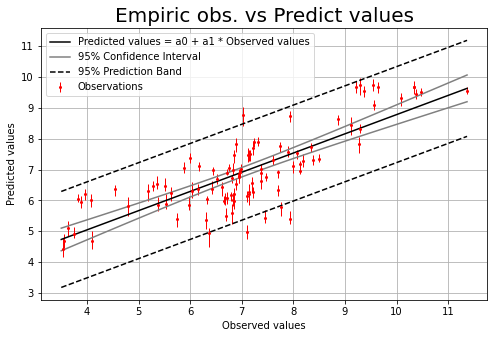

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 0.712, median - 0.711, CI - [0.664-0.769]

SHAP-values for: contr_r_STD: mean - 0.36, median - 0.36, CI - [0.309-0.407]

SHAP-values for: corr_r_Q25: mean - 0.238, median - 0.24, CI - [0.187-0.281]



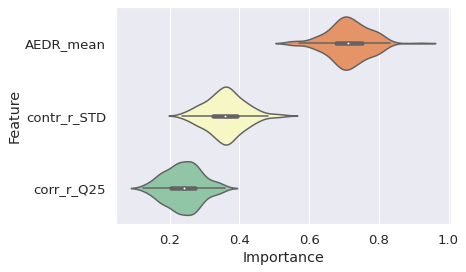

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean', 'contr_r_STD', 'corr_r_Q25'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 100.31, median: 101.0,
 pred. interval (P(0.025)-P(0.975)): 60.975-124.0, 
 conf. interval (p-value=0.95): 80.229-121.012 
***
Aggregate bias statistic: 
 mean: -0.103, median: -0.083,
 pred. interval (P(0.025)-P(0.975)): -0.529-0.247, 
 conf. interval (p-value=0.95): -0.286-0.07 
***
Aggregate RMSE statistic: 
 mean: 0.999, median: 1.002, pred. interval (P(0.025)-P(0.975)): 0.722-1.237, 
 conf. interval (p-value=0.95): 0.871-1.125 
***
Aggregate MSE statistic: 
 mean: 1.019, median: 1.005, pred. interval (P(0.025)-P(0.975)): 0.521-1.531, 
 conf. interval (p-value=0.95): 0.761-1.266 
***
Aggregate R^2 statistic: 
 mean: 0.572, median: 0.602, pred. interval (P(0.025)-P(0.975)): 0.201-0.801, 
 conf. interval (p-value=0.95): 0.415-0.715 
***
Aggregate bias(%) statistic: 
 mean: -1.389, median: -1.196, pred. interval (P(0.025)-P(0.975)): -7.198-3.722, 
 conf. interval (p-value=0.95): -3

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

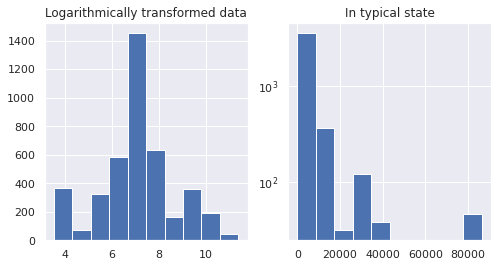

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [4, 5, 6, 7, 8, 9, 10, 11])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 500, 1000, 5000, 10000, 20000, 50000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

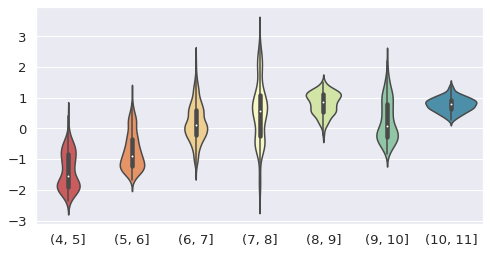

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

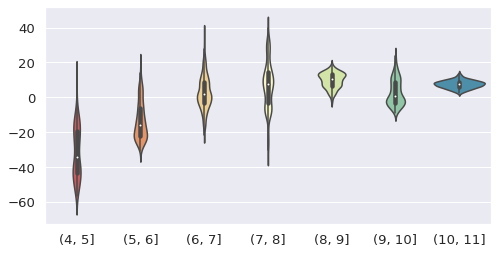

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

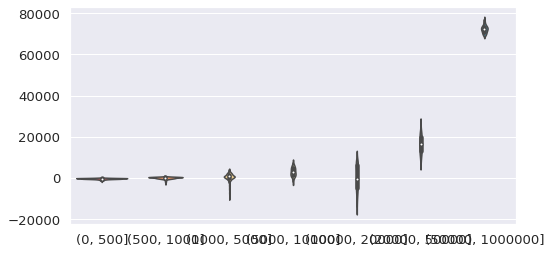

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

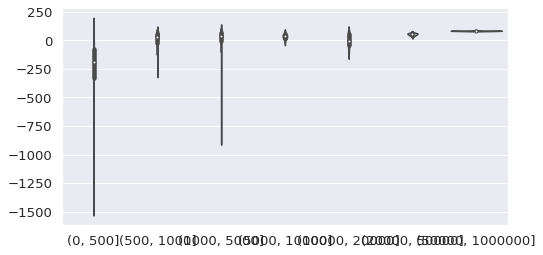

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:6.44343
[1]	validation_0-rmse:6.15729
[2]	validation_0-rmse:5.88313
[3]	validation_0-rmse:5.63401
[4]	validation_0-rmse:5.39570
[5]	validation_0-rmse:5.16145
[6]	validation_0-rmse:4.94512
[7]	validation_0-rmse:4.73580


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:4.53614
[9]	validation_0-rmse:4.34605
[10]	validation_0-rmse:4.14875
[11]	validation_0-rmse:3.98343
[12]	validation_0-rmse:3.81627
[13]	validation_0-rmse:3.65920
[14]	validation_0-rmse:3.51691
[15]	validation_0-rmse:3.38093
[16]	validation_0-rmse:3.23580
[17]	validation_0-rmse:3.09623
[18]	validation_0-rmse:2.96535
[19]	validation_0-rmse:2.85211
[20]	validation_0-rmse:2.74315
[21]	validation_0-rmse:2.64493
[22]	validation_0-rmse:2.54381
[23]	validation_0-rmse:2.44432
[24]	validation_0-rmse:2.35571
[25]	validation_0-rmse:2.26210
[26]	validation_0-rmse:2.18047
[27]	validation_0-rmse:2.09735
[28]	validation_0-rmse:2.02378
[29]	validation_0-rmse:1.95036
[30]	validation_0-rmse:1.87743
[31]	validation_0-rmse:1.80674
[32]	validation_0-rmse:1.74255
[33]	validation_0-rmse:1.68379
[34]	validation_0-rmse:1.62750
[35]	validation_0-rmse:1.57570
[36]	validation_0-rmse:1.52823
[37]	validation_0-rmse:1.48134
[38]	validation_0-rmse:1.43350
[39]	validation_0-rmse:1.38840
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 124


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

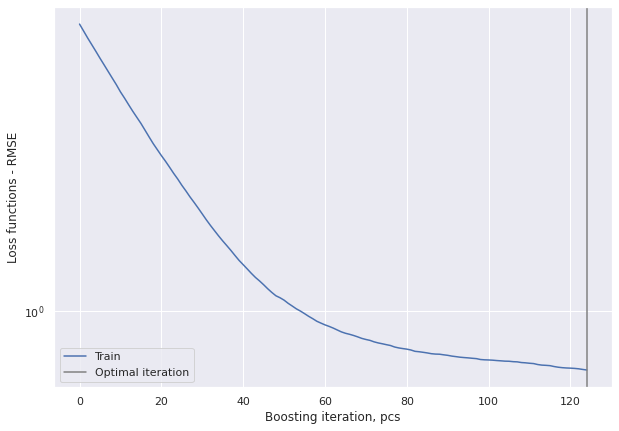

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.36
RMSE: 0.7
Relative RMSE(%):  9.666
MSE: 0.5
R square: 82.8%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.835
Uncertainty
a0: 1.69+/-0.24
a1: 0.757+/-0.033


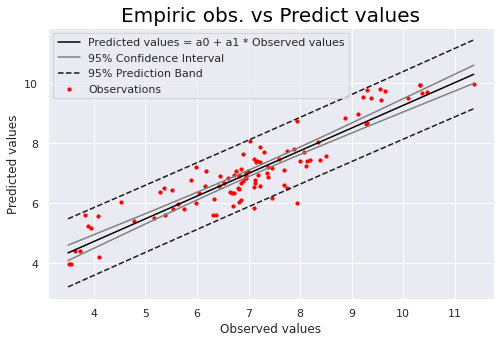

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

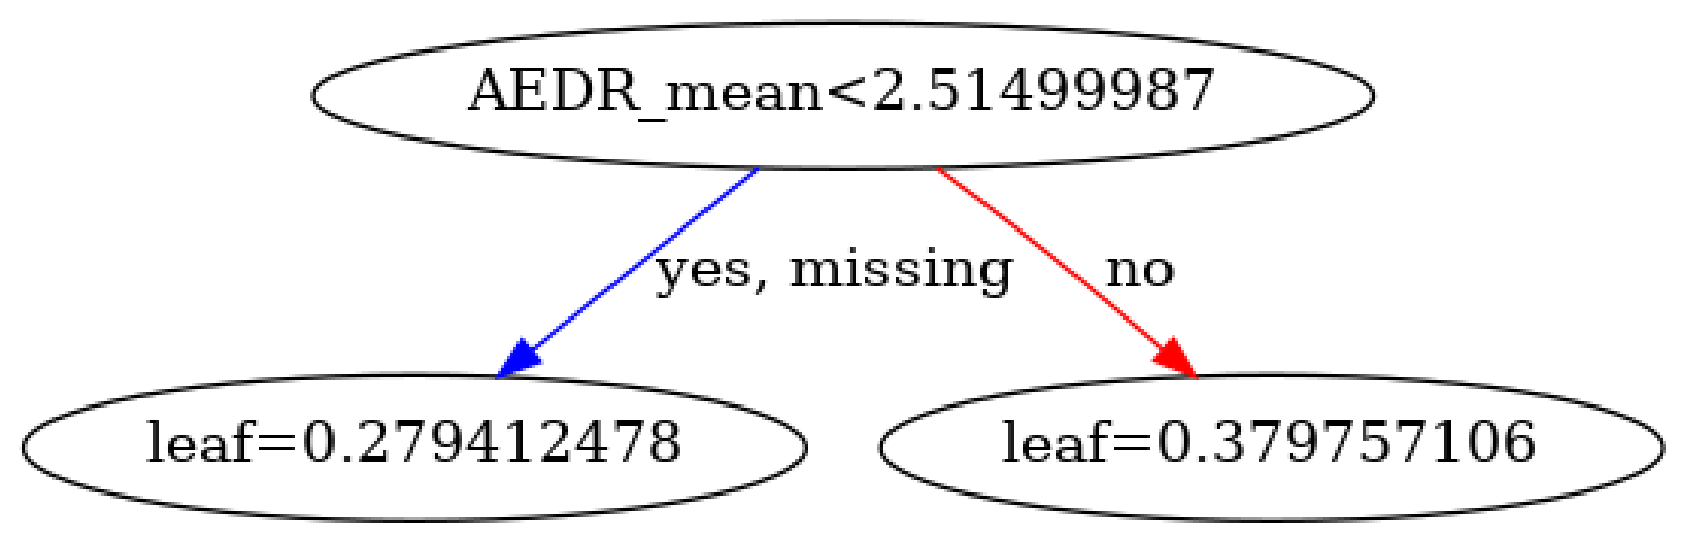

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

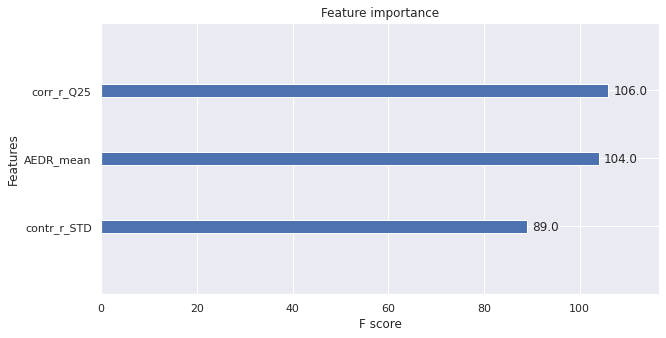

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

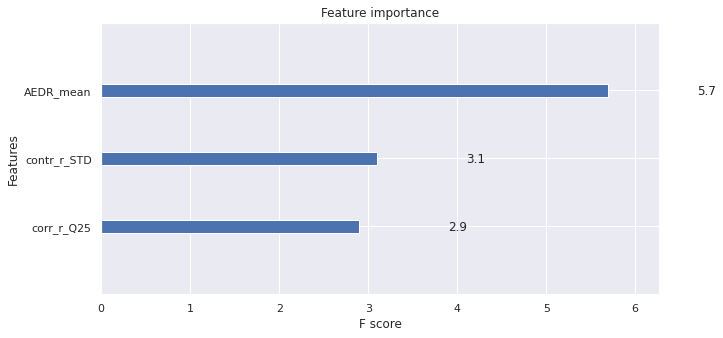

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

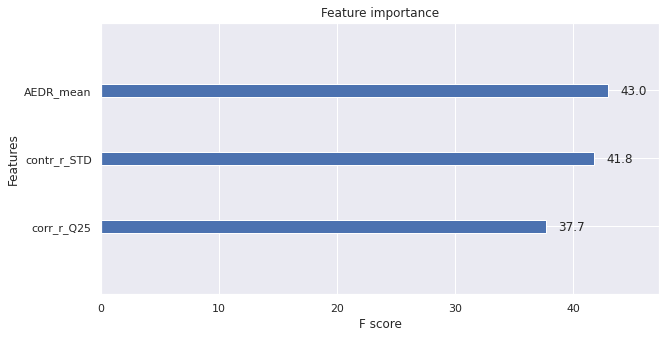

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [52]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


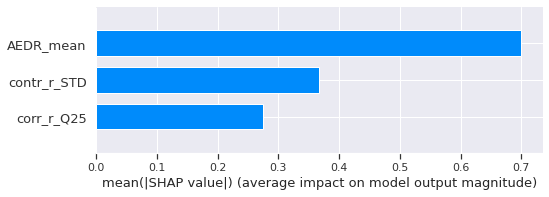

In [53]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

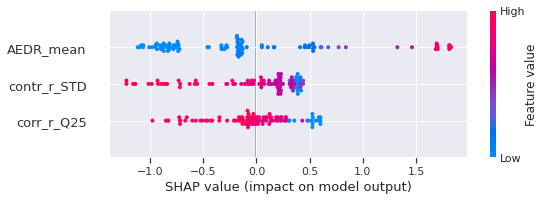

In [54]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

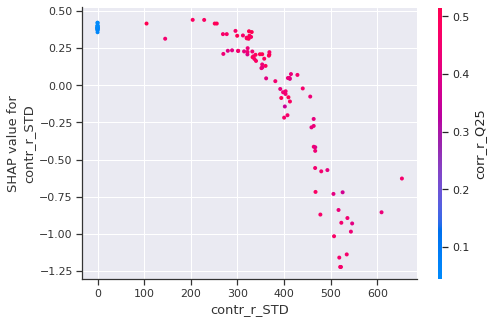

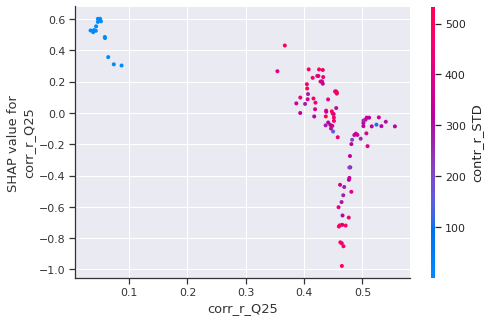

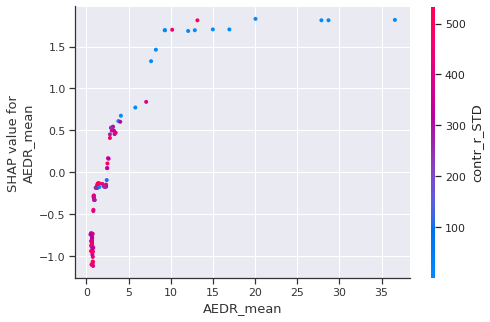

In [55]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Cs_vs_CHM_RGB_AEDR_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Cs_vs_CHM_RGB_AEDR_XGB_model.txt")